###***1.Team members :***


MOHAMMAD ASIM : 21045887

JAYDEEP SAMANTA : 21115184

ARIHANT SOUNDARARAGHAVAN : 21117683


####**2.The code executes to the end without any error**

####**3.Original source/Inspiration**

We intend to implement a Reinforcement Learning (RL) agent in the OpenAI Gym environment using a Deep Q Network (DQN). The agent (playing entity) has no prior knowledge of the game and should therefore be taught using the same sensory input as a human player. The objective is to outperform a typical human score by optimizing Breakout's agent-driven control system in order to replicate earlier achievements. We took our cue from Deepmind's paper [18], in which they trained the Atari breakdown for 50 million timesteps. We trained the agent for 3 million timesteps and were able to obtain an average score of 10.

We took inspiration from the following sources for this code:


1) Refered the code from the keras DQN example [6] to implement the DQN model

2) Refered the articles and built-in library [1] and [8] to understand and implement the Atari Breakout Open AI gym.

3) Refered some articles [22],[25],[26] to tweak the hyperparameters like batch size, optimizer and CNN layers

4) Refered the articles and blogs [16],[24] to implement the dueling DQN.

**Assignment Summary**


Reinforcement learning is the training of machine learning models to make a sequence of decisions. In an uncertain, potentially complex environment, the agent learns to achieve a goal. In reinforcement learning, an artificial intelligence faces a game-like situation. To find a solution to the problem, the computer uses trial and error. Artificial intelligence is given either rewards or penalties for the acts it takes in order to get it to accomplish what the programmer desires. Its purpose is to increase the total reward as much as possible.[5]

Deep Mind at Google demonstrated [18] the power of reinforcement learning by teaching an agent to play atari games and then defeating the finest Go players in the world.


This assignment aims at determining the use of a deep reinforcement learning technique to train an agent to play the OpenAI Gym's atari Breakout game. OpenAI Gym is a software application for developing and comparing reinforcement learning algorithms. The learning agent uses raw pixels from the atari emulator to predict an action, which is then returned to the emulator via the OpenAI interface. Deep Q Network (DQN) was the deep reinforcement learning network employed in this project, and it required over 3 million episodes to train an agent to get average reward of 10.

The Deepmind paper trained for "a total of 50 million frames (that is, around 38 days of game experience in total)". However this script will give result of 10 for around 3 million frames which are processed in less than 10 hours on a modern machine.[6]

**Atari Breakout**

A board moves along the bottom of the screen, returning a ball that destroys blocks at the top of the screen in this setting. The goal of the game is to break the level by removing all of the blocks. The agent must learn to move left and right on the board, return the ball, and remove all of the blocks without the ball passing through.

**Game Rule**

Breakout starts with eight rows of bricks, each with a distinct color for the first two rows. Yellow, green, orange, and red are the colors in ascending order from the bottom. The player must use a single ball to knock down as many bricks as possible by bouncing the ball against the bricks and eliminating them utilizing the walls and/or the paddle below. A player loses a turn if his or her paddle misses the ball's rebound. The player has three turns to clear two brick-filled screens. Yellow bricks are for one point, green bricks are worth three, orange bricks are worth five, and top-level red bricks are worth seven points each.After the ball has broken through the red row and hit the upper wall, the paddle shrinks to half its original size. After four hits, after twelve hits, and after making contact with the orange and red rows, the ball speed increases.[15]

1. Installing and importing dependecies : stable-baselime, Atari 2600 ROM

In [ ]:
!pip install stable-baselines[mpi]==2.8.0  
#Download and install ROMs
!gdown -q http://www.atarimania.com/roms/Roms.rar
!pip install -q unrar
!mkdir ./roms_atari
!unrar x Roms.rar ./roms_atari > /dev/null 2>&1
!python -m atari_py.import_roms ./roms_atari > /dev/null 2>&1

     |████████████████████████████████| 222 kB 24.2 MB/s 
     |████████████████████████████████| 2.5 MB 62.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for mpi4py: filename=mpi4py-3.1.3-cp37-cp37m-linux_x86_64.whl size=2185306 sha256=82a88688cbc5c0d75147c5c820a2070186b7700004d2d76e2e591cdf6d7230a0
  Stored in directory: /root/.cache/pip/wheels/7a/07/14/6a0c63fa2c6e473c6edc40985b7d89f05c61ff25ee7f0ad9ac
Successfully built mpi4py


We have install the 'Stable Baselines', these are set of improved implementations of Reinforcement Learning (RL) algorithms based on OpenAI Baselines.[1]

"**stable-baselines[mpi]**" includes an optional dependency on MPI, enabling algorithms DDPG, GAIL, PPO1 and TRPO. [2]

Where MPI (Message Passing Interface) is the de facto standard distributed communications framework for scientific and commercial parallel distributed computing.[3]

Also, we have downloaded the Atari 2600 Rom (binary files containing rules for Atari games) for the experiment.


Using only raw pixels as input, this research by DeepMind[4] proposed a new deep learning model for reinforcement learning and demonstrated its capacity to master challenging control policies for Atari 2600 computer games. It also demonstrated a Q-learning variation that combines stochastic minibatch updates with experience replay memory to make deep network training for RL easier. 
They were able to produced state-of-the-art outcomes in six of the seven games it was tested on, with no changes to the architecture or hyperparameters.



In [ ]:
#Create a folder named as 'mydrive' to save the model
import os

parent_dir = os.getcwd()
new_dir = 'mydrive'
path = os.path.join(parent_dir,new_dir)

if not os.path.exists(path):
  os.mkdir(path)

In [ ]:
from stable_baselines.common.atari_wrappers import make_atari, wrap_deepmind
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import gym.wrappers


**Note : if throws error - please remove the contrib from "import tensorflow.contrib.layers as tf_layers" in file "/usr/local/lib/python3.7/dist-packages/stable_baselines/deepq/policies.py"**

Wrappers will let us to add functionality to environments, such as modifying the observations and rewards that our agent receives. Preprocessing observations to make them easier to learn from is widespread in reinforcement learning. When using image-based inputs, one common example is to ensure that all values are between 0 and 1, rather than the more common 0 and 255, as with RGB images.

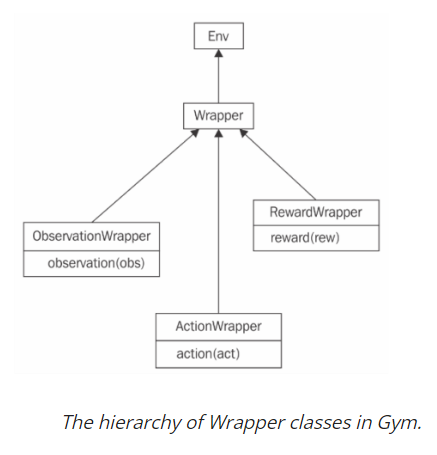

The Wrapper class inherits the Env class. Its constructor accepts the only argument: the instance of the Env class to be “wrapped”. To add extra functionality, you need to redefine the methods you want to extend like step() or reset(). The only requirement is to call the original method of the superclass.[7]

make_atari - 

Create a wrapped, monitored VecEnv for Atari.



```
Parameters:	
env_id – (str) the environment ID
num_env – (int) the number of environment you wish to have in subprocesses
seed – (int) the initial seed for RNG
wrapper_kwargs – (dict) the parameters for wrap_deepmind function
start_index – (int) start rank index
allow_early_resets – (bool) allows early reset of the environment
start_method – (str) method used to start the subprocesses. See SubprocVecEnv doc for more information
use_subprocess – (bool) Whether to use SubprocVecEnv or DummyVecEnv when num_env > 1, DummyVecEnv is usually faster. Default: False

Returns:	
(VecEnv) The atari environment
```



wrap_deepmind - Configures environment for DeepMind-style Atari

2. Examining the Breakout environment

(-0.5, 159.5, 209.5, -0.5)

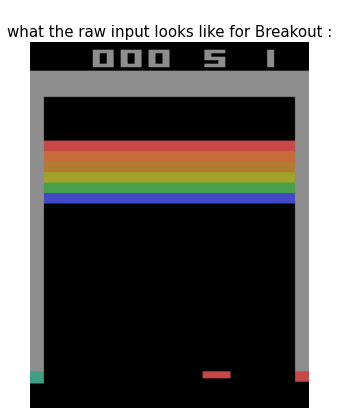

In [ ]:
# Observations (raw - before applying the wrap_mind wrapper)
env = make_atari("BreakoutNoFrameskip-v4") #The environment that was passed(Breakout) as a parameter is returned.
obs = np.array(env.reset())   #As illustrated in the screenshot below, this command will reset the environment. 
##This function returns the observation of the environment corresponding to the initial state after resetting the environment to its initial state.
plt.figure(figsize=(5,10))
plt.title("\nwhat the raw input looks like for Breakout :",size=15)
plt.imshow(obs)
plt.axis('off')

In [ ]:
print(obs.shape)  #shape of the initial observation in array format
## 3 is the num of channels R,G and B

(210, 160, 3)


The basic structure of the environment is described by the **observation_space** and the **action_space** attributes of the Gym Env class.

The structure as well as the permissible values for observing the condition of the environment are defined by the *observation_space*. For different situations, observation can mean different things. A screenshot of the game is the most popular format. Other types of observations, such as environmental parameters expressed in vector form, are also possible.

Similarly, the Env class has an action space feature that represents the numerical structure of the permitted actions that can be taken against the environment.




In [ ]:
env.observation_space #The observation space specifies the structure of the observations returned by the environment. 
## Format : Box(low, high, shape=None, dtype=<class 'numpy.float32'>)

Box(0, 255, (210, 160, 3), uint8)

Box is type of data structures called "Spaces" provided by Gym to describe the legitimate values for the observations of the environments.

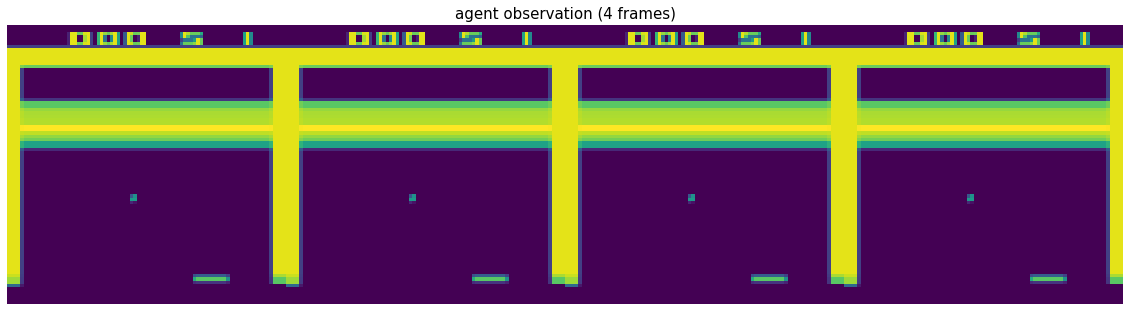

In [ ]:
# Obseravtions (wrapped - after applying wrapper)
env = make_atari("BreakoutNoFrameskip-v4")

env = wrap_deepmind(env, frame_stack=True)
##wrap_deepmind performs pre-processing as mentioned in their paper[4]
##Preprocessing is an important step to limiting the unnecessary information exposed to our network.
##Warp the frames, grey scale, stake four frame and scale to smaller ratio
##The Wrapper class, as the name suggests, is a wrapper on top of an Env class that modifies some of its attributes and functions.
##wrap_deepmind configures environment for DeepMind-style Atari. It has option to stack multiple images together by enabling frame_stack=True.
##It will stack 4 images together and final result looks like the one below shown and this we can feed to our Neural Network [8]

obs = np.array(env.reset())
plt.figure(figsize=(20,80))
plt.title("agent observation (4 frames)",size=15)
plt.axis('off')
plt.imshow(obs.transpose([0, 2, 1]).reshape([env.observation_space.shape[0], -1]))


In [ ]:
env.observation_space

Box(0, 255, (84, 84, 4), uint8)

wrap_deepmind modifies the environment in a few ways. To begin, it shrinks the screen image to 84x84 pixels and turns it to grayscale as there is no need for our agent to learn the color image. Second, for each timestep, it skips four frames and returns the highest pixel value that occurred in those four frames for each pixel. This provides our agent with a sense of how the game is progressing (not as good as an RNN, but good enough to Breakout).This gives the neural network about the dynamics of the environmnet. Through single image we won't be able to say about the direction and the speed of the ball, it is very important for agent to understand the dynamics so that agent could  pick the next action. Hence, stacking help in understand the dynamics of the environmnet. It also makes a few other minor adjustments, although they aren't critical to the agent's operation.[9]

In [ ]:
print(obs.shape)  #shape of the initial observation in array format after wrap_deepmind

(84, 84, 4)


In [ ]:
# Actions
print(env.action_space)
print(env.get_action_meanings())

Discrete(4)
['NOOP', 'FIRE', 'RIGHT', 'LEFT']


Our action space  contains 4 discrete actions (No Operation, Fire, Right, Left)

**noop** (short for no operation), 

**fire** (the ball at the target bricks above), 

going **right** to stop the ball going down,

going **left** to stop the ball going down.


Total Life in a game : 5 

One episode is related to the set of actions when the agent either break all bricks/ lost the life



The game is played in the following manner:


> The ball is fired up by the paddle at the bottom, and it strikes the bricks at the top layers of the screen, destroying them.

> The ball bounces back after hitting the bricks.

> To hit the ball and avoid it from falling, the paddle should move left or right.

> The game is over and the player loses if the ball falls below, that is, goes off the screen below the paddle.

> The ball will bounce off the walls and smash more bricks if it rebounds off the paddle again.

As a result, the goal is to win the game by destroying all of the bricks while keeping the ball above the paddle.



In [ ]:
while True:
  obs, rew, done, info = env.step(env.action_space.sample())
  print(info,done,rew)
  if done:
    break

{'ale.lives': 5} False 0.0
{'ale.lives': 5} False 0.0
{'ale.lives': 5} False 0.0
{'ale.lives': 5} False 0.0
{'ale.lives': 5} False 0.0
{'ale.lives': 5} False 0.0
{'ale.lives': 5} False 0.0
{'ale.lives': 5} False 0.0
{'ale.lives': 5} False 0.0
{'ale.lives': 5} False 0.0
{'ale.lives': 5} False 0.0
{'ale.lives': 5} False 0.0
{'ale.lives': 5} False 0.0
{'ale.lives': 5} False 0.0
{'ale.lives': 5} False 0.0
{'ale.lives': 5} False 0.0
{'ale.lives': 5} False 0.0
{'ale.lives': 5} False 0.0
{'ale.lives': 5} False 0.0
{'ale.lives': 5} False 0.0
{'ale.lives': 5} False 0.0
{'ale.lives': 5} False 0.0
{'ale.lives': 4} True 0.0


The above code represents one episode run for random actions.

### Reward Calculation

**env.step()** : This command will take an action at each step. The action is specified as its parameter. Env.step function returns four parameters, namely observation, reward, done and info. These four are explained below:

a) observation : an environment-specific object representing your observation of the environment.

b) reward : amount of reward achieved by the previous action. It is a floating data type value. The scale varies between environments.

c) done : A boolean value stating whether it’s time to reset the environment again.

d) info (dict): diagnostic information useful for debugging. [10]

Each timestep, the agent chooses an action, and the environment returns an observation and a reward.


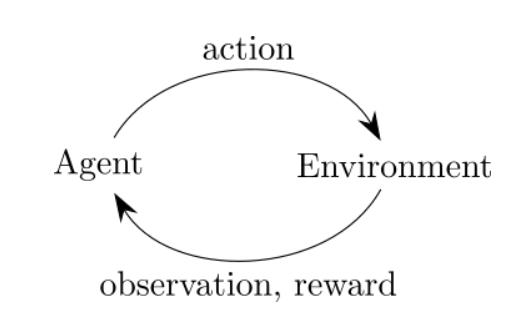

Total steps count : 51


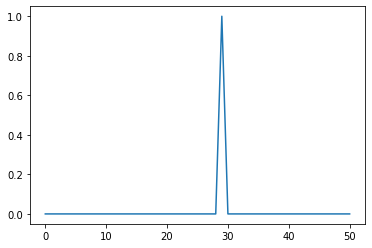

In [ ]:
# Rewards
##It is amount of reward achieved by the previous action. It is a floating data type value.
env.reset()
rewards = []
step_count = 0
while True:
    step_count += 1 
    obs, rew, done, info = env.step(env.action_space.sample())
    rewards.append(rew)
    if done:
        break
plt.plot(rewards)
print(f"Total steps count : {step_count}")


The plot above shows number of states observed by our agent in x-axis and rewards are represented at y-axis reward 1 means agent have broke the brick.

In the scenario above, our agent had not been trained, and in a 51-step episode, it broke one brick.

##3. Creating a model - Deep convolutional neural network

In DQN, a neural network should take a 'state' as an input and return q-value for each possible action.
Q-value of an action can be observed as an estimate of future return that our agent gonna receive by picking this particular action in this particular state.
This network learns a rough approximation of the Q-table, which is a mapping between an agent's states and actions. There will be four actions available for each state. The state is determined by the environment, and the action is determined by choosing the largest of the four Q-values predicted in the output layer.

In [ ]:
#Code referred from keras [6]
num_actions = 4 #['NOOP', 'FIRE', 'RIGHT', 'LEFT'] for actions for Breakout 
def create_q_model():
    # Network defined by the Deepmind paper [4]

    inputs = layers.Input(shape=(84, 84, 4,))  # fourth dimension is None means layer can recieve in batches of any length

    layer1 = layers.Conv2D(32, 8, strides=4, activation="relu")(inputs)
    ##  32 is numder of filters, 8 is kernel size (8X8), 4 is stride (4x4)
    layer2 = layers.Conv2D(64, 4, strides=2, activation="relu")(layer1)
    layer3 = layers.Conv2D(64, 3, strides=1, activation="relu")(layer2)
    layer4 = layers.Flatten()(layer3)
    layer5 = layers.Dense(512, activation="relu")(layer4)
    action = layers.Dense(num_actions, activation="linear")(layer5)

    return keras.Model(inputs=inputs, outputs=action)

# The first model makes the predictions for Q-values which are used to make a action.
model = create_q_model()
# # Build a target model for the prediction of future rewards.
# The weights of a target model get updated every N steps thus when the
# loss between the Q-values is calculated the target Q-value is stable.
# In order to overcome the maximisation bias, the concept of a double-DQN network was introduced. We have added double DQN by introducing 2 CNN networks. [21]
model_target = create_q_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 84, 84, 4)]       0         
                                                                 
 conv2d (Conv2D)             (None, 20, 20, 32)        8224      
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          32832     
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 512)               1606144   
                                                                 
 dense_1 (Dense)             (None, 4)                 2052  

In [ ]:
# Code referred from blog[16], [24] and paper[17]
num_actions = 4 #['NOOP', 'FIRE', 'RIGHT', 'LEFT'] for actions for Breakout 
def create_duel_q_model():

  X_input = layers.Input(shape=(84, 84, 4,))
  conv1 = layers.Conv2D(32,kernel_size=8, strides=(4, 4), activation='relu')(X_input)
  conv2 = layers.Conv2D(64, kernel_size=4, strides=(2, 2), activation='relu')(conv1)
  conv3 = layers.Conv2D(64, kernel_size=3, activation = 'relu')(conv2)
  flatten = layers.Flatten()(conv3)
  x = layers.Dense(512)(flatten)
  
  V = layers.Dense(1)(x)
  A = layers.Dense(num_actions,activation = 'linear')(x)
  
  Q = V + tf.subtract(A, tf.reduce_mean(A, axis=1, keepdims=True))

  return keras.Model(inputs = X_input, outputs = Q)

    

# The first model makes the predictions for Q-values which are used to make a action.
model_duel = create_duel_q_model()
# # Build a target model for the prediction of future rewards.
# The weights of a target model get updated every N steps thus when the
# loss between the Q-values is calculated the target Q-value is stable.
model_duel_target = create_duel_q_model()
model_duel.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 84, 84, 4)]  0           []                               
                                                                                                  
 conv2d_6 (Conv2D)              (None, 20, 20, 32)   8224        ['input_3[0][0]']                
                                                                                                  
 conv2d_7 (Conv2D)              (None, 9, 9, 64)     32832       ['conv2d_6[0][0]']               
                                                                                                  
 conv2d_8 (Conv2D)              (None, 7, 7, 64)     36928       ['conv2d_7[0][0]']               
                                                                                            

The input to the neural network consists of an 84 × 84 × 4 image generated by the preprocessing wrap_deepmind. The first hidden layer convolves 32 filters of 8×8 with stride 4 with the input image and applies a rectifier nonlinearity(reLu). The second hidden layer convolves 64 filters of 4×4 with stride 2, again followed by a rectifier nonlinearity(reLu). This is followed by a third convolutional layer that convolves 64 filters of 3×3 with stride 1 followed by a rectifier. The final hidden layer is fully-connected and consists of 512 rectifier units. The output layer is a fully-connected linear layer with a single output for each valid action i.e. 4.

In short, out model will carry the action prediction based on image.

We have created two models:

1) model - this represents our agent that is reponsible for predicting q-values at each time step.

2) model_target - During the training loop, our aim is to optimize the loss between true q-value and our agent estimates of q-value. The purpose of model_target is to predict those q-values. It is simply a copy of our agent that is made once in a while i.e. once in 10 million steps. Although in early stages of training it will fail to predict true values but as we play more and more games the rewards collected will be more and the target model will eventually converge to true q-values.

We have used two networks to implement **double DQN model** to tackle the ***maximization bias***. 

## 4. Configuring the hyperparamaters and model training

4.1 Gamma(γ) :  

As we get closer and closer to the deadline, our preference for near-term reward should increase, as we won’t be around long enough to get the long-term reward, which means our gamma should decrease. [11],[19]

In [ ]:
gamma = 0.99  # Discount factor for past rewards

4.2 epsilon(ϵ) : 

As we develop our strategy, we have less need for exploration and more exploitation to get more utility from our policy, so as trials increase, epsilon should decrease. [11]

The agent always takes the best course of action. As a result, it generates the highest possible reward for the current state. In epsilon-greedy action selection, the agent employs both exploitations and exploration to find new options. [12]



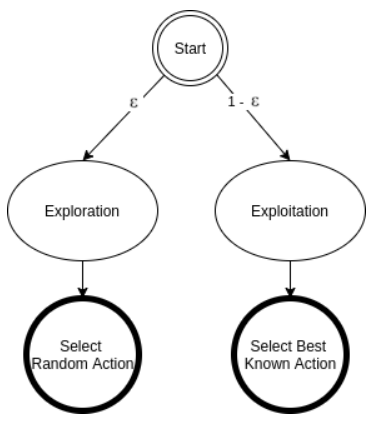

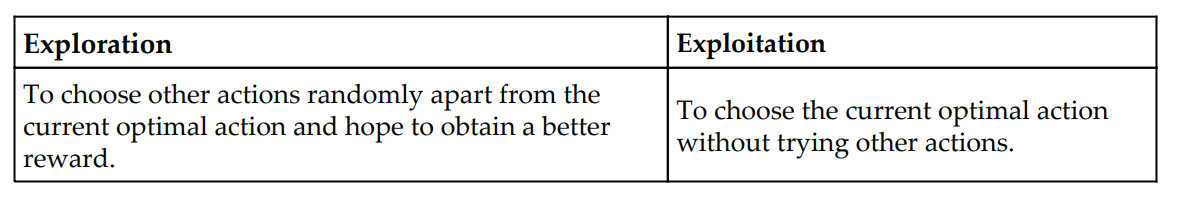

We choose to explore, rather than exploit, what we have discovered so far, because the likelihood of ϵ is minimal. The action is chosen at random in this situation, regardless of the action-value estimates.

Each action is performed an infinite number of times if we conduct infinite trials. As a result, the epsilon-greedy action selection policy always finds the best actions.


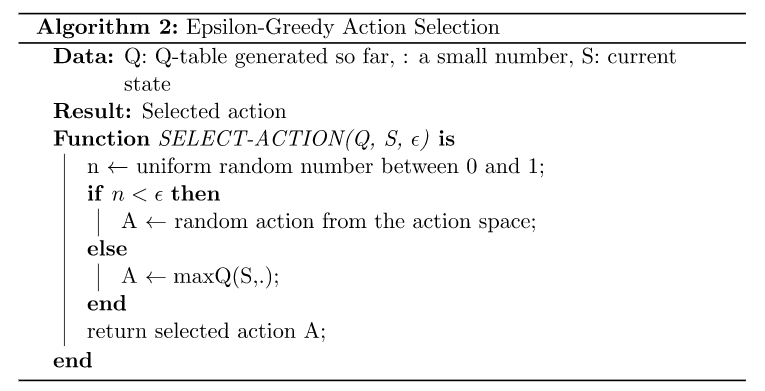

In [ ]:

# Setting epsilon decay parameters
epsilon = 0.05   #exploration probability at start

## Here, we set epsilon=0.05, the algorithm will exploit the best variant 95% of the time and will explore random alternatives 5% of the time. And this is quite effective in practice.

epsilon_max_1 = 1.0 
epsilon_min_1 = 0.2
epsilon_max_2 = epsilon_min_1  
epsilon_min_2 = 0.1
epsilon_max_3 = epsilon_min_2  
epsilon_min_3 = 0.02

epsilon_interval_1 = (epsilon_max_1 - epsilon_min_1)  
epsilon_interval_2 = (epsilon_max_2 - epsilon_min_2)  
epsilon_interval_3 = (epsilon_max_3 - epsilon_min_3)  

print("epsilon_interval_1: ",epsilon_interval_1)
print("epsilon_interval_2: ",epsilon_interval_2)
print("epsilon_interval_3: ",epsilon_interval_3)

##Here, we applied the epsilon greedy approach:
##This is the frequency of the steps we will do randomly. In the beginning, this rate should be the highest value because we know nothing about the importance of the Q table. 
##This means that we have to do a lot of research by randomly choosing our actions
## We generate a random number. If this number is larger than epsilon, then we will do the "exploitation" (meaning that we are sure we are selecting the best action at each step). Otherwise, we will do research; 
##The idea is that we need to have a big epsilon at the beginning of Q function training. Then gradually reduce it as the agent has more confidence in the Q values.

##Over time, the best machine will be played more and more often as it pays off more often. 
##In short, an epsilon-greedy means choosing the best ("greedy") option at the moment, but sometimes choosing a random option that is unlikely (epsilon).

epsilon_interval_1:  0.8
epsilon_interval_2:  0.1
epsilon_interval_3:  0.08


piecewise linear decay of three intervals have been set to manage exploration vs exploitation trade-off. 

In [ ]:
# Number of frames for exploration
epsilon_greedy_frames = 1000000.0
# Number of frames to take random action and observe output, if number of frames exceeds 50000 then exploration
epsilon_random_frames = 50000


4.3 Experience Replay And Replay Memory

During training with deep Q-networks, we frequently use a technique called experience replay. We store the agent's experiences at each time step in a data set called the replay memory with experience replay. [13]

At time t , the agent's experience  $e_{t}$ is defined as this tuple: 

$e_{t}$ = ($s_{t}$,$a_{t}$,$r_{t+1}$,$s_{t+1}$)

This tuple contains the state of the environment $s_{t}$, the action $a_{t}$ taken from state , the reward $r_{t+1}$ given to the agent at time t as a result of the previous state-action pair ($s_{t}$,$a_{t}$), and the next state of the environment $s_{t+1}$. This tuple indeed gives us a summary of the agent's experience at time t.

  



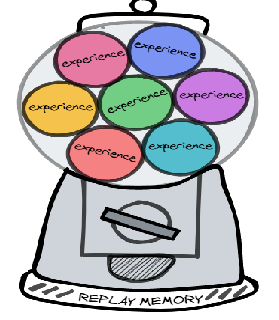

The replay memory stores all of the agent's experiences at each time step across all episodes played by the agent. Actually, we'll normally see the replay memory set to a finite capacity limit in practice, so it'll only store the most recent experiences.

We'll randomly sample from this replay memory data set to train the network. Experience replay is the process of obtaining experience and sampling from the replay memory that stores it.

***Reason for Experience replay?***

If the network learned exclusively from successive samples of experience that occurred in the environment in a sequential order, the samples would be highly correlated and thus inefficient. This correlation is broken when random samples from replay memory are taken. 

This concept helps to avoid the ***catestrophic forgetting*** at some extent [20].

In [ ]:

# Maximum Replay Buffer volume
max_memory_length = 150000

# Size of batch taken from replay buffer
batch_size = 64  
max_steps_per_episode = 10000 #Maximum steps possible in a episode, to get out from infinite loop let say ball is neither breaking wall nor missing the board

# Train the model after 20 actions
update_after_actions = 20

# How often to update the target network
update_target_network = 10000



4.4 Loss Function

In [ ]:
# In the Deepmind paper they use RMSProp however then Adam optimizer improves training time [22]
optimizer = keras.optimizers.Adam(learning_rate=0.00025, clipnorm=1.0)

# Using huber loss for stability[23]
loss_function = keras.losses.Huber()

### Training Loop

As per our understanding of a general deep Q-network architecture, the network is passed a state from the environment, and in turn, the network outputs the Q-value for each action that can be taken from that state

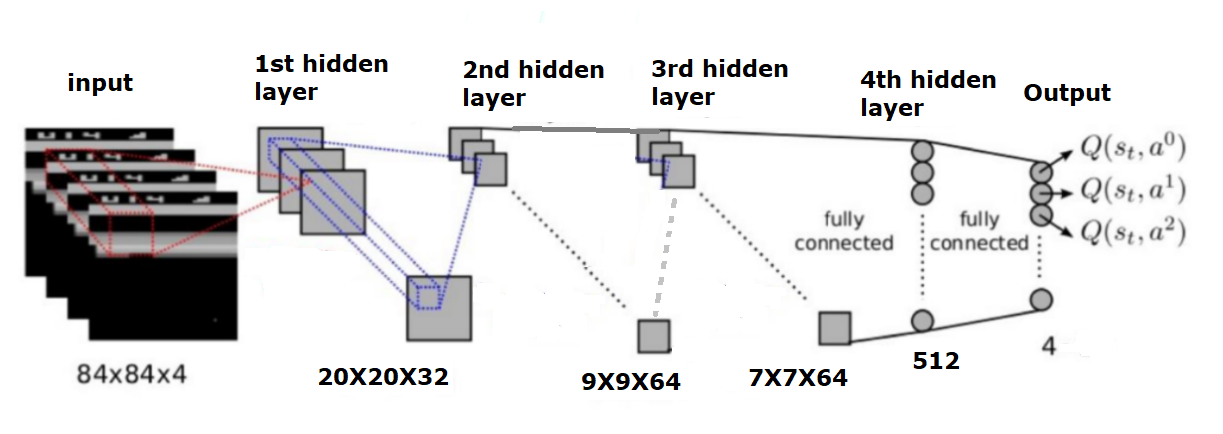

In Q-learning, we use the target  value calculated by Reward and  to update the Q value. Therefore, the loss function of Q network training is:

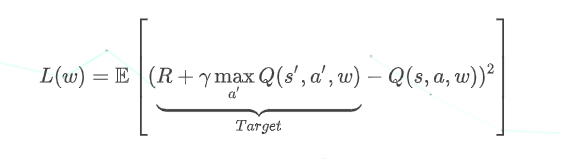

Since the samples collected by playing Breakout are a time sequence, there is continuity between the samples. If the Q value is updated every time a sample is obtained, the effect will not be good due to the influence of the sample distribution. Therefore, a very straightforward idea is to save the samples first, and then randomly sample them, which is Experience Replay. Gradient descent is performed with randomly adopted data.[14]

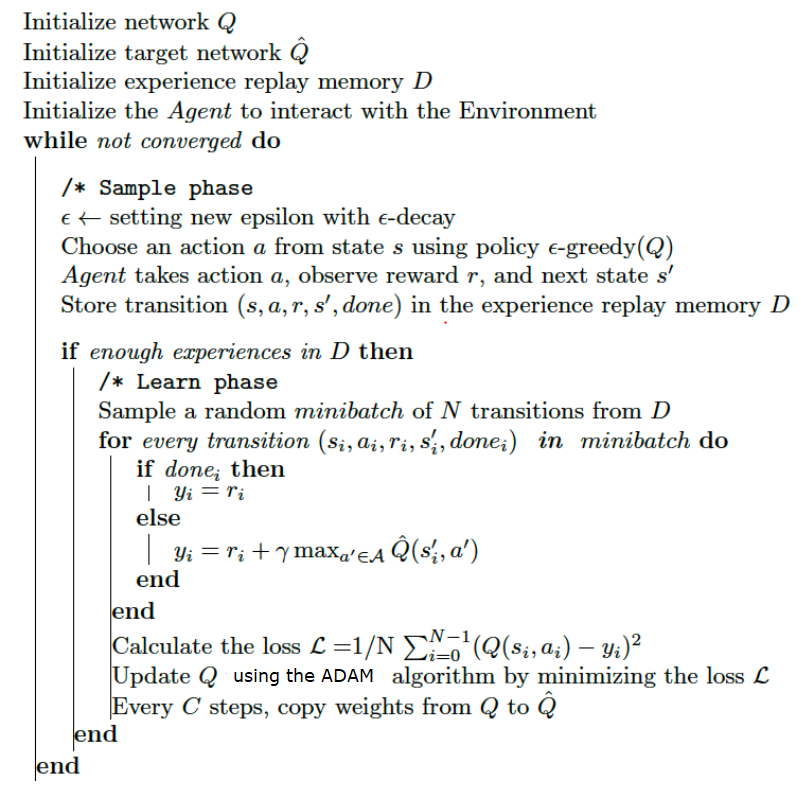

First, initialize a replay memory D with a maximum capacity of N. Then initialize the action value function Q with arbitrary weights. Then, we start the loop to let the robot play the game until the end of the game. When the game starts, we initialize a sequence and execute each step in a loop. In each step of the loop, first use the ϵ greedy algorithm to select the action $a_{t}$, and then we execute the action $a_{t}$, get reward $r_{t}$ and observation $x_{t+1}$ , and save it to D. Finally, randomly extract replay memory from  D to calculate $y_{i}$, and use the mean square error loss function to calculate the loss, and update all the parameters of the Q network through the gradient back propagation of the neural network.[14]

In [ ]:
mode = "DQN"

def get_models(mode="DQN"):
  if mode =="DQN":
    model = create_q_model()
    model_target = create_q_model()
  elif mode == "DuelDQN":
    model = create_duel_q_model()
    model_target = create_duel_q_model()
  return model,model_target

In [ ]:
# Saving the model
def save_model_dqn(model,model_name):
  path = f"/content/mydrive/MyDrive/{model_name}" 
  model.save(path)
  return path


# Loading the model
def load_model_dqn(path):
  model = tf.keras.models.load_model(path)
  return model

In [ ]:
def update_Q_Val(model,model_target,env,maxscore_terminationCond):

  epsilon = 0.05  #exploration probability at start
  ## Here, we set epsilon=0.05, the algorithm will exploit the best variant 95% of the time and will explore random alternatives 5% of the time. And this is quite effective in practice.

  epsilon_max_1 = 1.0 
  epsilon_min_1 = 0.2
  epsilon_max_2 = epsilon_min_1  
  epsilon_min_2 = 0.1 
  epsilon_max_3 = epsilon_min_2  
  epsilon_min_3 = 0.02

  epsilon_interval_1 = (epsilon_max_1 - epsilon_min_1)  #0.8
  epsilon_interval_2 = (epsilon_max_2 - epsilon_min_2)  #0.1
  epsilon_interval_3 = (epsilon_max_3 - epsilon_min_3)  #0.08

  # Maximum Replay Buffer volume
  #max_memory_length = 190000
  max_memory_length = 150000

  # Size of batch taken from replay buffer
  batch_size = 64
  max_steps_per_episode = 10000 #Maximum steps possible in a episode, to get out from infinite loop let say ball is neither breaking wall nor missing the board

  # Train the model after 20 time steps
  update_after_actions = 20

  # How often to update the target network
  update_target_network = 10000


  # Experience replay buffers
  action_history = []
  state_history = []
  state_next_history = []
  rewards_history = []
  done_history = []
  frameCount_History =[]
  loss_history = []
  running_reward_history =[]


  episode_reward_history = []
  epsilon_history = []
  running_reward = 0
  episode_count = 0
  frame_count = 0
  loss=0

  #asim=1
  
  # Run until solved
  while True:
    state = np.array(env.reset())    #Getting Initial state on pre-processed env  ==> (84, 84, 4) shape in array form
    episode_reward = 0
    track_episode = 0
    for timestep in range(1, max_steps_per_episode):
      frame_count += 1
      #print(frame_count)
      # Use epsilon-greedy for exploration
      #Go for exploration if frames visited so far exceeds 50000 OR epsilon > random value in range (0,1)
      
      if frame_count < epsilon_random_frames or epsilon > np.random.rand(1)[0]:
        #epsilon_random_frames= 50000 
        # Take random action
        action = np.random.choice(num_actions)
      else:
        # Predict action Q-values
        # From environment state
        state_tensor = tf.convert_to_tensor(state)  # passing image shape (84, 84, 4)  for breakout game
        state_tensor = tf.expand_dims(state_tensor, 0) # Add the dimension, now shape is ([1, 84, 84, 4])
        
        #Use our model to get Q-values --> it returns 4 possible action values 
        #like array([[-0.03862513, -0.01569214, -0.01577435, -0.01815945]]
            
        action_probs = model(state_tensor, training=False) 
        # Take best action
        ##Get the max Q-values out of the 4 action values for above example its 1 (value at index 1)
        action = tf.argmax(action_probs[0]).numpy() 

      # Decay probability of taking random action
      # We decrease epsilon based on decay rule set
      # we have set epsilon_greedy_frames = 1000000
      #epsilon_interval_1:  0.8
      #epsilon_interval_2:  0.1
      #epsilon_interval_3:  0.08
      if frame_count < epsilon_greedy_frames:
        epsilon -= epsilon_interval_1 / epsilon_greedy_frames
        #print("epsilon calculated : ",epsilon,"epsilon min : ",epsilon_min_1)
        epsilon = max(epsilon, epsilon_min_1)
        
      if frame_count > epsilon_greedy_frames and frame_count < 2 * epsilon_greedy_frames:
        epsilon -= epsilon_interval_2 / epsilon_greedy_frames
        #print("epsilon calculated : ",epsilon,"epsilon min : ",epsilon_min_2)
        epsilon = max(epsilon, epsilon_min_2)
        
      if frame_count > 2 * epsilon_greedy_frames:
        epsilon -= epsilon_interval_3 / epsilon_greedy_frames
        #print("epsilon calculated : ",epsilon,"epsilon min : ",epsilon_min_3)
        epsilon = max(epsilon, epsilon_min_3)

      
      # Apply the sampled action in our environment
      state_next, reward, done, _ = env.step(action)   #Observe the new state based on the selected action
      state_next = np.array(state_next) 

      episode_reward += reward #Adding up the immediate reward to the episodic rewards

      # Save actions and states in replay buffer
      action_history.append(action)
      state_history.append(state)
      state_next_history.append(state_next)
      done_history.append(done)
      rewards_history.append(reward)

      ### Assigning the Next State
      state = state_next

      # Update every 20th frame and once batch size is over batch size
      # update_after_actions = 20 (Updating the target network at every 20 steps)
      # len(done_history) > batch_size make sures whether we have record to evaluate it should be > batch size

      if frame_count % update_after_actions == 0 and len(done_history) > batch_size:
        # Get indices of samples for replay buffers
        # indices will hold random indices of states availabe in replay memory
        indices = np.random.choice(range(len(done_history)), size=batch_size)

        # Using list comprehension to sample from replay buffer
        state_sample = np.array([state_history[i] for i in indices])
        state_next_sample = np.array([state_next_history[i] for i in indices])
        rewards_sample = [rewards_history[i] for i in indices]
        action_sample = [action_history[i] for i in indices]
        # Converting the done response from bool to float
        done_sample = tf.convert_to_tensor([float(done_history[i]) for i in indices])
        
        # Build the updated Q-values for the sampled future states
        # Use the target model for stability
        future_rewards = model_target.predict(state_next_sample)

        # Q value = reward + discount factor * expected future reward
        updated_q_values = rewards_sample + gamma * tf.reduce_max(future_rewards, axis=1)

        # If final frame set the last value to -1
        updated_q_values = updated_q_values * (1 - done_sample) - done_sample

        # Create a mask so we only calculate loss on the updated Q-values
        masks = tf.one_hot(action_sample, num_actions)

        
        #Forward-pass
        with tf.GradientTape() as tape:
          # Train the model on the states and updated Q-values
          q_values = model(state_sample)

          # Apply the masks to the Q-values to get the Q-value for action taken
          ##reduce_sum --> Computes the sum of elements across dimensions of a tensor. 
          q_action = tf.reduce_sum(tf.multiply(q_values, masks), axis=1)
          # Calculate loss between new Q-value and old Q-value
          loss = loss_function(updated_q_values, q_action)

          # Backpropagation
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))


      if frame_count % update_target_network == 0:
        # update the the target network with new weights at every update_target_network times
        #update_target_network = 10000
        model_target.set_weights(model.get_weights())
        # Log details
        template = "running reward: {:.2f} at episode {}, frame count {}, epsilon {:.3f}, loss {:.5f}"
        print(template.format(running_reward, episode_count, frame_count, epsilon, loss))
        # Limit the state and reward history
      
      epsilon_history.append(epsilon)  # to track the epsilon history at an interval of update_target_network
      frameCount_History.append(frame_count)
      loss_history.append(loss)
      running_reward_history.append(running_reward)


      if len(rewards_history) > max_memory_length:
        del rewards_history[:1]
        del state_history[:1]
        del state_next_history[:1]
        del action_history[:1]
        del done_history[:1]

      if done:
        break


    # Update running reward to check condition for solving
    episode_reward_history.append(episode_reward)
    if len(episode_reward_history) > 100:
      del episode_reward_history[:1]
    running_reward = np.mean(episode_reward_history)

    episode_count += 1

    if running_reward >=maxscore_terminationCond:
      # Condition to consider the task solved
      print("Solved at episode {}!".format(episode_count))
      return epsilon_history,running_reward_history,frameCount_History,loss_history
      break

In [ ]:
from datetime import datetime
start_time = datetime.now()

In [ ]:
model,model_target = get_models(mode)

In [ ]:
maxscore_terminationCond=10
epsilon_history,running_reward_history,frameCount_History,loss_history = update_Q_Val(model,model_target,env,maxscore_terminationCond)

running reward: 0.28 at episode 271, frame count 10000, epsilon 0.200, loss 0.05815
running reward: 0.26 at episode 590, frame count 20000, epsilon 0.200, loss 0.01791
running reward: 0.26 at episode 880, frame count 30000, epsilon 0.200, loss 0.04476
running reward: 0.31 at episode 1166, frame count 40000, epsilon 0.200, loss 0.01626
running reward: 0.24 at episode 1497, frame count 50000, epsilon 0.200, loss 0.02527
running reward: 0.33 at episode 1817, frame count 60000, epsilon 0.200, loss 0.00966
running reward: 0.11 at episode 2169, frame count 70000, epsilon 0.200, loss 0.00544
running reward: 0.06 at episode 2550, frame count 80000, epsilon 0.200, loss 0.01380
running reward: 0.17 at episode 2896, frame count 90000, epsilon 0.200, loss 0.00990
running reward: 0.05 at episode 3250, frame count 100000, epsilon 0.200, loss 0.00303
running reward: 0.18 at episode 3547, frame count 110000, epsilon 0.200, loss 0.00203
running reward: 0.32 at episode 3805, frame count 120000, epsilon 

In [ ]:
end_time = datetime.now()
print('Duration taken to achieve score of 10 using DQN: {}'.format(end_time - start_time))

Duration taken to achieve score of 10 using DQN: 7:32:48.527101


In [ ]:
len(epsilon_history),len(running_reward_history),len(frameCount_History),len(loss_history)

(3243466, 3243466, 3243466, 3243466)

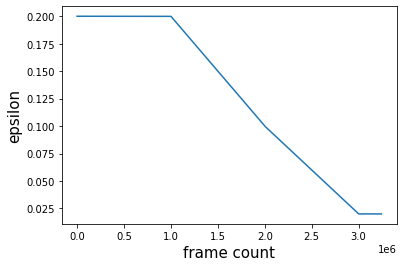

In [ ]:
plt.xlabel('frame count',size=15)
plt.ylabel('epsilon',size=15)
plt.plot(frameCount_History,epsilon_history)

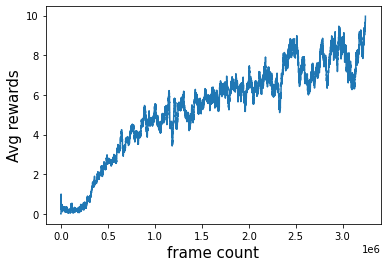

In [ ]:
plt.xlabel('frame count',size=15)
plt.ylabel('Avg rewards',size=15)
plt.plot(frameCount_History,running_reward_history)

5. Save and load the model

In [ ]:
model_name = 'breakout_model_1'
path = save_model_dqn(model,model_name)

model = load_model_dqn(path)

INFO:tensorflow:Assets written to: /content/mydrive/MyDrive/breakout_model_1/assets


6. Making videos of our agent play

In [ ]:
def make_env():
  env = make_atari("BreakoutNoFrameskip-v4")
  env = wrap_deepmind(env, frame_stack=True)
  return env

In [ ]:
def record_n_plot(model):
  env = make_env()
  env = gym.wrappers.Monitor(env, "./vid1", force=True)
  num_actions=env.action_space.n

  observation = env.reset()
  info = 0
  reward_window = []
  reward_signal_history = []
  epsilon_history = []

  hits = []
  bltd = 180 #total bricks to destroy

  for i_episode in range(1):
    reward_window=[] 
    epsilon = 0.2
    

    for t in range(4000):
      if epsilon > np.random.rand(1)[0]:
        action = np.random.choice(num_actions)
      else:
        state_tensor = tf.convert_to_tensor(observation)
        state_tensor = tf.expand_dims(state_tensor, 0)
        action_probs = model(state_tensor, training=False)
        action = tf.argmax(action_probs[0]).numpy()
        
      observation, reward, done, info = env.step(action)
      hits.append(reward)
      reward_window.append(reward)
      if len(reward_window) > 30:
        del reward_window[:1] 
      if len(reward_window) == 30 and np.sum(reward_window) == 0:
        epsilon = 0.01 #explore
      else:
        epsilon = 0.0001
        #epsilon = max(epsilon,epsilon_min)

      epsilon_history.append(epsilon)
      reward_signal_history.append(reward)

      if done:
        print("Lost one life after {} timesteps".format(t+1))
        print(info)
        # Plot epsilon and reward signal
        fig,ax=plt.subplots(figsize=(20,3))
        #plt.clf()
        ax.plot(epsilon_history, color="red")
        ax.set_ylabel("epsilon",color="red",fontsize=14)
        ax2=ax.twinx()
        ax2.plot(reward_signal_history,color="blue")
        ax2.set_ylabel("reward_signal",color="blue",fontsize=14)
        plt.show()

        epsilon_history = []
        reward_signal_history = []
            
        bltd = bltd-np.sum(hits)
        
        hits = []
        print("Bricks left to destroy ", bltd)
        if info['ale.lives'] == 0:
          break
        env.reset()
    
    env.close()
    return bltd
    





Lost one life after 1124 timesteps
{'ale.lives': 4}


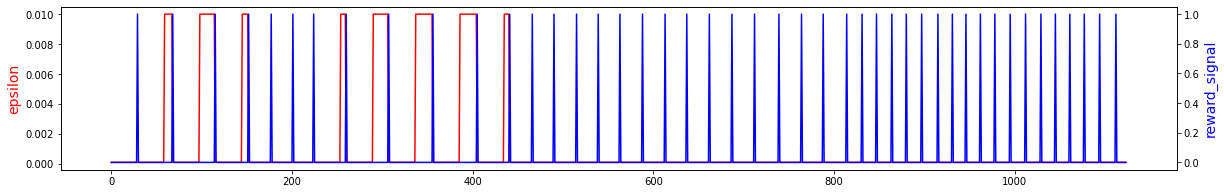

Bricks left to destroy  135.0
Lost one life after 1257 timesteps
{'ale.lives': 3}


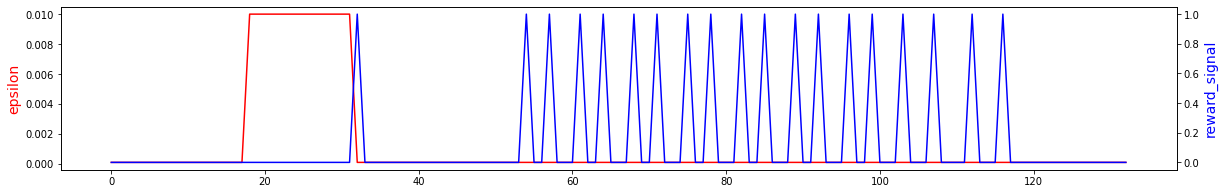

Bricks left to destroy  116.0
Lost one life after 1280 timesteps
{'ale.lives': 2}


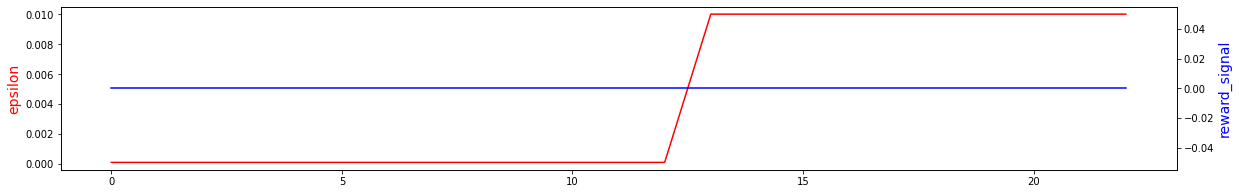

Bricks left to destroy  116.0
Lost one life after 1303 timesteps
{'ale.lives': 1}


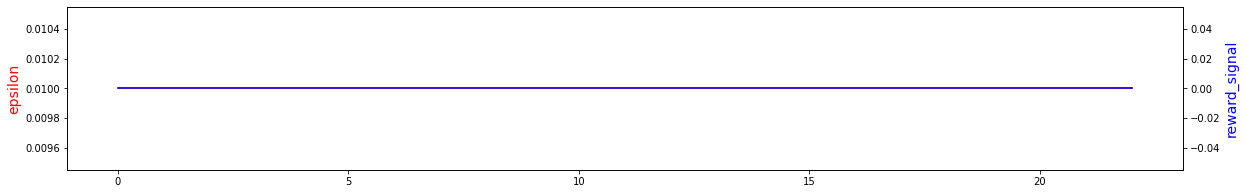

Bricks left to destroy  116.0
Lost one life after 1435 timesteps
{'ale.lives': 0}


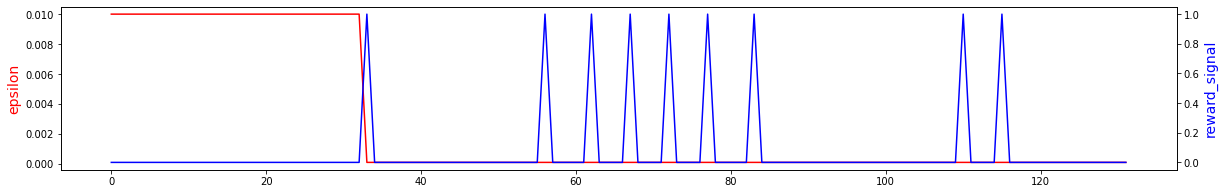

Bricks left to destroy  107.0


In [ ]:
left = record_n_plot(model)

Lost one life after 69 timesteps
{'ale.lives': 4}


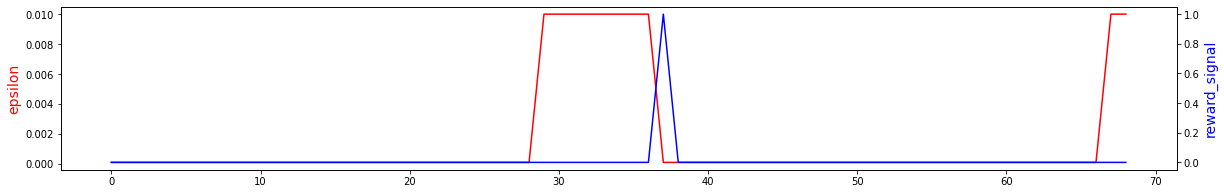

Bricks left to destroy  179.0
Lost one life after 276 timesteps
{'ale.lives': 3}


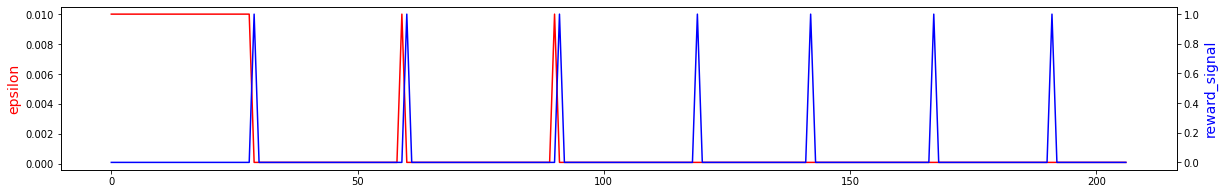

Bricks left to destroy  172.0
Lost one life after 740 timesteps
{'ale.lives': 2}


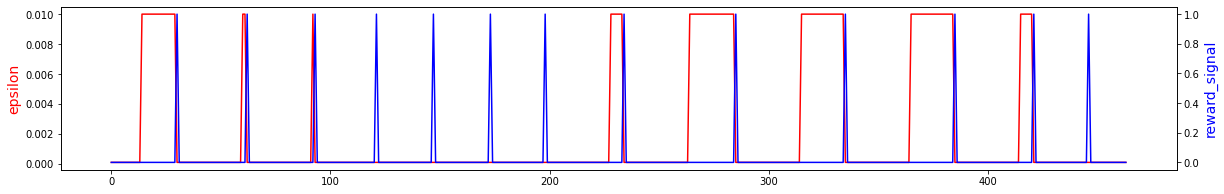

Bricks left to destroy  159.0
Lost one life after 1298 timesteps
{'ale.lives': 1}


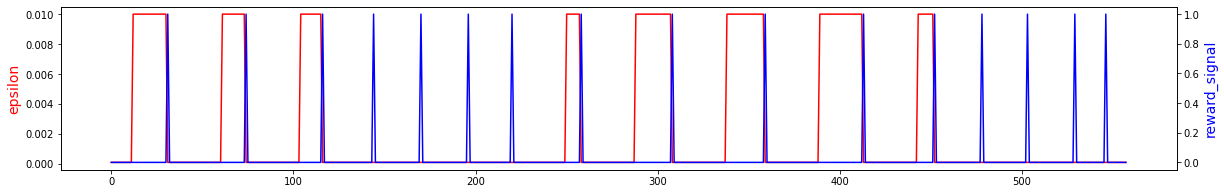

Bricks left to destroy  143.0
Lost one life after 1484 timesteps
{'ale.lives': 0}


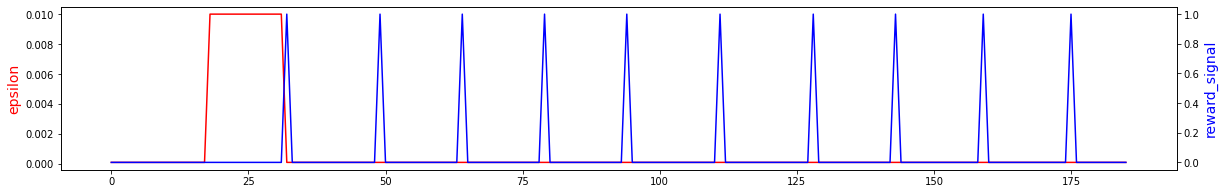

Bricks left to destroy  133.0
Lost one life after 1124 timesteps
{'ale.lives': 4}


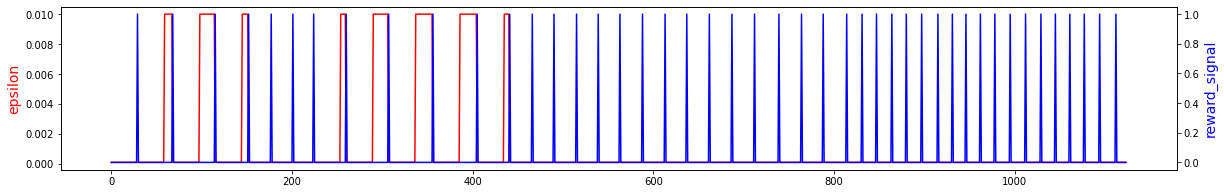

Bricks left to destroy  135.0
Lost one life after 1257 timesteps
{'ale.lives': 3}


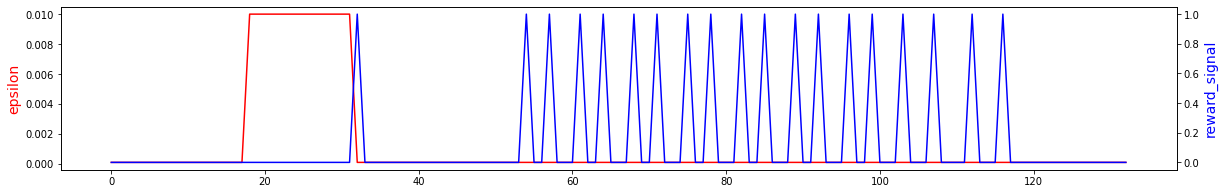

Bricks left to destroy  116.0
Lost one life after 1280 timesteps
{'ale.lives': 2}


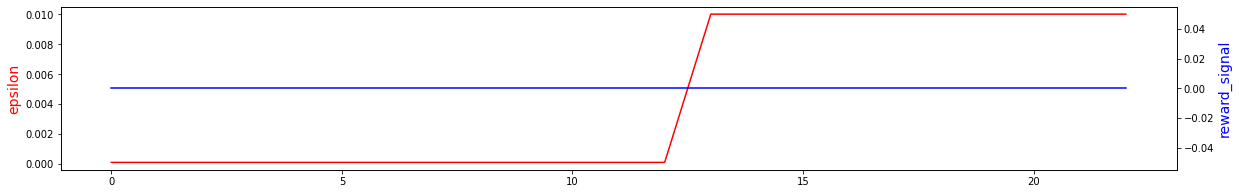

Bricks left to destroy  116.0
Lost one life after 1431 timesteps
{'ale.lives': 1}


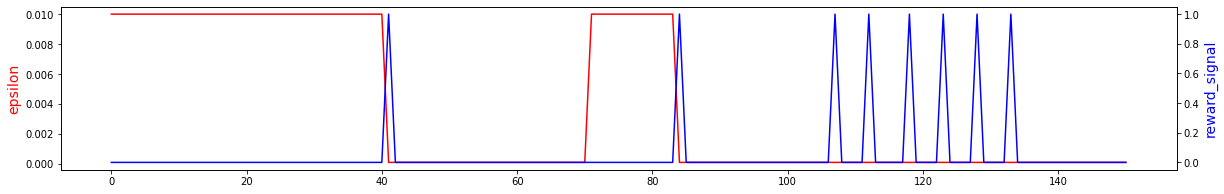

Bricks left to destroy  108.0
Lost one life after 1498 timesteps
{'ale.lives': 0}


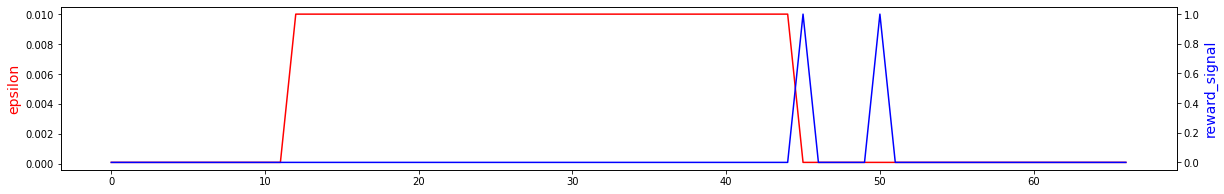

Bricks left to destroy  106.0
Lost one life after 1124 timesteps
{'ale.lives': 4}


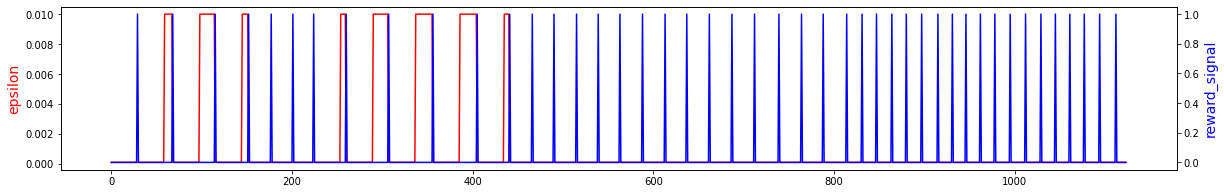

Bricks left to destroy  135.0
Lost one life after 1257 timesteps
{'ale.lives': 3}


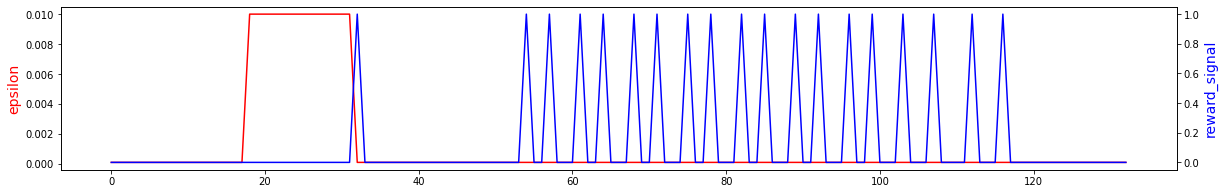

Bricks left to destroy  116.0
Lost one life after 1280 timesteps
{'ale.lives': 2}


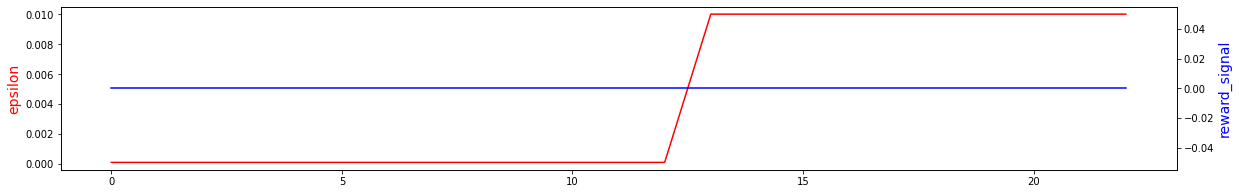

Bricks left to destroy  116.0
Lost one life after 1303 timesteps
{'ale.lives': 1}


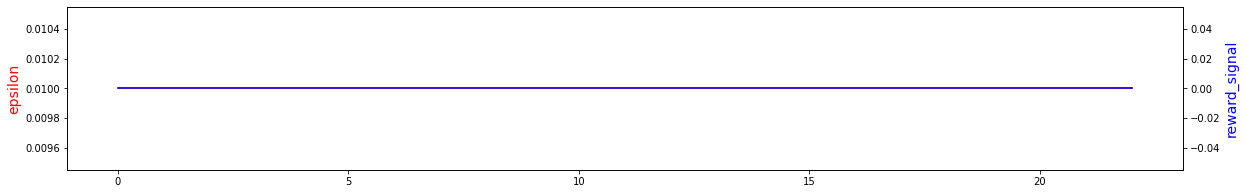

Bricks left to destroy  116.0
Lost one life after 1435 timesteps
{'ale.lives': 0}


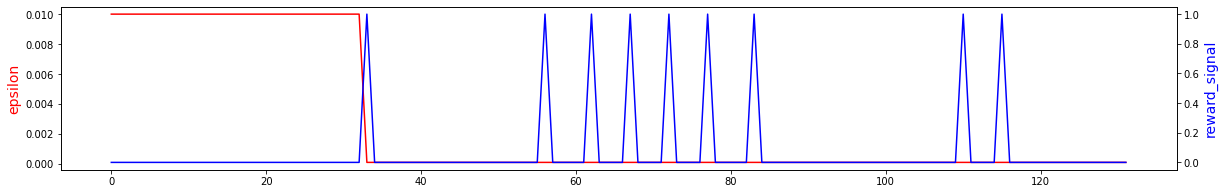

Bricks left to destroy  107.0
Lost one life after 1124 timesteps
{'ale.lives': 4}


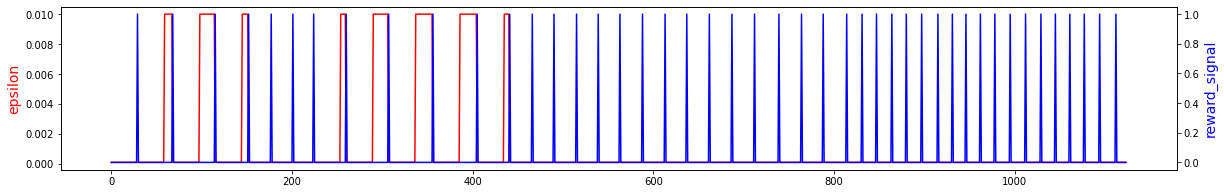

Bricks left to destroy  135.0
Lost one life after 1257 timesteps
{'ale.lives': 3}


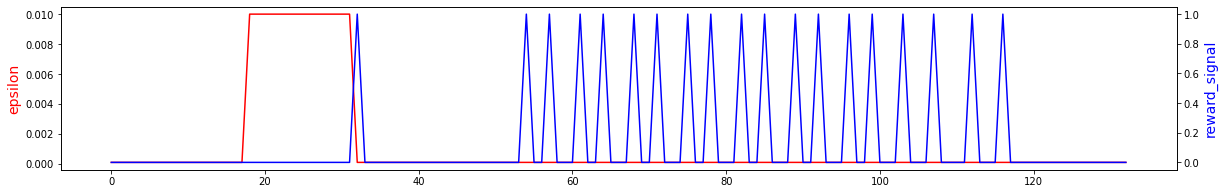

Bricks left to destroy  116.0
Lost one life after 1280 timesteps
{'ale.lives': 2}


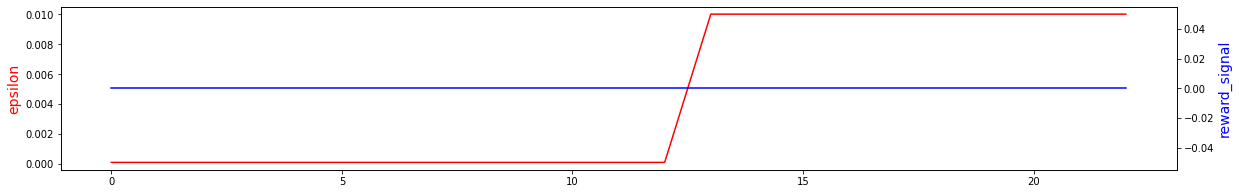

Bricks left to destroy  116.0
Lost one life after 1303 timesteps
{'ale.lives': 1}


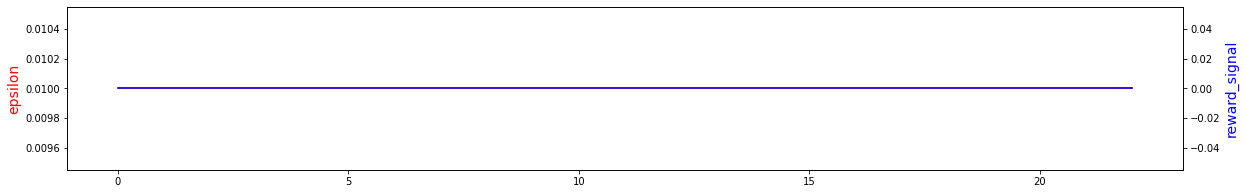

Bricks left to destroy  116.0
Lost one life after 1326 timesteps
{'ale.lives': 0}


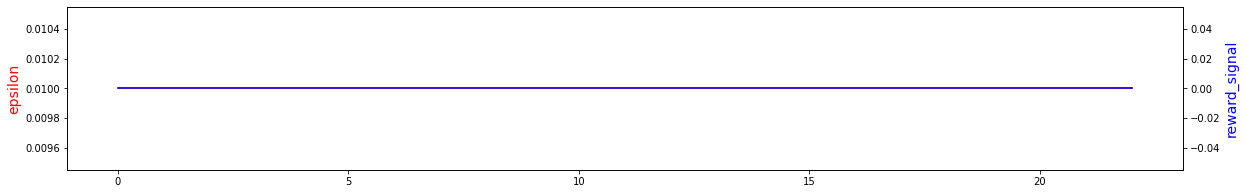

Bricks left to destroy  116.0
Lost one life after 69 timesteps
{'ale.lives': 4}


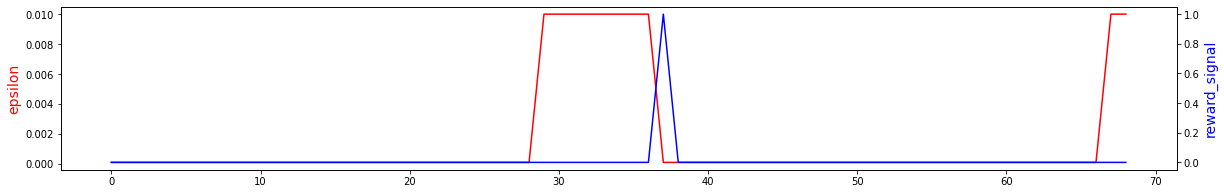

Bricks left to destroy  179.0
Lost one life after 276 timesteps
{'ale.lives': 3}


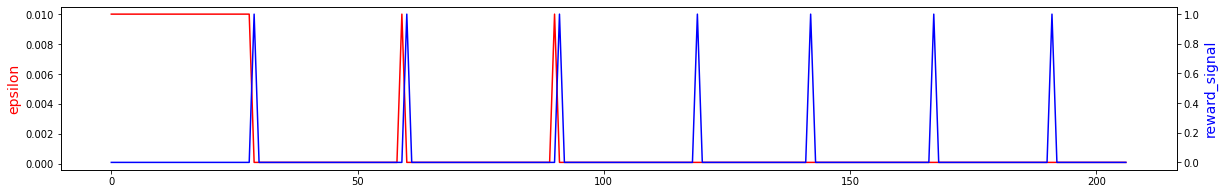

Bricks left to destroy  172.0
Lost one life after 740 timesteps
{'ale.lives': 2}


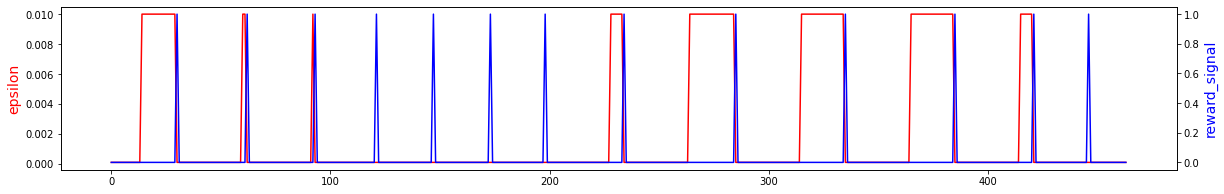

Bricks left to destroy  159.0
Lost one life after 1298 timesteps
{'ale.lives': 1}


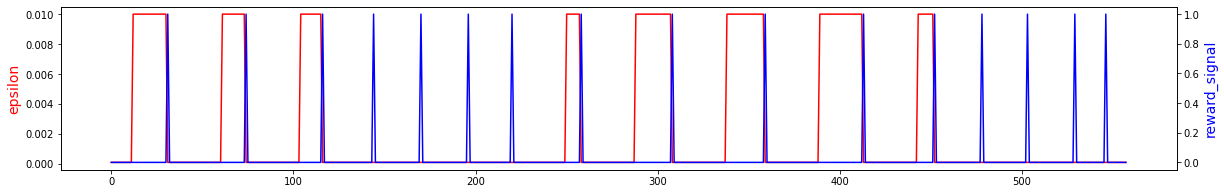

Bricks left to destroy  143.0
Lost one life after 1484 timesteps
{'ale.lives': 0}


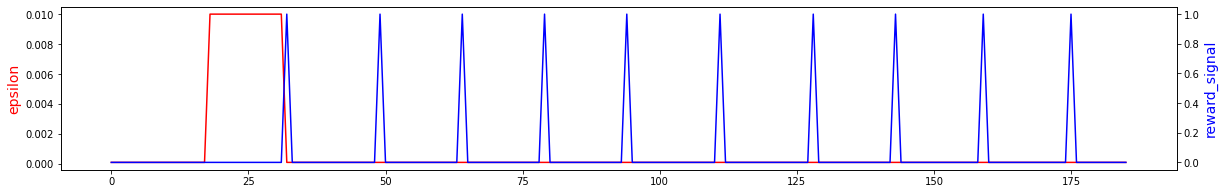

Bricks left to destroy  133.0
Lost one life after 658 timesteps
{'ale.lives': 4}


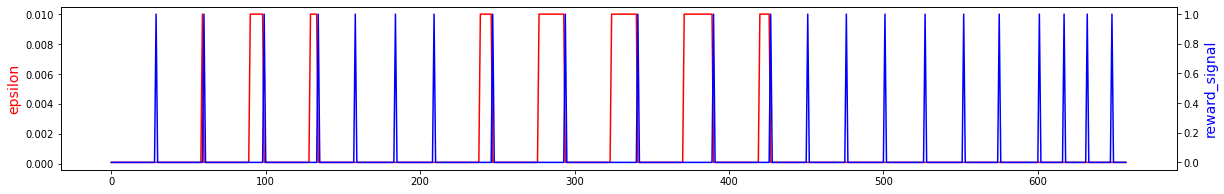

Bricks left to destroy  158.0
Lost one life after 830 timesteps
{'ale.lives': 3}


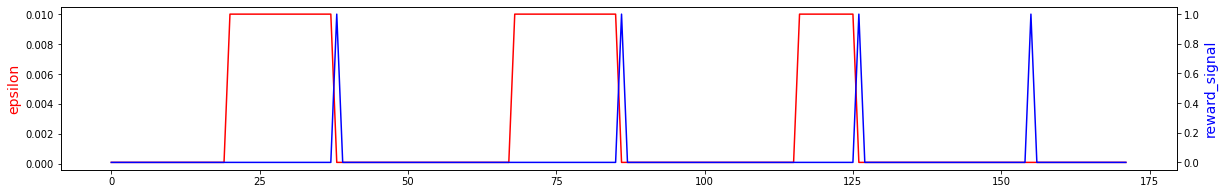

Bricks left to destroy  154.0
Lost one life after 1013 timesteps
{'ale.lives': 2}


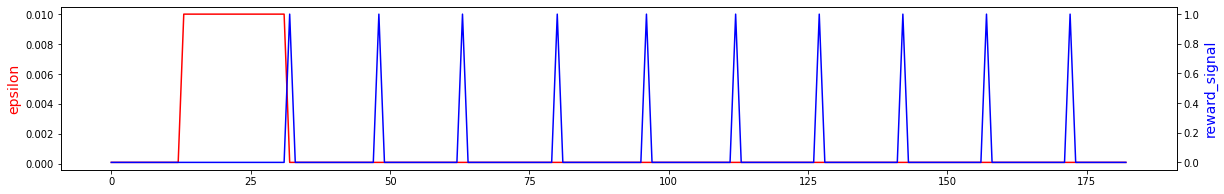

Bricks left to destroy  144.0
Lost one life after 1125 timesteps
{'ale.lives': 1}


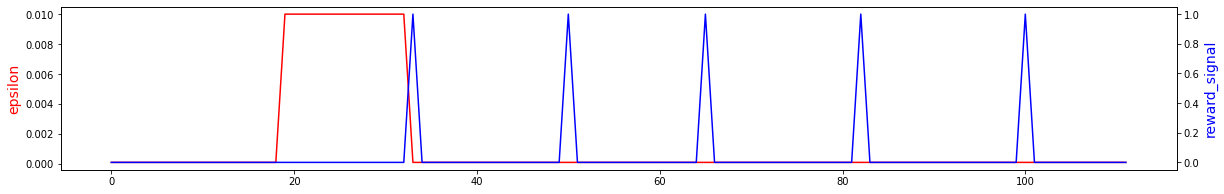

Bricks left to destroy  139.0
Lost one life after 1198 timesteps
{'ale.lives': 0}


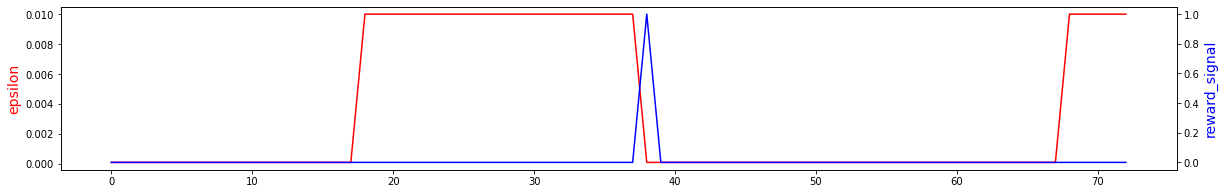

Bricks left to destroy  138.0
Lost one life after 69 timesteps
{'ale.lives': 4}


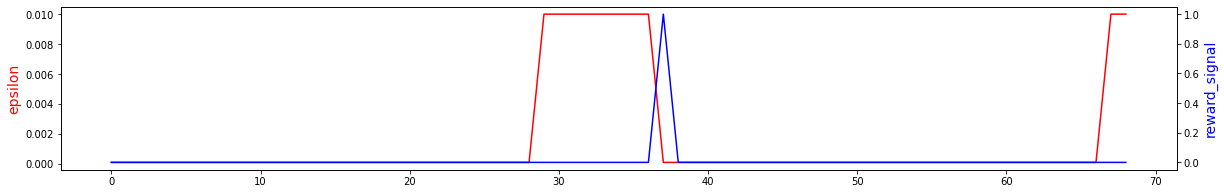

Bricks left to destroy  179.0
Lost one life after 276 timesteps
{'ale.lives': 3}


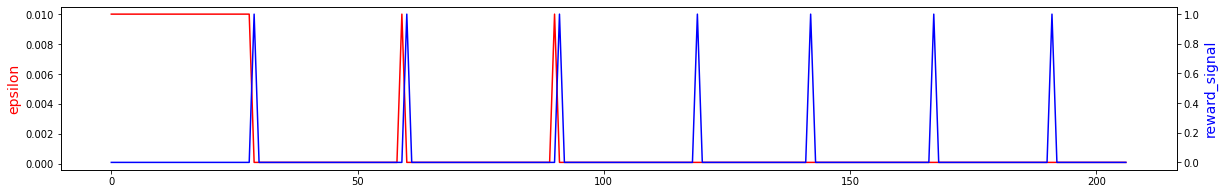

Bricks left to destroy  172.0
Lost one life after 740 timesteps
{'ale.lives': 2}


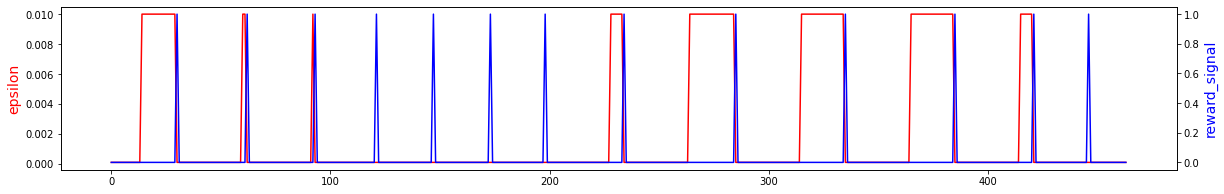

Bricks left to destroy  159.0
Lost one life after 1298 timesteps
{'ale.lives': 1}


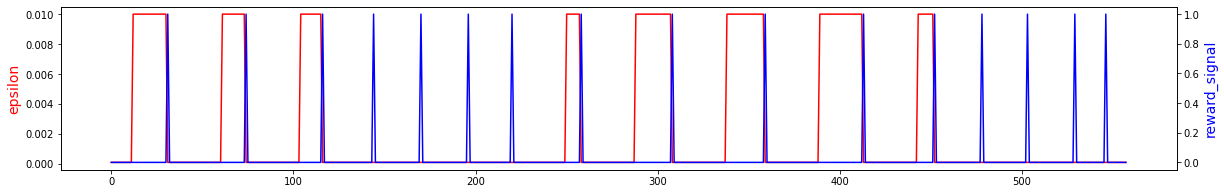

Bricks left to destroy  143.0
Lost one life after 1484 timesteps
{'ale.lives': 0}


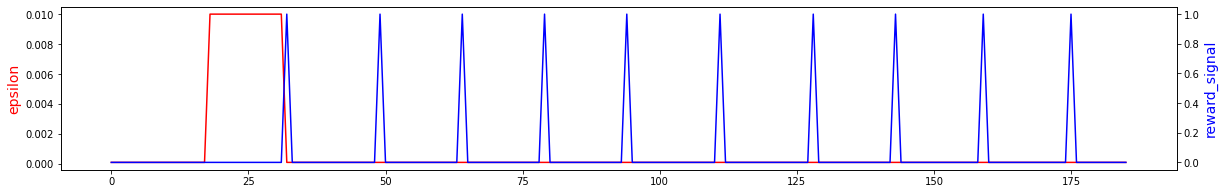

Bricks left to destroy  133.0
Lost one life after 1124 timesteps
{'ale.lives': 4}


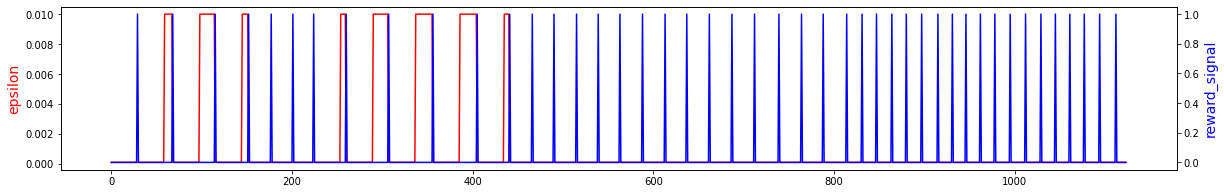

Bricks left to destroy  135.0
Lost one life after 1257 timesteps
{'ale.lives': 3}


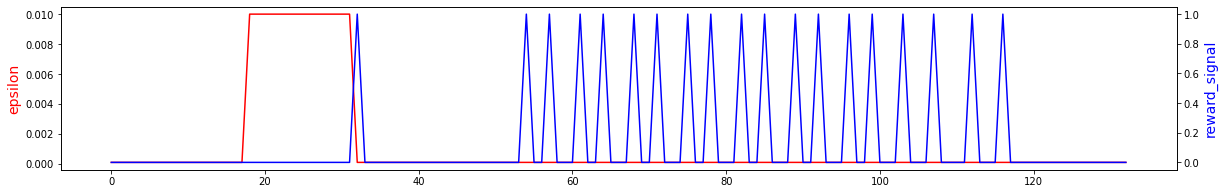

Bricks left to destroy  116.0
Lost one life after 1280 timesteps
{'ale.lives': 2}


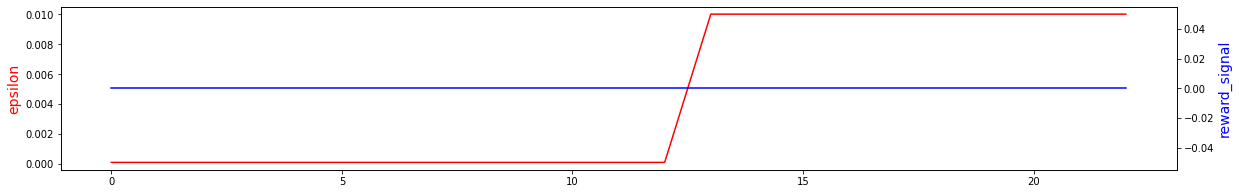

Bricks left to destroy  116.0
Lost one life after 1303 timesteps
{'ale.lives': 1}


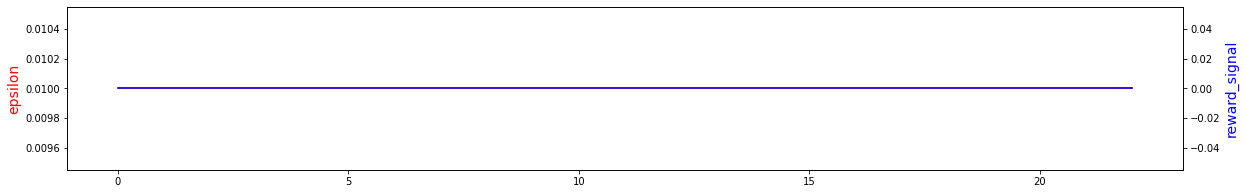

Bricks left to destroy  116.0
Lost one life after 1435 timesteps
{'ale.lives': 0}


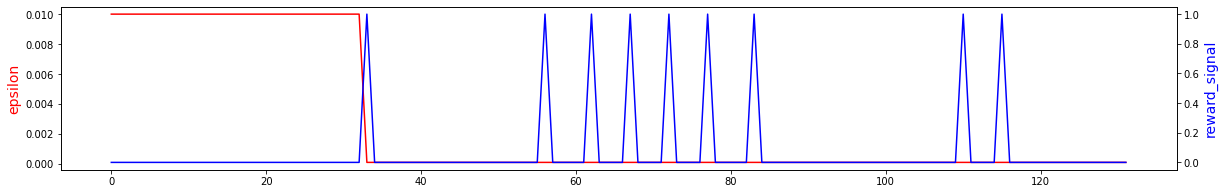

Bricks left to destroy  107.0
Lost one life after 1124 timesteps
{'ale.lives': 4}


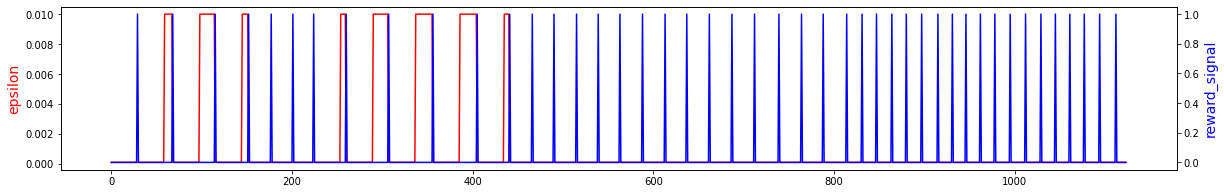

Bricks left to destroy  135.0
Lost one life after 1257 timesteps
{'ale.lives': 3}


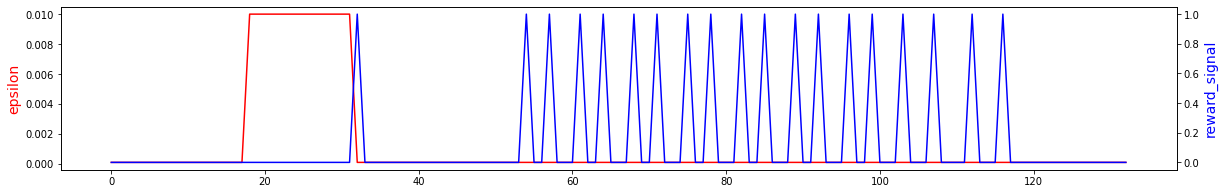

Bricks left to destroy  116.0
Lost one life after 1280 timesteps
{'ale.lives': 2}


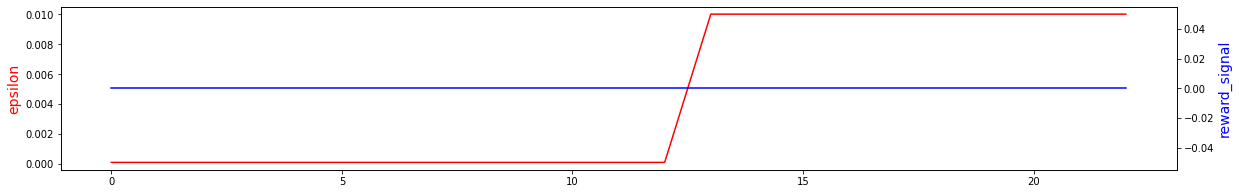

Bricks left to destroy  116.0
Lost one life after 1412 timesteps
{'ale.lives': 1}


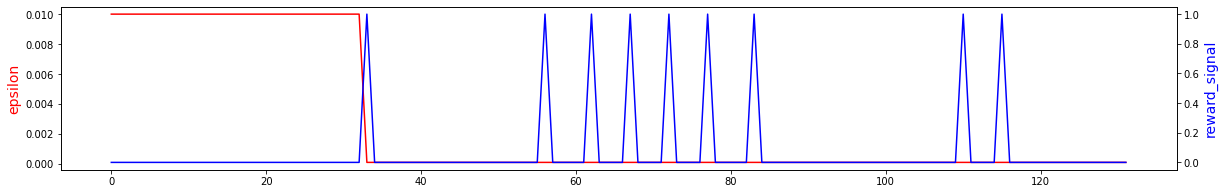

Bricks left to destroy  107.0
Lost one life after 1435 timesteps
{'ale.lives': 0}


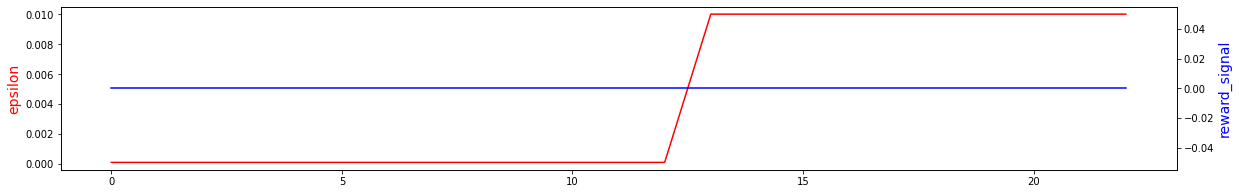

Bricks left to destroy  107.0
Lost one life after 1124 timesteps
{'ale.lives': 4}


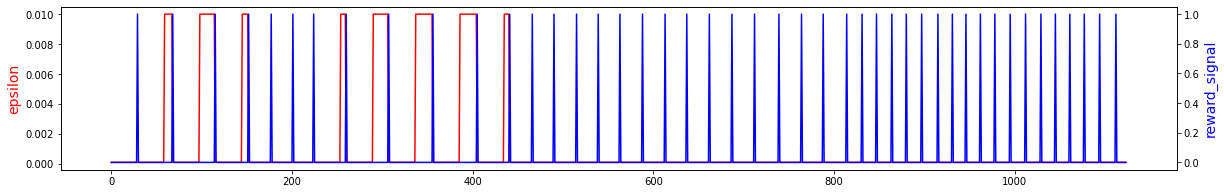

Bricks left to destroy  135.0
Lost one life after 1257 timesteps
{'ale.lives': 3}


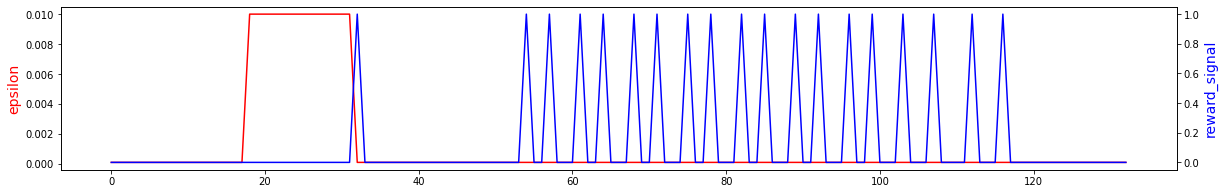

Bricks left to destroy  116.0
Lost one life after 1280 timesteps
{'ale.lives': 2}


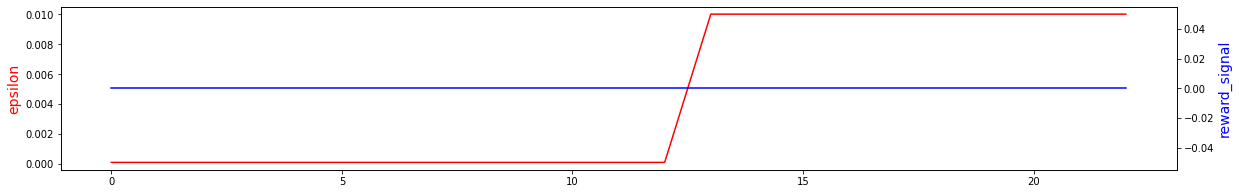

Bricks left to destroy  116.0
Lost one life after 1303 timesteps
{'ale.lives': 1}


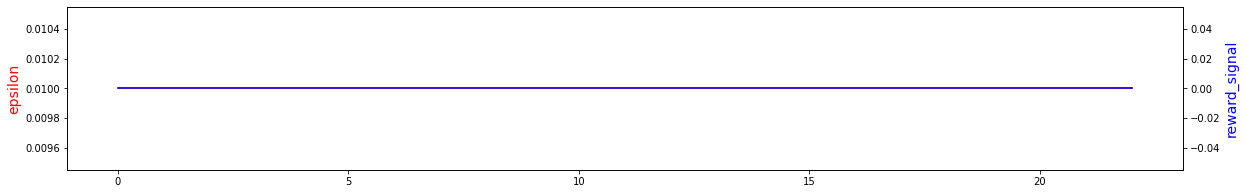

Bricks left to destroy  116.0
Lost one life after 1348 timesteps
{'ale.lives': 0}


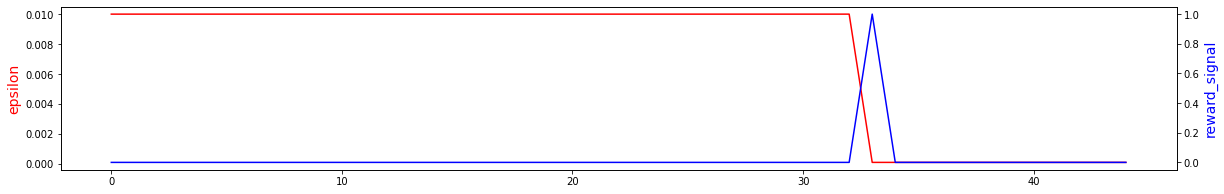

Bricks left to destroy  115.0
Lost one life after 387 timesteps
{'ale.lives': 4}


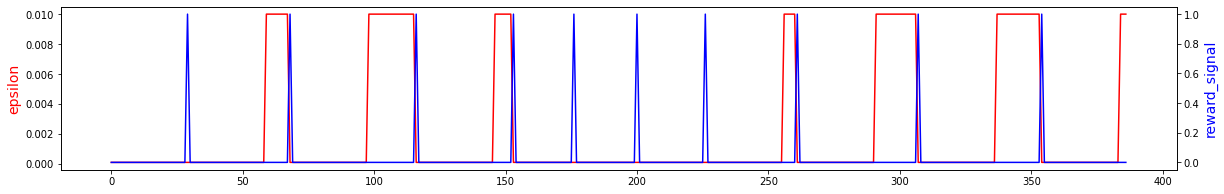

Bricks left to destroy  170.0
Lost one life after 884 timesteps
{'ale.lives': 3}


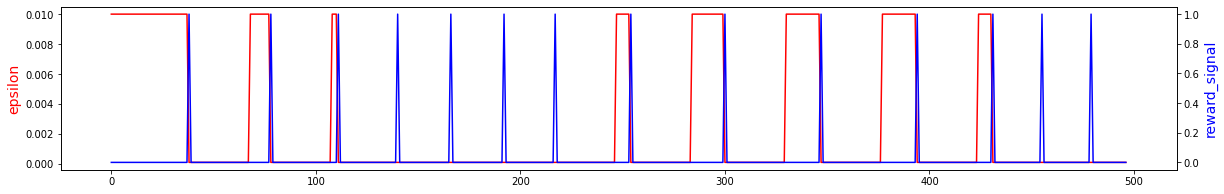

Bricks left to destroy  156.0
Lost one life after 1022 timesteps
{'ale.lives': 2}


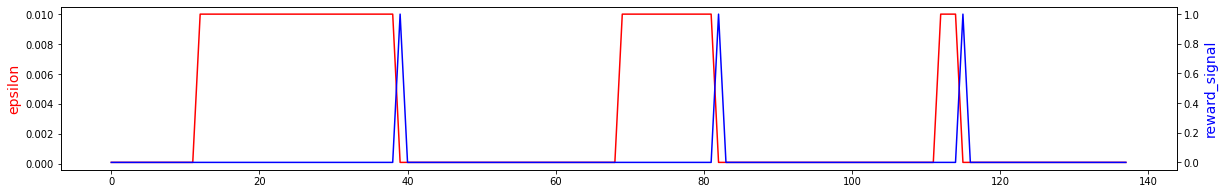

Bricks left to destroy  153.0
Lost one life after 1604 timesteps
{'ale.lives': 1}


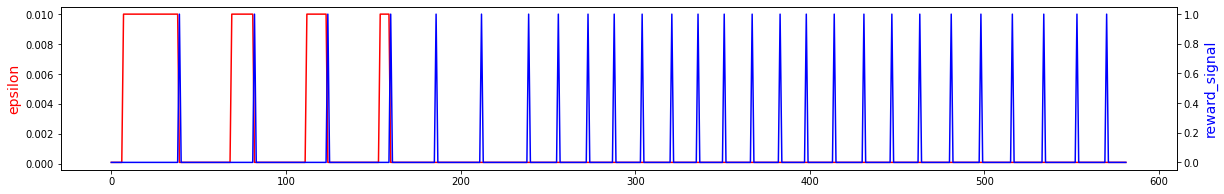

Bricks left to destroy  126.0
Lost one life after 1649 timesteps
{'ale.lives': 0}


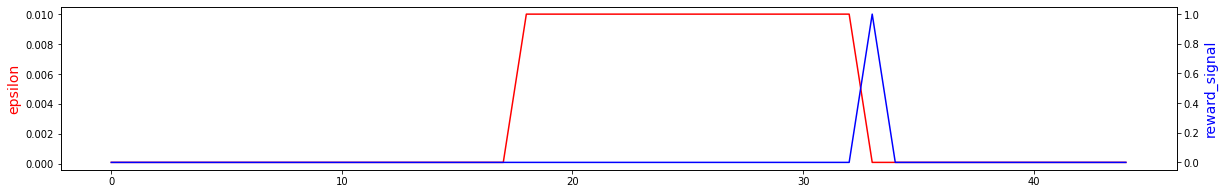

Bricks left to destroy  125.0
Lost one life after 387 timesteps
{'ale.lives': 4}


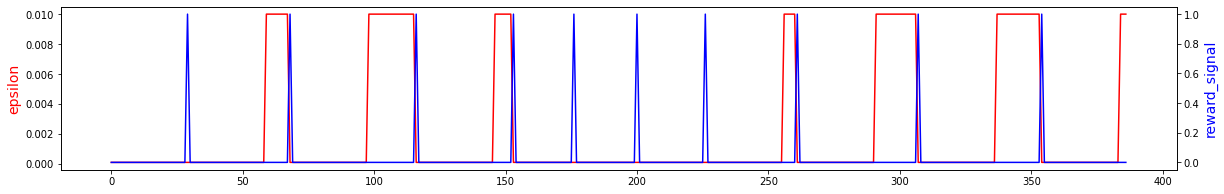

Bricks left to destroy  170.0
Lost one life after 884 timesteps
{'ale.lives': 3}


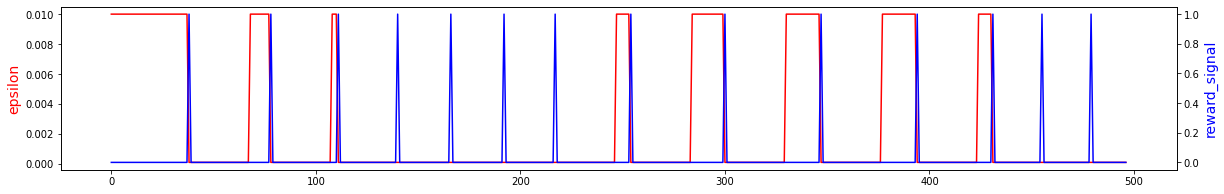

Bricks left to destroy  156.0
Lost one life after 1022 timesteps
{'ale.lives': 2}


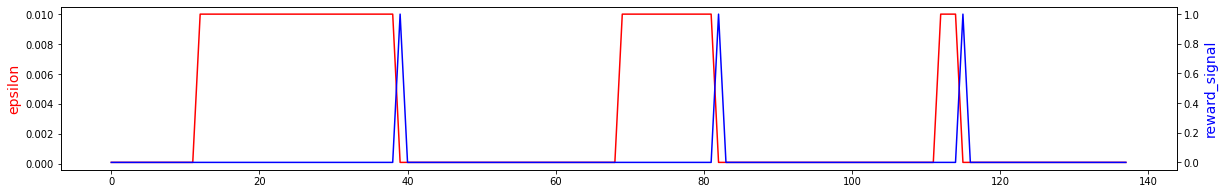

Bricks left to destroy  153.0
Lost one life after 1604 timesteps
{'ale.lives': 1}


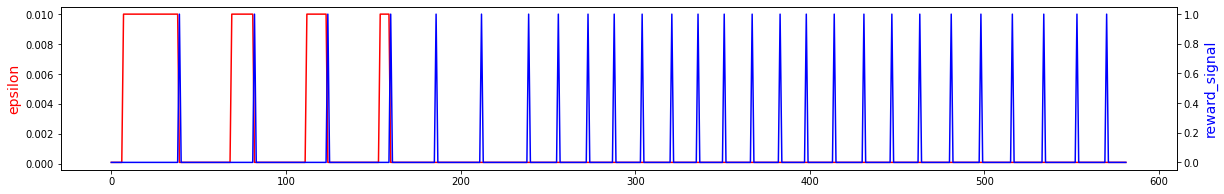

Bricks left to destroy  126.0
Lost one life after 1649 timesteps
{'ale.lives': 0}


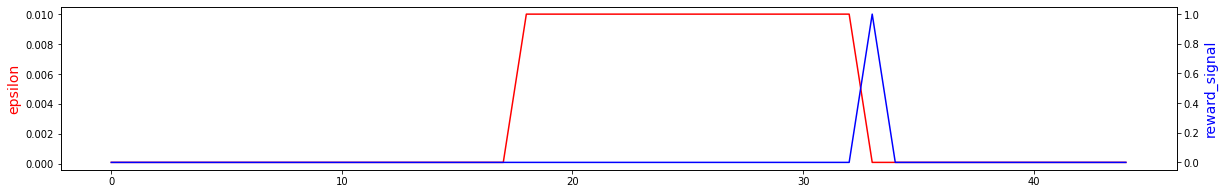

Bricks left to destroy  125.0
Lost one life after 658 timesteps
{'ale.lives': 4}


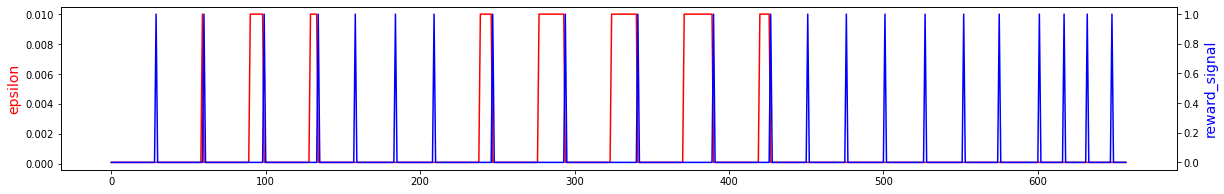

Bricks left to destroy  158.0
Lost one life after 830 timesteps
{'ale.lives': 3}


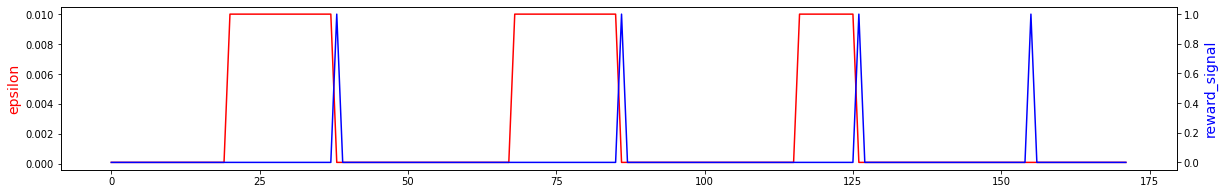

Bricks left to destroy  154.0
Lost one life after 1013 timesteps
{'ale.lives': 2}


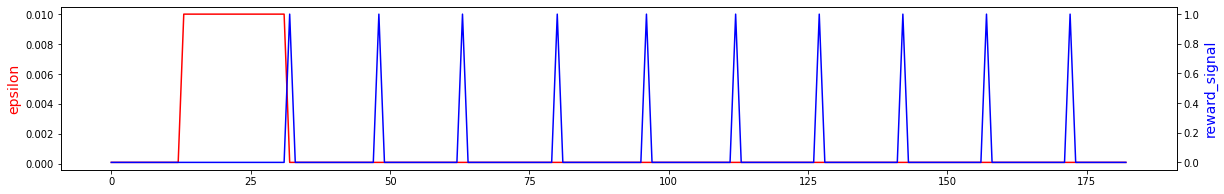

Bricks left to destroy  144.0
Lost one life after 1125 timesteps
{'ale.lives': 1}


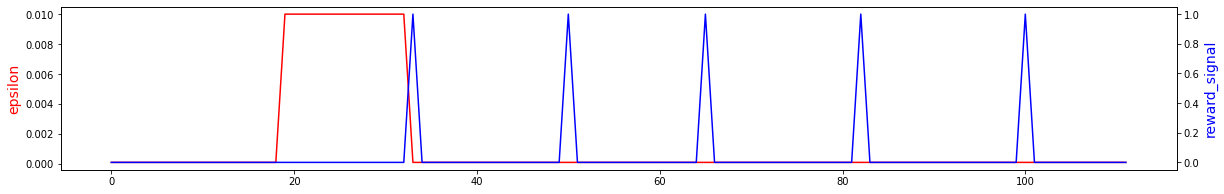

Bricks left to destroy  139.0
Lost one life after 1198 timesteps
{'ale.lives': 0}


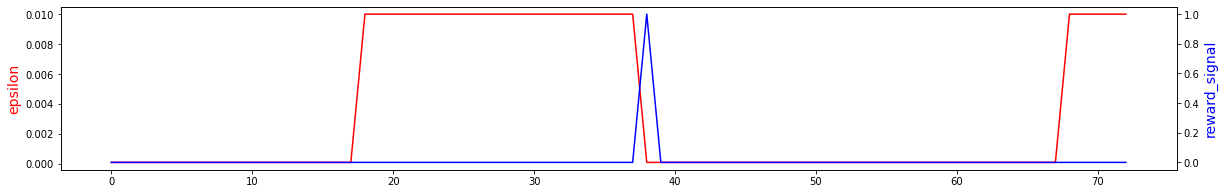

Bricks left to destroy  138.0
Lost one life after 1124 timesteps
{'ale.lives': 4}


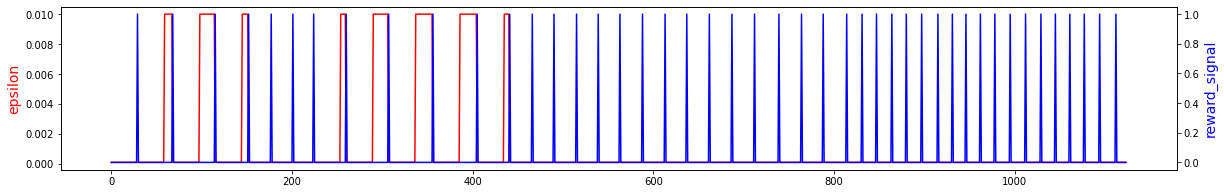

Bricks left to destroy  135.0
Lost one life after 1257 timesteps
{'ale.lives': 3}


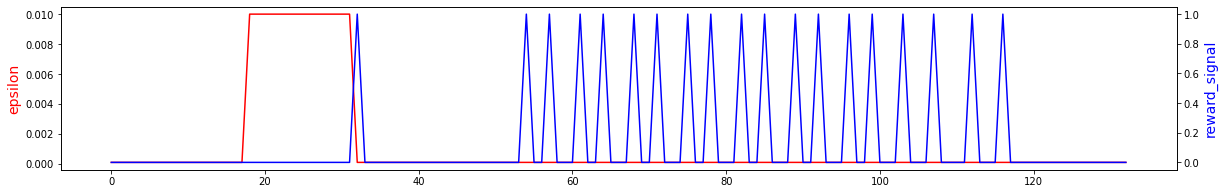

Bricks left to destroy  116.0
Lost one life after 1280 timesteps
{'ale.lives': 2}


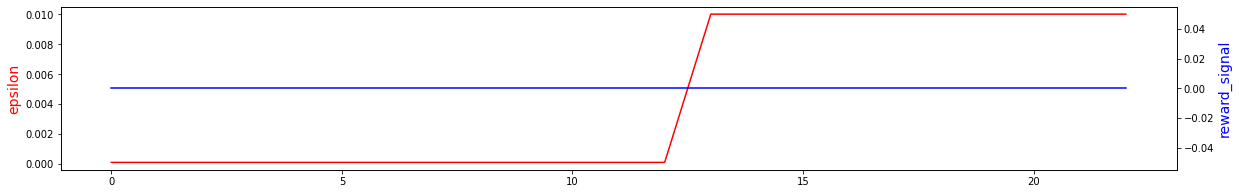

Bricks left to destroy  116.0
Lost one life after 1303 timesteps
{'ale.lives': 1}


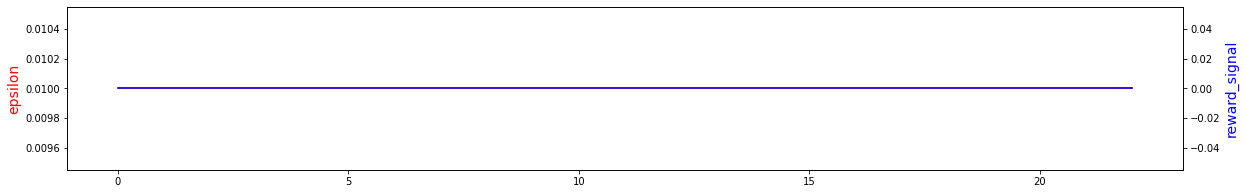

Bricks left to destroy  116.0
Lost one life after 1435 timesteps
{'ale.lives': 0}


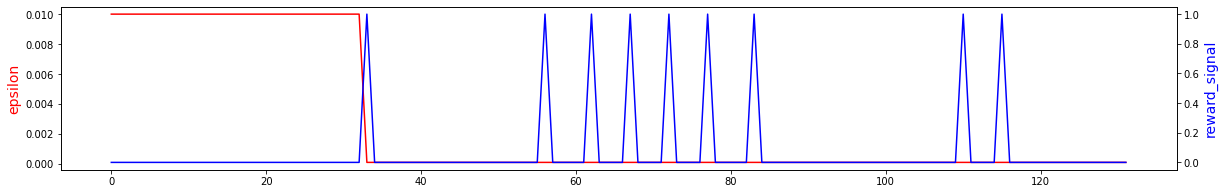

Bricks left to destroy  107.0
Lost one life after 69 timesteps
{'ale.lives': 4}


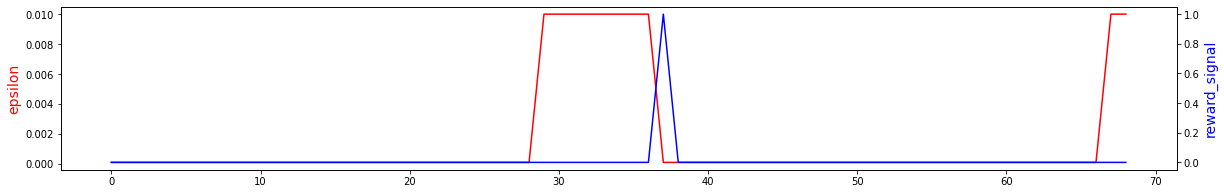

Bricks left to destroy  179.0
Lost one life after 276 timesteps
{'ale.lives': 3}


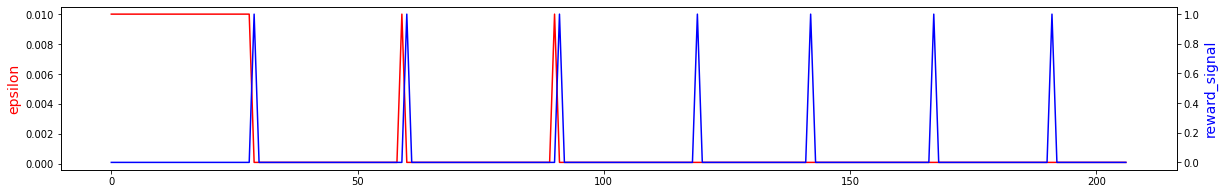

Bricks left to destroy  172.0
Lost one life after 740 timesteps
{'ale.lives': 2}


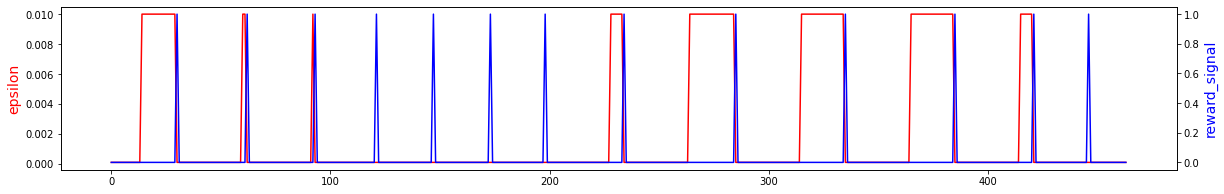

Bricks left to destroy  159.0
Lost one life after 1298 timesteps
{'ale.lives': 1}


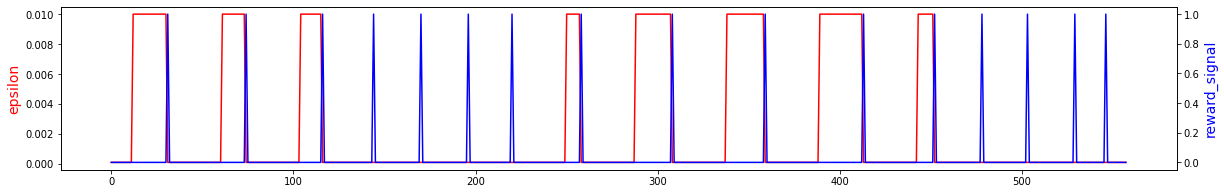

Bricks left to destroy  143.0
Lost one life after 1484 timesteps
{'ale.lives': 0}


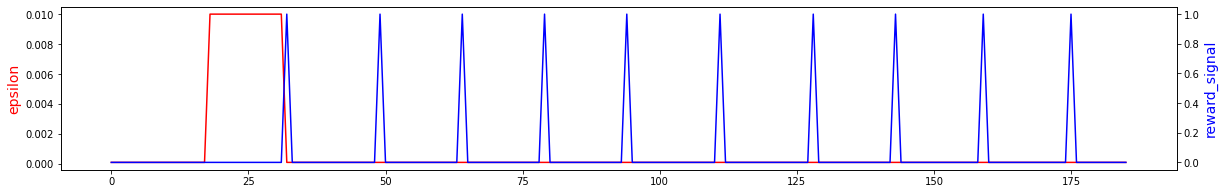

Bricks left to destroy  133.0
Lost one life after 1124 timesteps
{'ale.lives': 4}


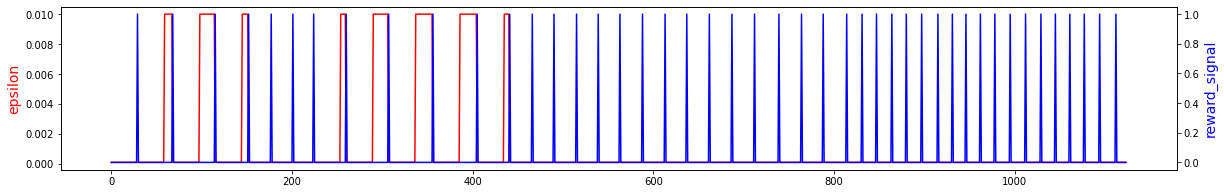

Bricks left to destroy  135.0
Lost one life after 1257 timesteps
{'ale.lives': 3}


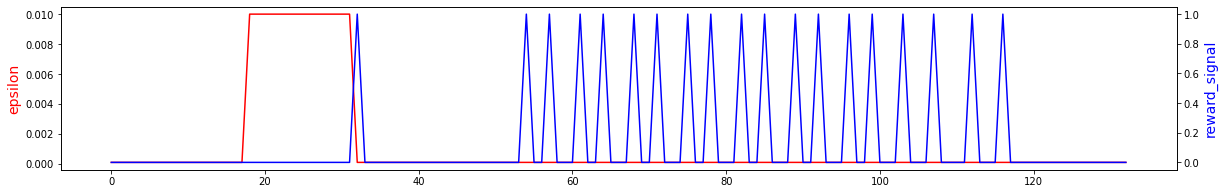

Bricks left to destroy  116.0
Lost one life after 1280 timesteps
{'ale.lives': 2}


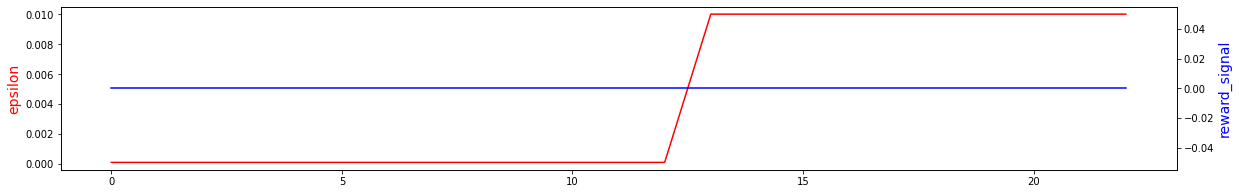

Bricks left to destroy  116.0
Lost one life after 1303 timesteps
{'ale.lives': 1}


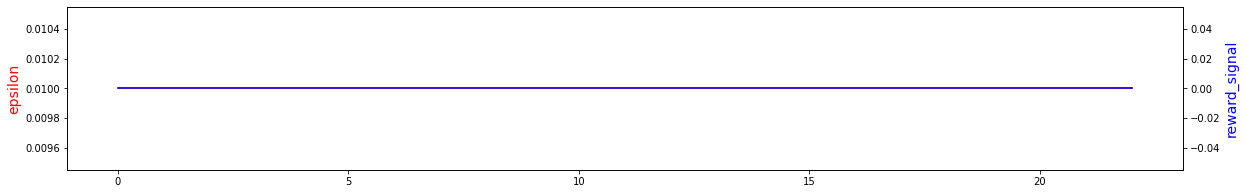

Bricks left to destroy  116.0
Lost one life after 1435 timesteps
{'ale.lives': 0}


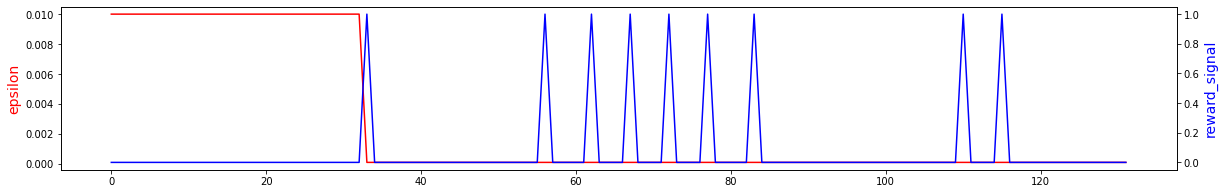

Bricks left to destroy  107.0
Lost one life after 387 timesteps
{'ale.lives': 4}


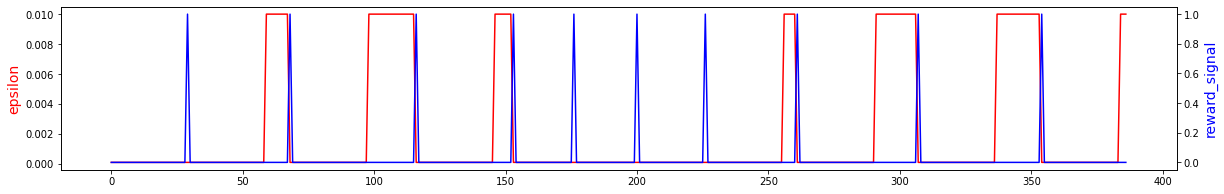

Bricks left to destroy  170.0
Lost one life after 884 timesteps
{'ale.lives': 3}


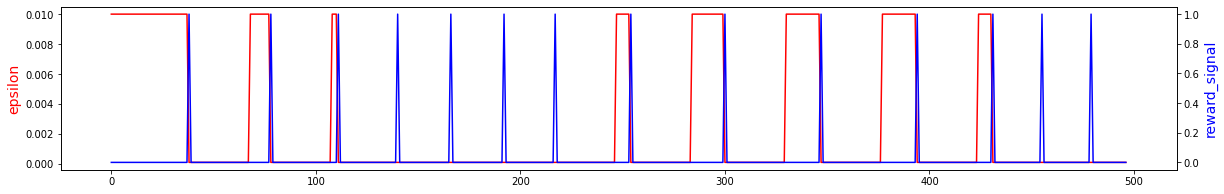

Bricks left to destroy  156.0
Lost one life after 1022 timesteps
{'ale.lives': 2}


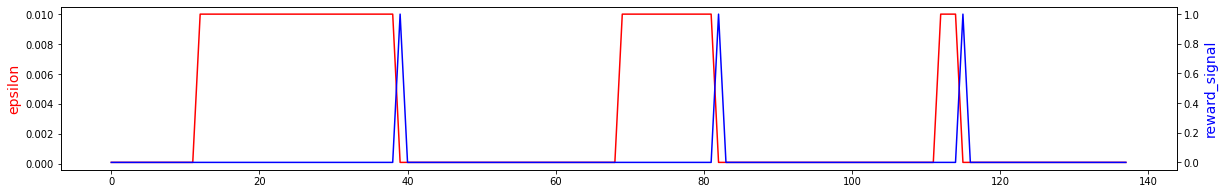

Bricks left to destroy  153.0
Lost one life after 1604 timesteps
{'ale.lives': 1}


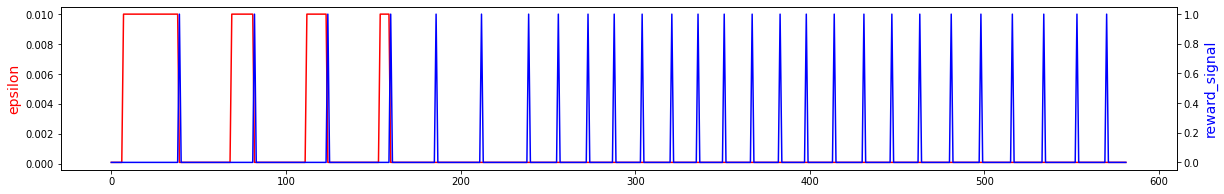

Bricks left to destroy  126.0
Lost one life after 1649 timesteps
{'ale.lives': 0}


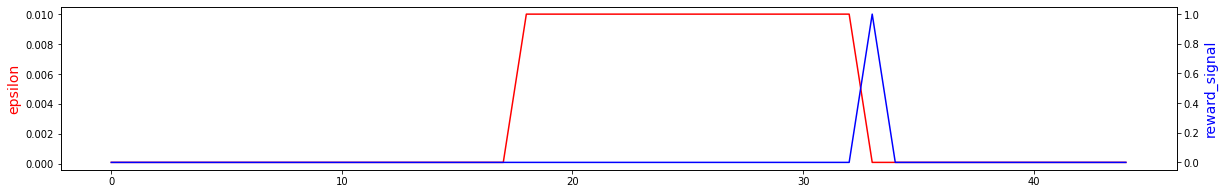

Bricks left to destroy  125.0
Lost one life after 1124 timesteps
{'ale.lives': 4}


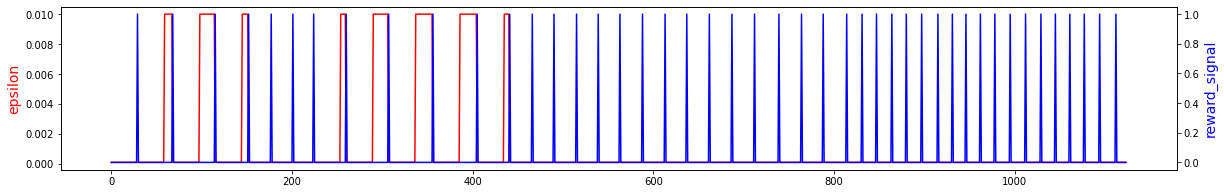

Bricks left to destroy  135.0
Lost one life after 1257 timesteps
{'ale.lives': 3}


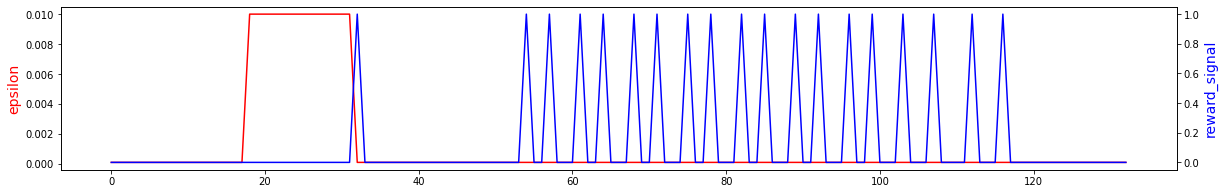

Bricks left to destroy  116.0
Lost one life after 1280 timesteps
{'ale.lives': 2}


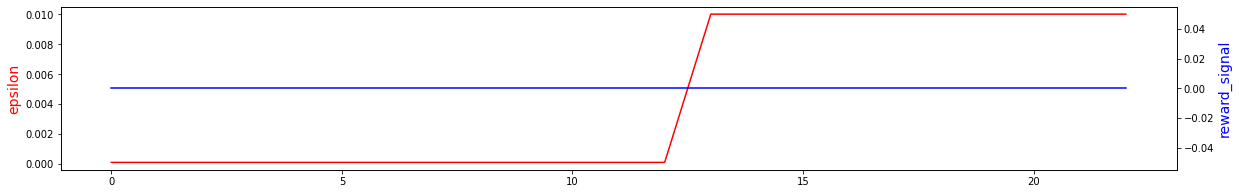

Bricks left to destroy  116.0
Lost one life after 1303 timesteps
{'ale.lives': 1}


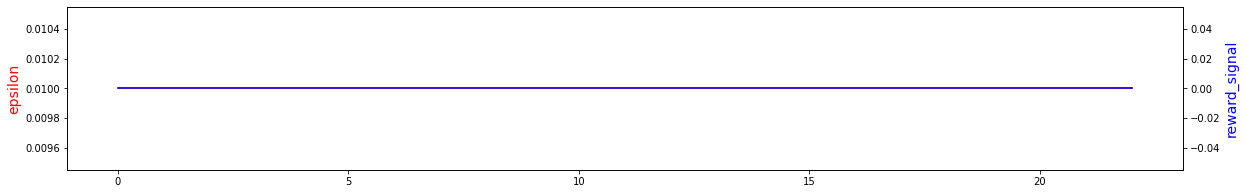

Bricks left to destroy  116.0
Lost one life after 1435 timesteps
{'ale.lives': 0}


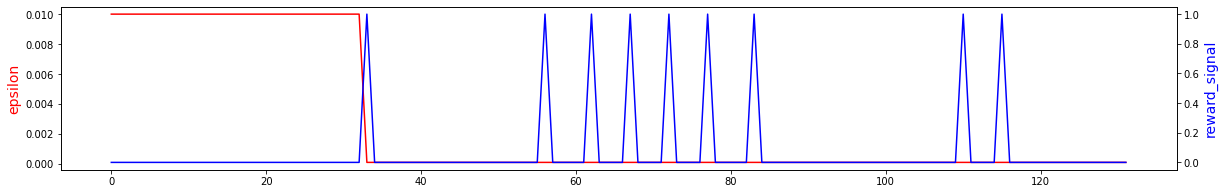

Bricks left to destroy  107.0
Lost one life after 69 timesteps
{'ale.lives': 4}


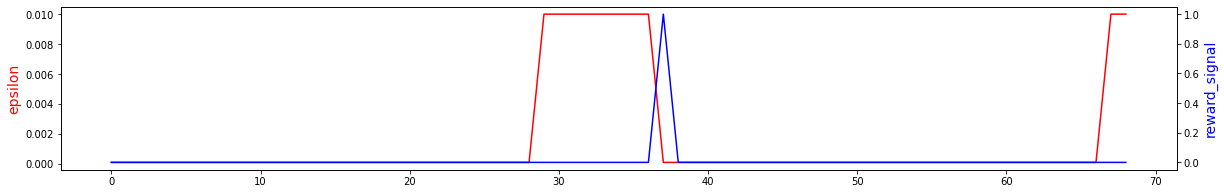

Bricks left to destroy  179.0
Lost one life after 276 timesteps
{'ale.lives': 3}


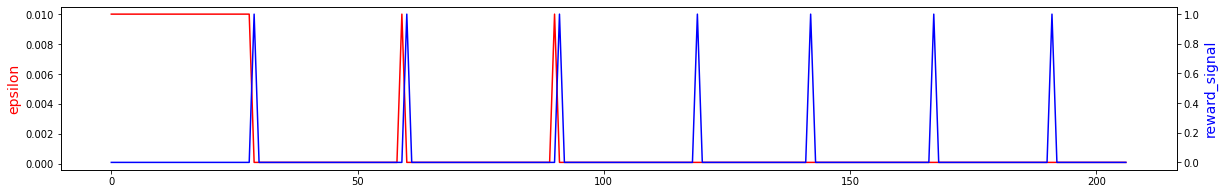

Bricks left to destroy  172.0
Lost one life after 740 timesteps
{'ale.lives': 2}


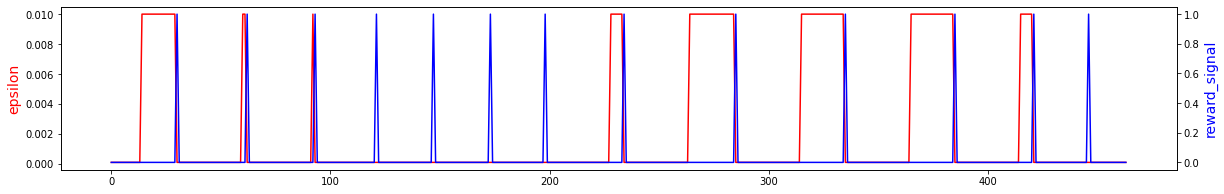

Bricks left to destroy  159.0
Lost one life after 1298 timesteps
{'ale.lives': 1}


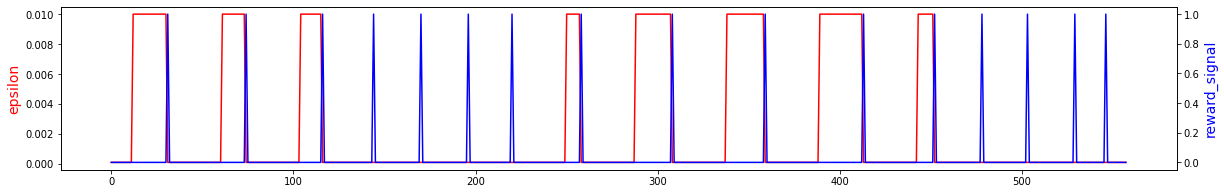

Bricks left to destroy  143.0
Lost one life after 1484 timesteps
{'ale.lives': 0}


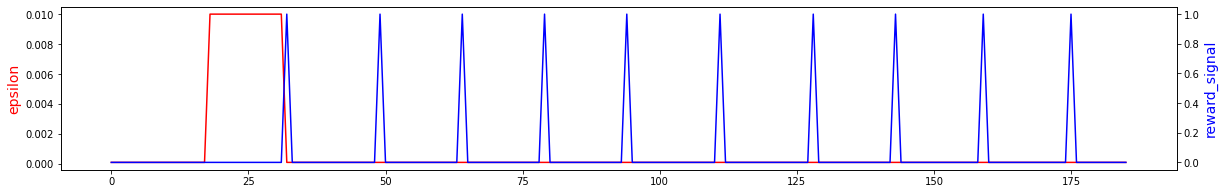

Bricks left to destroy  133.0
Lost one life after 658 timesteps
{'ale.lives': 4}


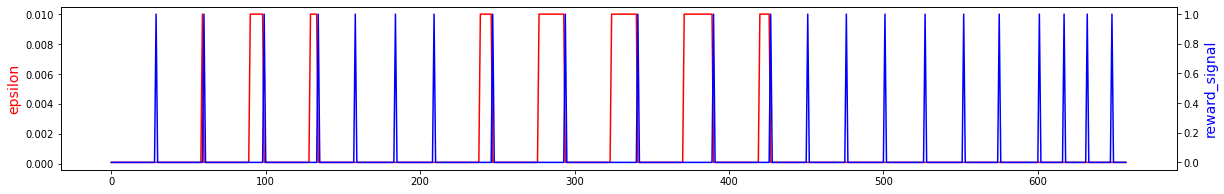

Bricks left to destroy  158.0
Lost one life after 830 timesteps
{'ale.lives': 3}


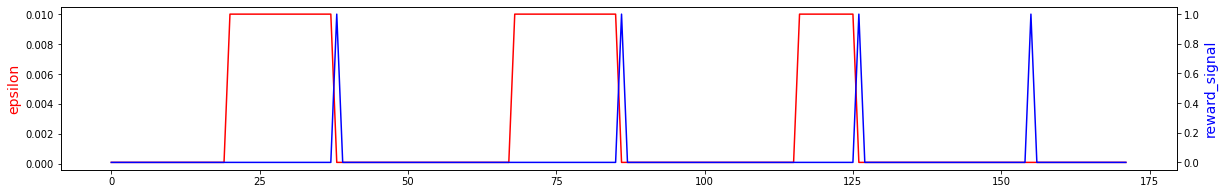

Bricks left to destroy  154.0
Lost one life after 1013 timesteps
{'ale.lives': 2}


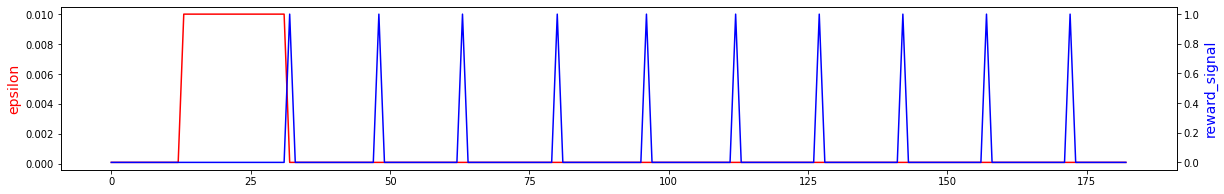

Bricks left to destroy  144.0
Lost one life after 1125 timesteps
{'ale.lives': 1}


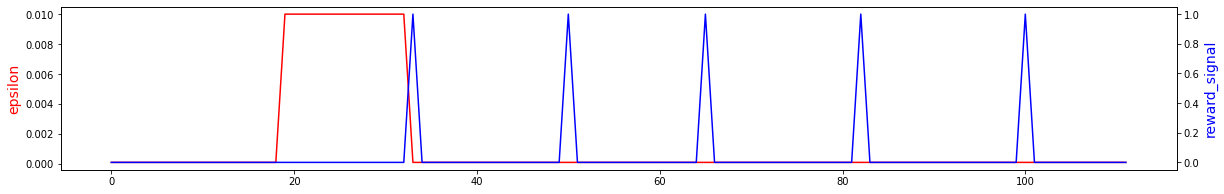

Bricks left to destroy  139.0
Lost one life after 1198 timesteps
{'ale.lives': 0}


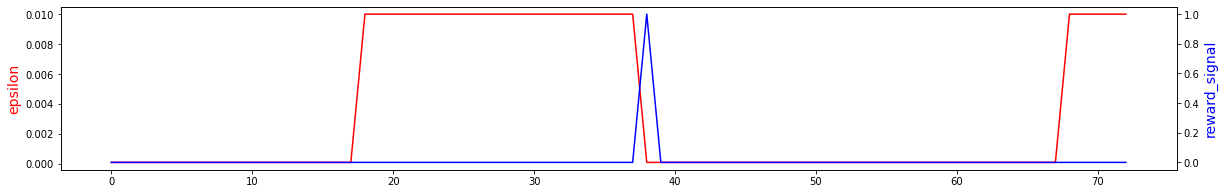

Bricks left to destroy  138.0


In [ ]:
#Playing the game 20 times to record the average rewards
average_rewards_count = []

for i in range(20):
  average_rewards_count.append(record_n_plot(model))

In [ ]:
##DQN
brick_left = average_rewards_count
for i in range(len(brick_left)):
  print(f"Average Score at Game{i+1} : {(180-brick_left[i])/5}")

Average Score at Game1 : 9.4
Average Score at Game2 : 14.8
Average Score at Game3 : 14.6
Average Score at Game4 : 12.8
Average Score at Game5 : 9.4
Average Score at Game6 : 8.4
Average Score at Game7 : 9.4
Average Score at Game8 : 14.6
Average Score at Game9 : 14.6
Average Score at Game10 : 13.0
Average Score at Game11 : 11.0
Average Score at Game12 : 11.0
Average Score at Game13 : 8.4
Average Score at Game14 : 14.6
Average Score at Game15 : 9.4
Average Score at Game16 : 14.6
Average Score at Game17 : 11.0
Average Score at Game18 : 14.6
Average Score at Game19 : 9.4
Average Score at Game20 : 8.4


### Dueling DQN

In [ ]:
mode = "DuelDQN"

model,model_target = get_models(mode)
start_time = datetime.now()

In [ ]:

maxscore_terminationCond=10
epsilon_history,running_reward_history,frameCount_History,loss_history = update_Q_Val(model,model_target,env,maxscore_terminationCond)

running reward: 0.30 at episode 287, frame count 10000, epsilon 0.200, loss 1.12907
running reward: 0.30 at episode 591, frame count 20000, epsilon 0.200, loss 1.32249
running reward: 0.36 at episode 884, frame count 30000, epsilon 0.200, loss 0.48772
running reward: 0.24 at episode 1208, frame count 40000, epsilon 0.200, loss 0.12286
running reward: 0.29 at episode 1518, frame count 50000, epsilon 0.200, loss 0.74256
running reward: 0.29 at episode 1807, frame count 60000, epsilon 0.200, loss 0.32957
running reward: 0.17 at episode 2155, frame count 70000, epsilon 0.200, loss 0.93603
running reward: 0.21 at episode 2475, frame count 80000, epsilon 0.200, loss 0.31041
running reward: 0.13 at episode 2804, frame count 90000, epsilon 0.200, loss 0.65847
running reward: 0.21 at episode 3109, frame count 100000, epsilon 0.200, loss 0.59760
running reward: 0.20 at episode 3431, frame count 110000, epsilon 0.200, loss 1.03501
running reward: 0.28 at episode 3733, frame count 120000, epsilon 

In [ ]:
end_time = datetime.now()
print('Duration taken to achieve score of 10 using Duel DQN: {}'.format(end_time - start_time))

Duration taken to achieve score of 10 using Duel DQN: 9:42:16.963256


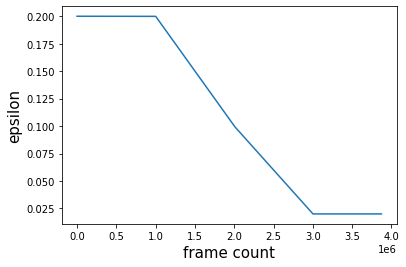

In [ ]:
plt.xlabel('frame count',size=15)
plt.ylabel('epsilon',size=15)
plt.plot(frameCount_History,epsilon_history)

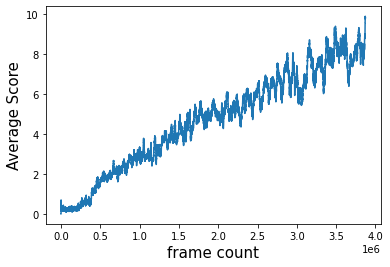

In [ ]:
plt.xlabel('frame count',size=15)
plt.ylabel('Average Score',size=15) 
plt.plot(frameCount_History,running_reward_history)

In [ ]:
model_name = 'breakout_model_2_duel'
path = save_model_dqn(model,model_name)

model = load_model_dqn(path)

INFO:tensorflow:Assets written to: /content/mydrive/MyDrive/breakout_model_2_duel/assets


Lost one life after 638 timesteps
{'ale.lives': 4}


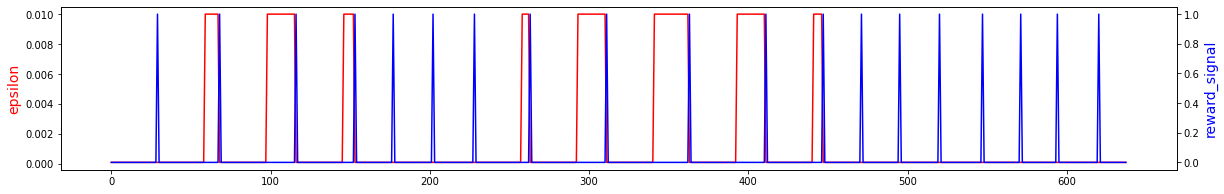

Bricks left to destroy  161.0
Lost one life after 803 timesteps
{'ale.lives': 3}


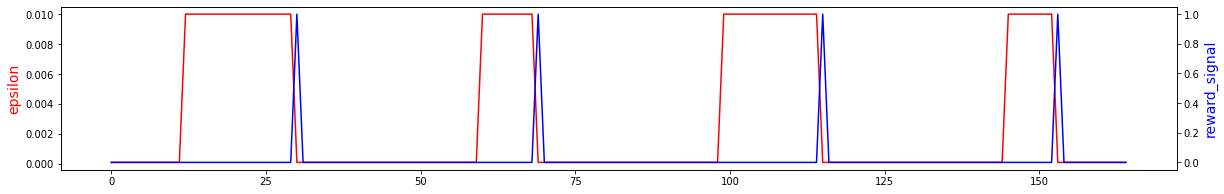

Bricks left to destroy  157.0
Lost one life after 857 timesteps
{'ale.lives': 2}


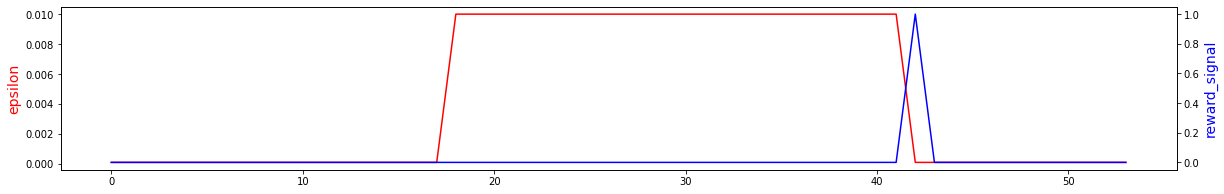

Bricks left to destroy  156.0
Lost one life after 959 timesteps
{'ale.lives': 1}


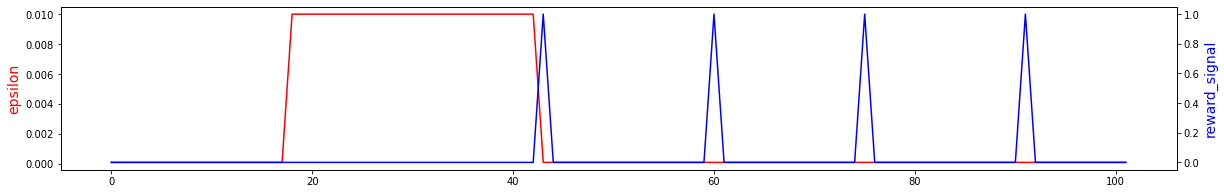

Bricks left to destroy  152.0
Lost one life after 982 timesteps
{'ale.lives': 0}


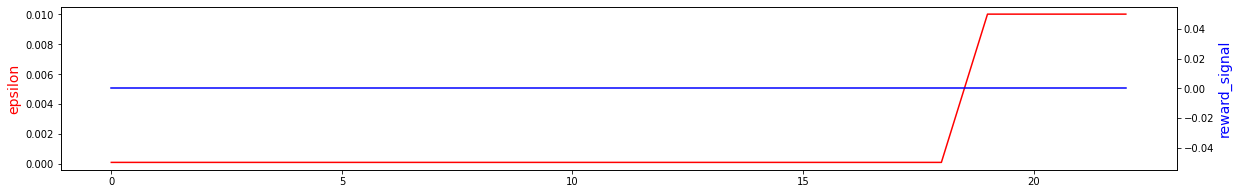

Bricks left to destroy  152.0


In [ ]:
left = record_n_plot(model)

Lost one life after 239 timesteps
{'ale.lives': 4}


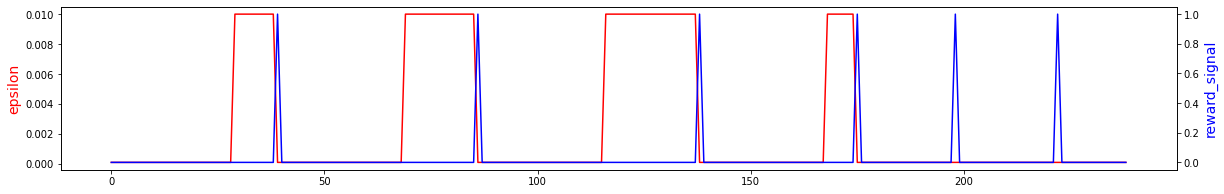

Bricks left to destroy  174.0
Lost one life after 321 timesteps
{'ale.lives': 3}


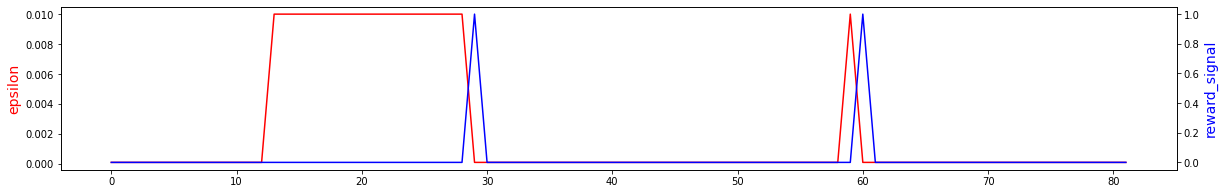

Bricks left to destroy  172.0
Lost one life after 499 timesteps
{'ale.lives': 2}


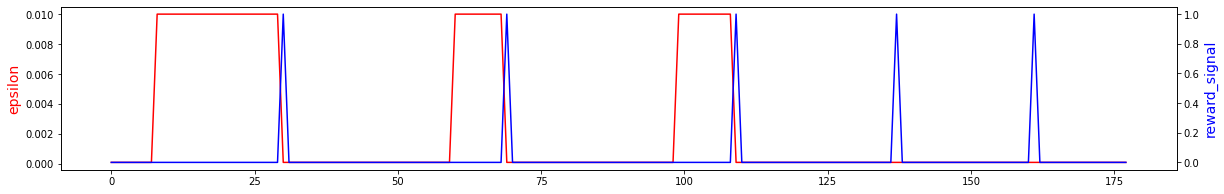

Bricks left to destroy  167.0
Lost one life after 839 timesteps
{'ale.lives': 1}


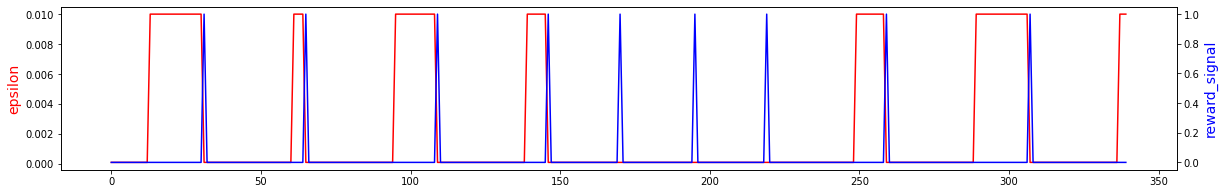

Bricks left to destroy  158.0
Lost one life after 934 timesteps
{'ale.lives': 0}


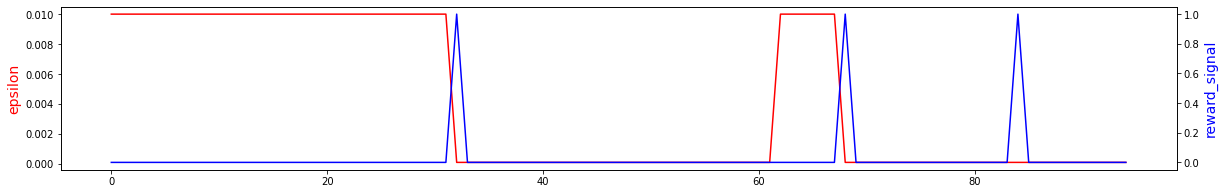

Bricks left to destroy  155.0
Lost one life after 339 timesteps
{'ale.lives': 4}


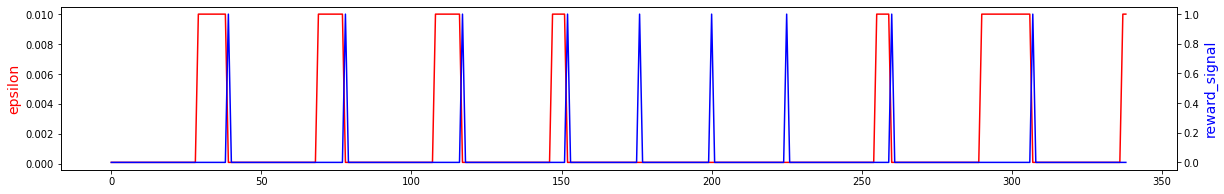

Bricks left to destroy  171.0
Lost one life after 440 timesteps
{'ale.lives': 3}


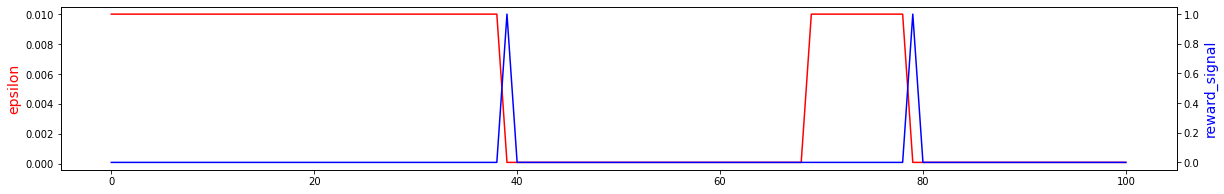

Bricks left to destroy  169.0
Lost one life after 878 timesteps
{'ale.lives': 2}


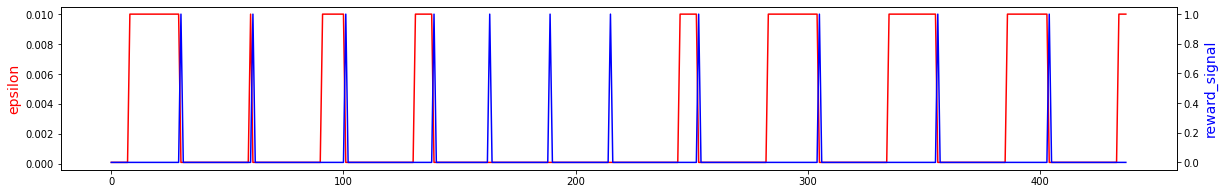

Bricks left to destroy  158.0
Lost one life after 1506 timesteps
{'ale.lives': 1}


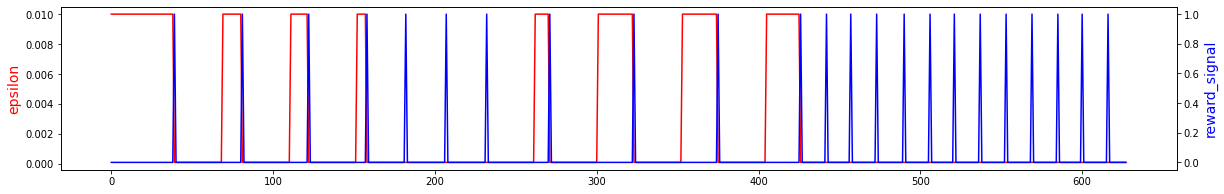

Bricks left to destroy  135.0
Lost one life after 1934 timesteps
{'ale.lives': 0}


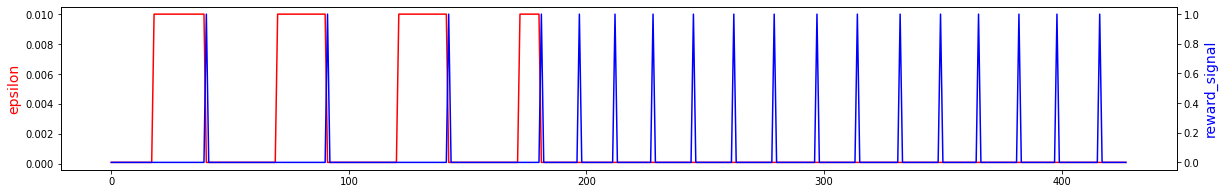

Bricks left to destroy  117.0
Lost one life after 239 timesteps
{'ale.lives': 4}


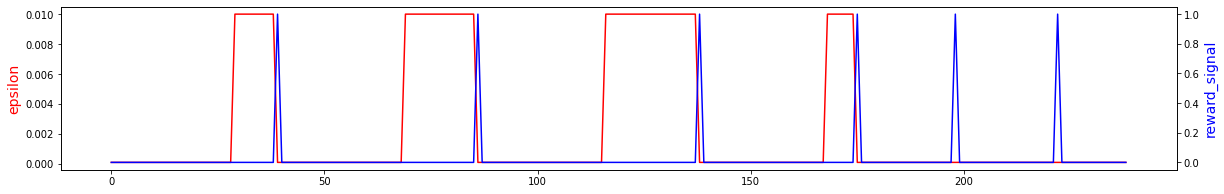

Bricks left to destroy  174.0
Lost one life after 321 timesteps
{'ale.lives': 3}


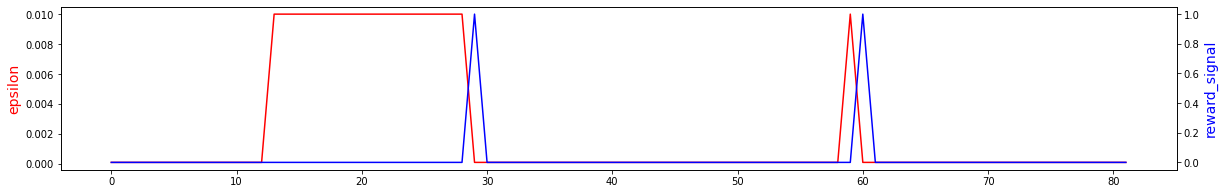

Bricks left to destroy  172.0
Lost one life after 499 timesteps
{'ale.lives': 2}


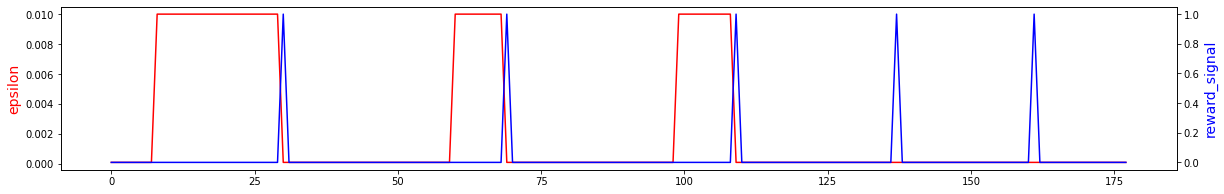

Bricks left to destroy  167.0
Lost one life after 839 timesteps
{'ale.lives': 1}


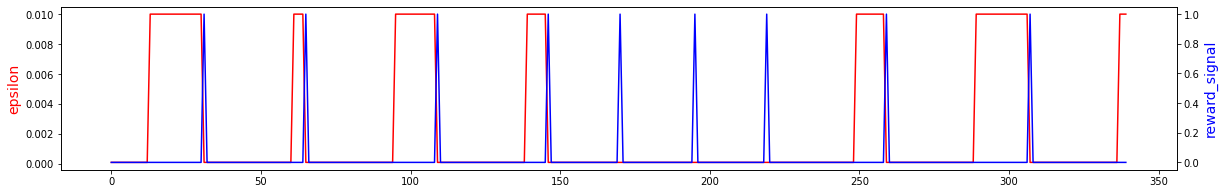

Bricks left to destroy  158.0
Lost one life after 934 timesteps
{'ale.lives': 0}


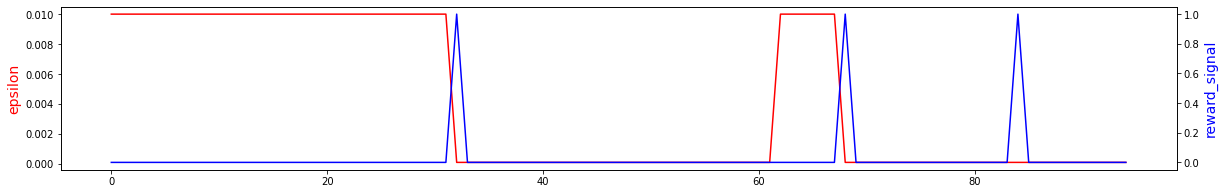

Bricks left to destroy  155.0
Lost one life after 239 timesteps
{'ale.lives': 4}


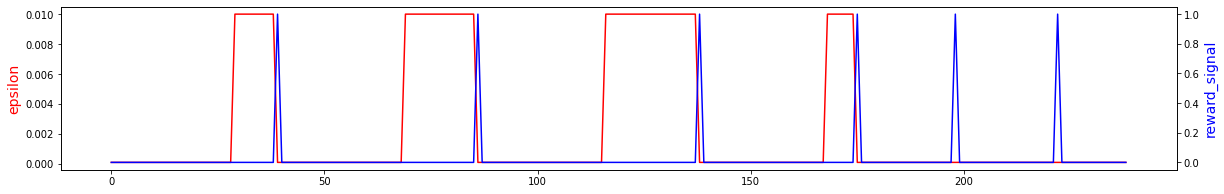

Bricks left to destroy  174.0
Lost one life after 321 timesteps
{'ale.lives': 3}


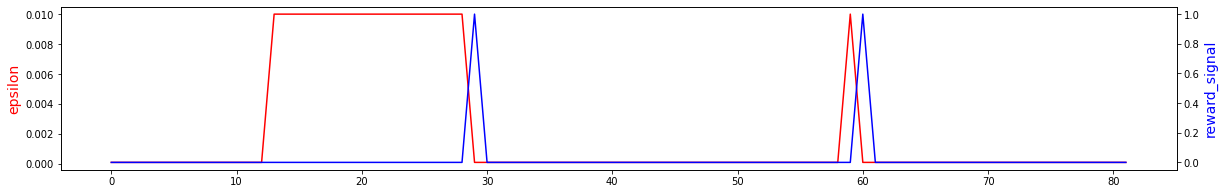

Bricks left to destroy  172.0
Lost one life after 499 timesteps
{'ale.lives': 2}


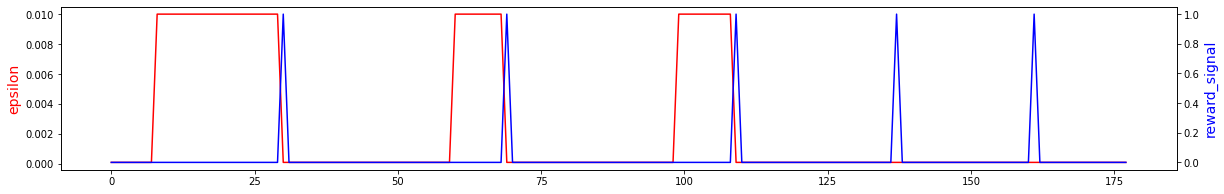

Bricks left to destroy  167.0
Lost one life after 839 timesteps
{'ale.lives': 1}


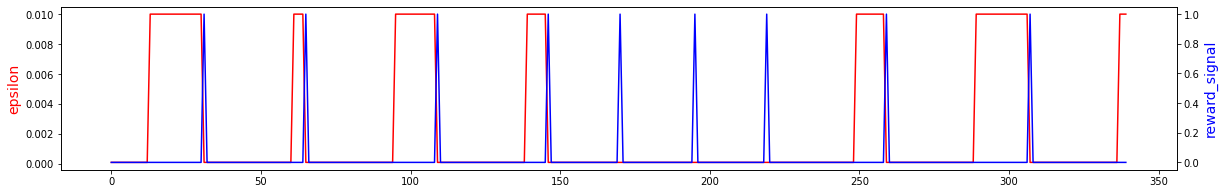

Bricks left to destroy  158.0
Lost one life after 934 timesteps
{'ale.lives': 0}


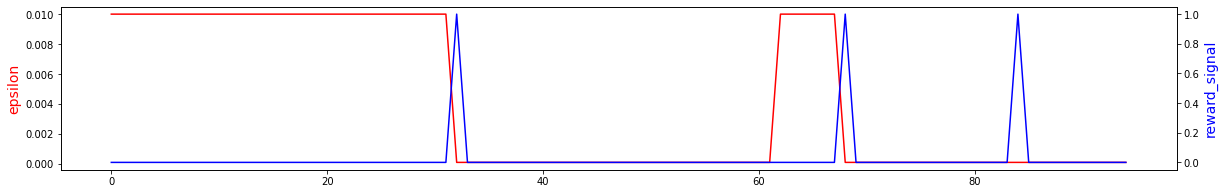

Bricks left to destroy  155.0
Lost one life after 339 timesteps
{'ale.lives': 4}


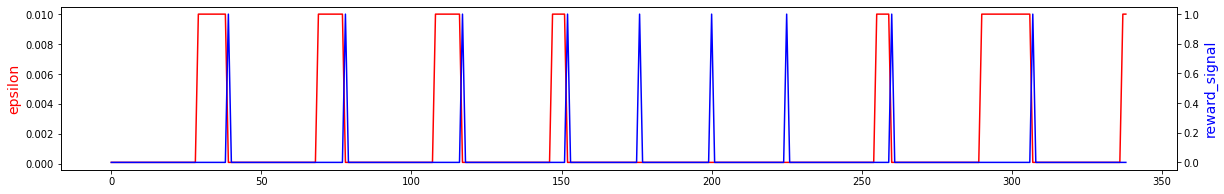

Bricks left to destroy  171.0
Lost one life after 440 timesteps
{'ale.lives': 3}


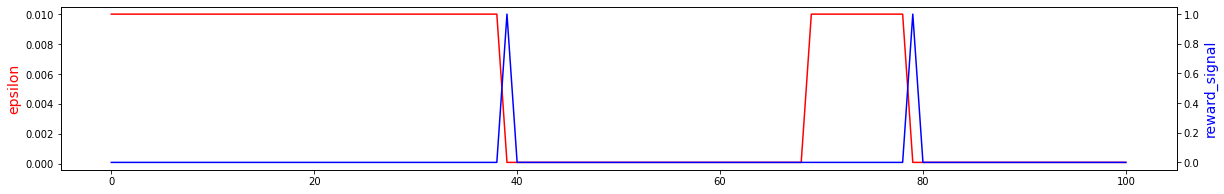

Bricks left to destroy  169.0
Lost one life after 878 timesteps
{'ale.lives': 2}


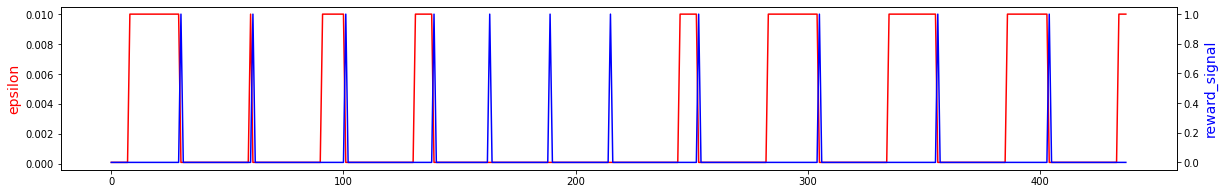

Bricks left to destroy  158.0
Lost one life after 1506 timesteps
{'ale.lives': 1}


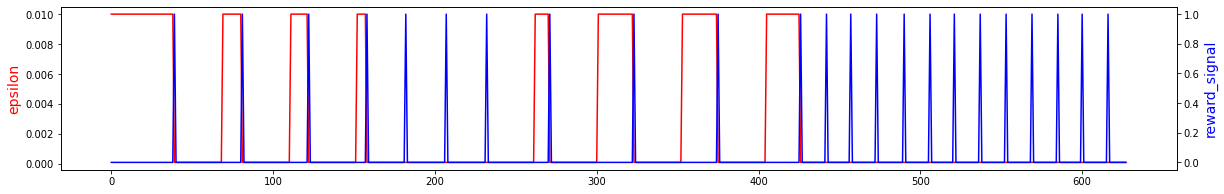

Bricks left to destroy  135.0
Lost one life after 1934 timesteps
{'ale.lives': 0}


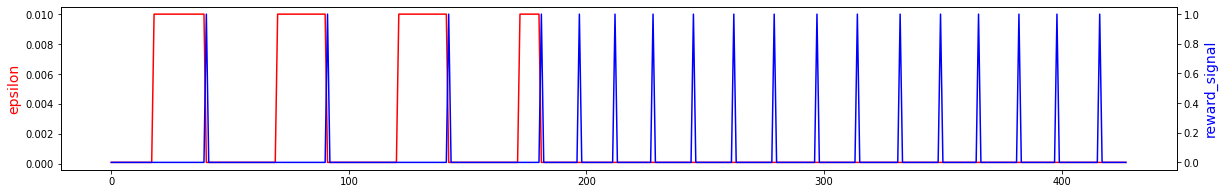

Bricks left to destroy  117.0
Lost one life after 51 timesteps
{'ale.lives': 4}


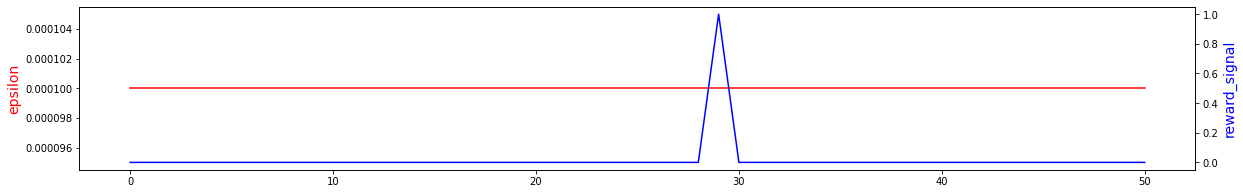

Bricks left to destroy  179.0
Lost one life after 730 timesteps
{'ale.lives': 3}


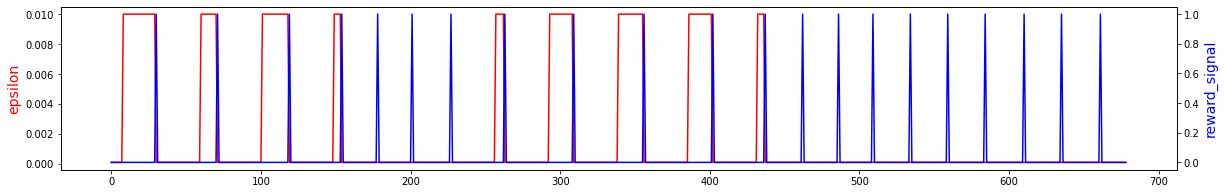

Bricks left to destroy  158.0
Lost one life after 1018 timesteps
{'ale.lives': 2}


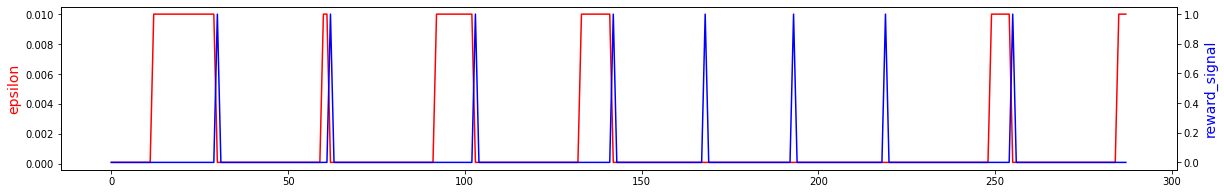

Bricks left to destroy  150.0
Lost one life after 1268 timesteps
{'ale.lives': 1}


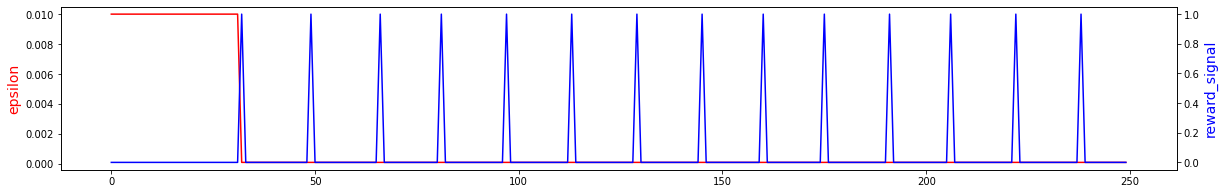

Bricks left to destroy  136.0
Lost one life after 1330 timesteps
{'ale.lives': 0}


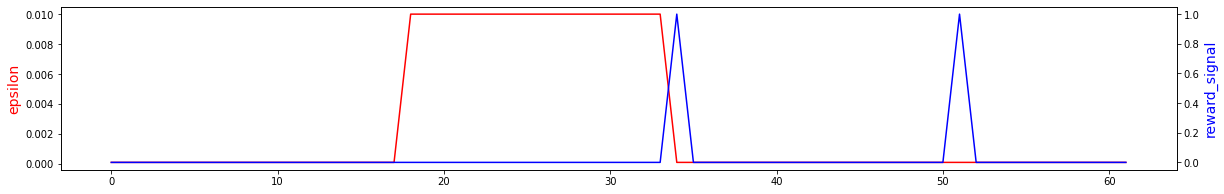

Bricks left to destroy  134.0
Lost one life after 638 timesteps
{'ale.lives': 4}


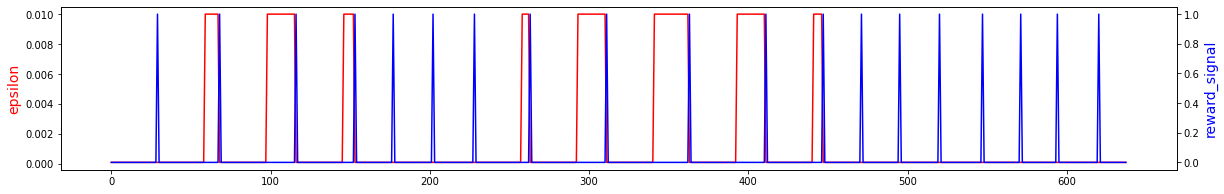

Bricks left to destroy  161.0
Lost one life after 803 timesteps
{'ale.lives': 3}


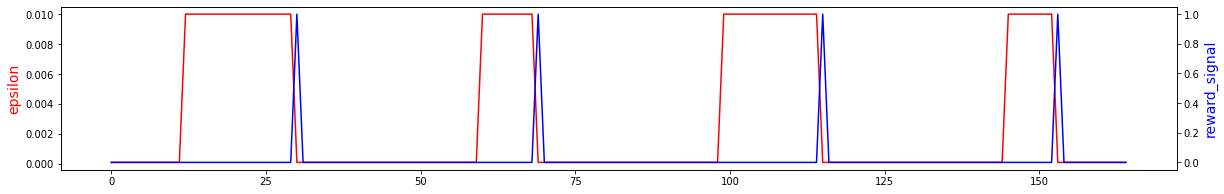

Bricks left to destroy  157.0
Lost one life after 857 timesteps
{'ale.lives': 2}


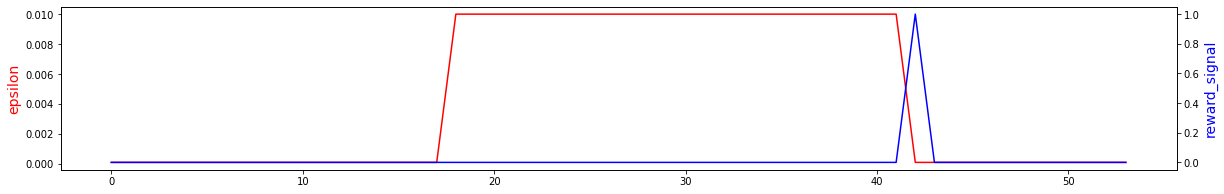

Bricks left to destroy  156.0
Lost one life after 959 timesteps
{'ale.lives': 1}


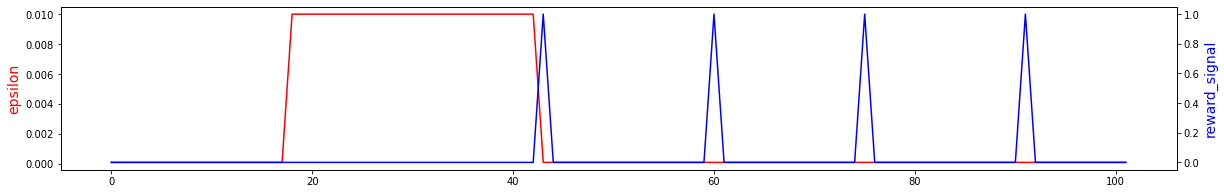

Bricks left to destroy  152.0
Lost one life after 982 timesteps
{'ale.lives': 0}


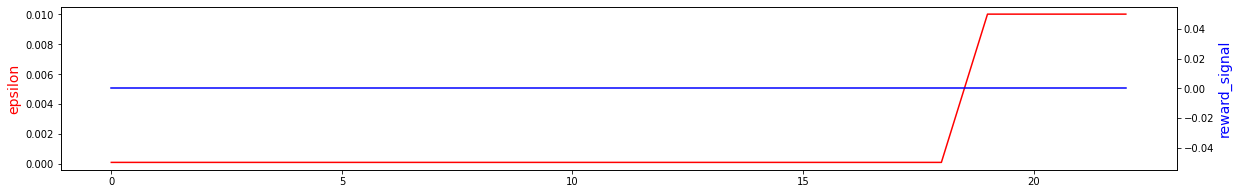

Bricks left to destroy  152.0
Lost one life after 51 timesteps
{'ale.lives': 4}


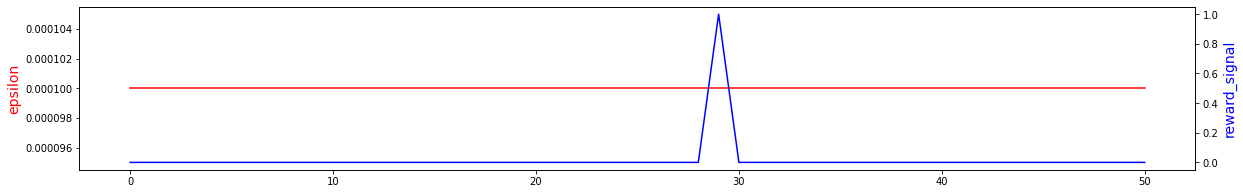

Bricks left to destroy  179.0
Lost one life after 730 timesteps
{'ale.lives': 3}


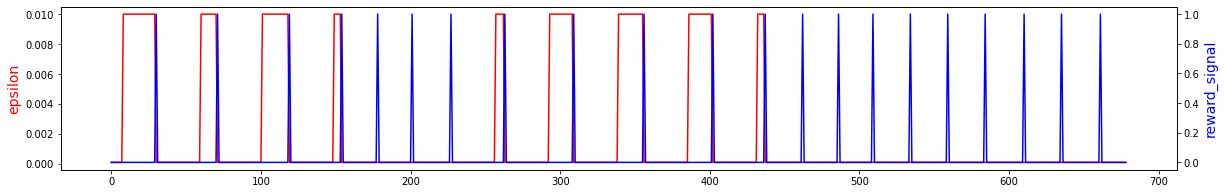

Bricks left to destroy  158.0
Lost one life after 1018 timesteps
{'ale.lives': 2}


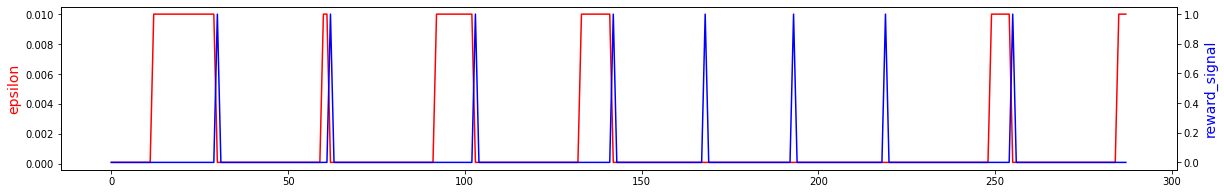

Bricks left to destroy  150.0
Lost one life after 1268 timesteps
{'ale.lives': 1}


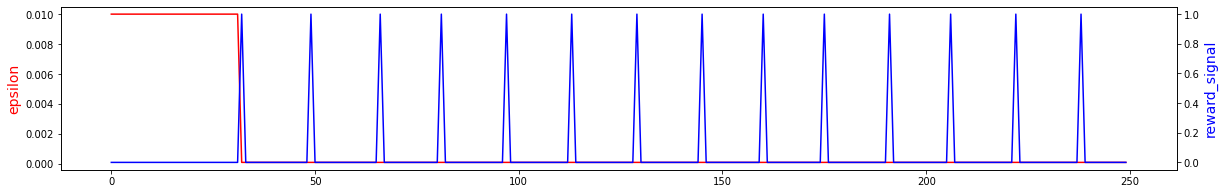

Bricks left to destroy  136.0
Lost one life after 1330 timesteps
{'ale.lives': 0}


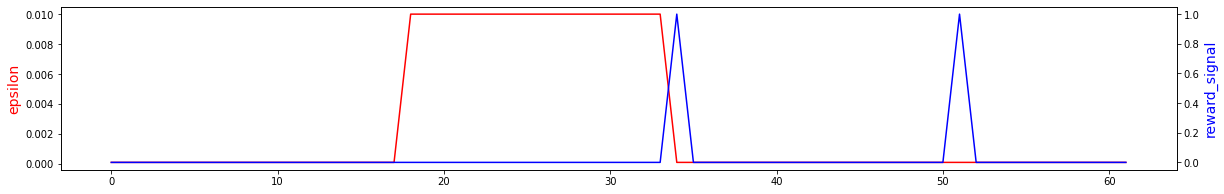

Bricks left to destroy  134.0
Lost one life after 239 timesteps
{'ale.lives': 4}


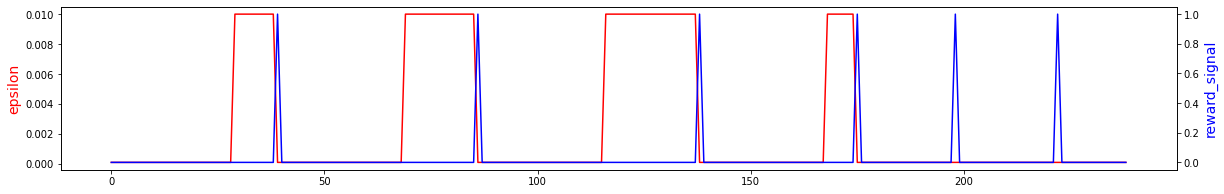

Bricks left to destroy  174.0
Lost one life after 321 timesteps
{'ale.lives': 3}


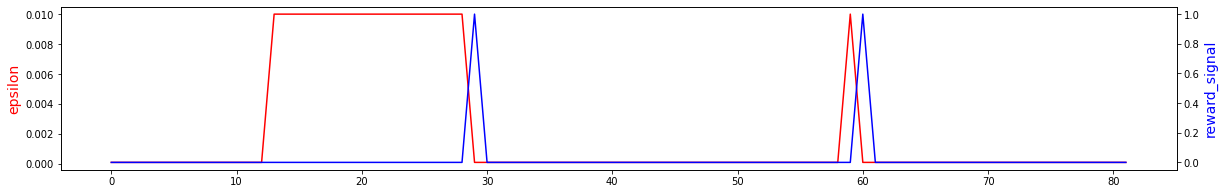

Bricks left to destroy  172.0
Lost one life after 499 timesteps
{'ale.lives': 2}


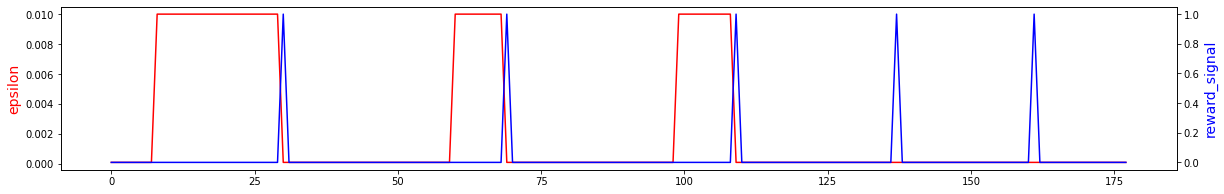

Bricks left to destroy  167.0
Lost one life after 839 timesteps
{'ale.lives': 1}


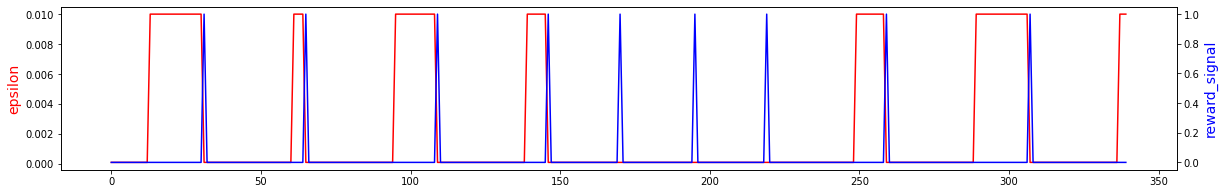

Bricks left to destroy  158.0
Lost one life after 934 timesteps
{'ale.lives': 0}


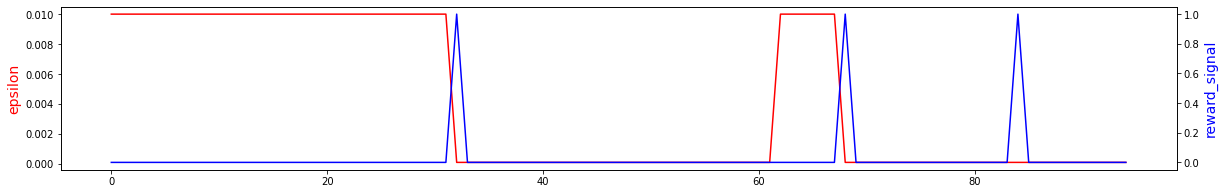

Bricks left to destroy  155.0
Lost one life after 239 timesteps
{'ale.lives': 4}


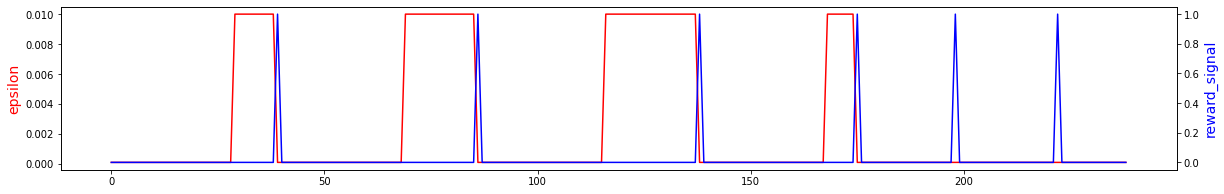

Bricks left to destroy  174.0
Lost one life after 321 timesteps
{'ale.lives': 3}


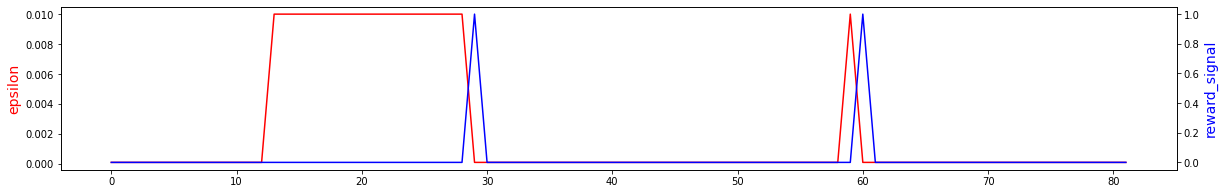

Bricks left to destroy  172.0
Lost one life after 499 timesteps
{'ale.lives': 2}


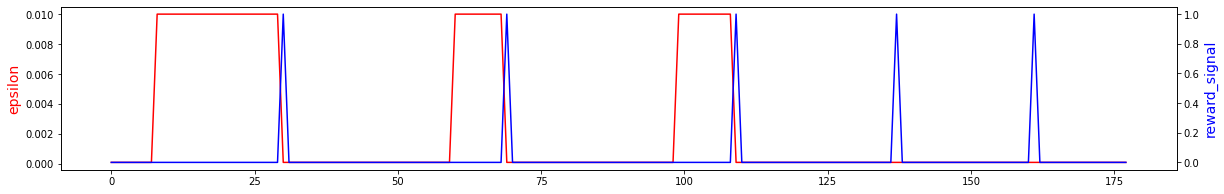

Bricks left to destroy  167.0
Lost one life after 839 timesteps
{'ale.lives': 1}


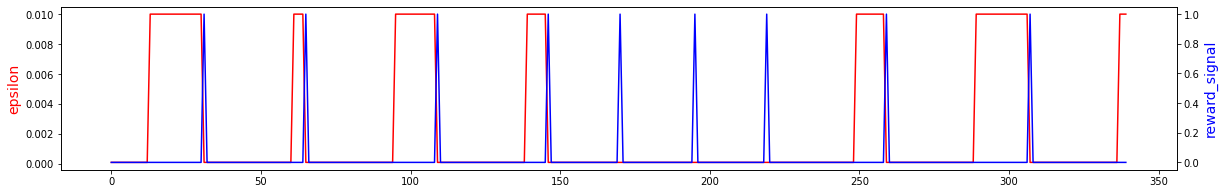

Bricks left to destroy  158.0
Lost one life after 934 timesteps
{'ale.lives': 0}


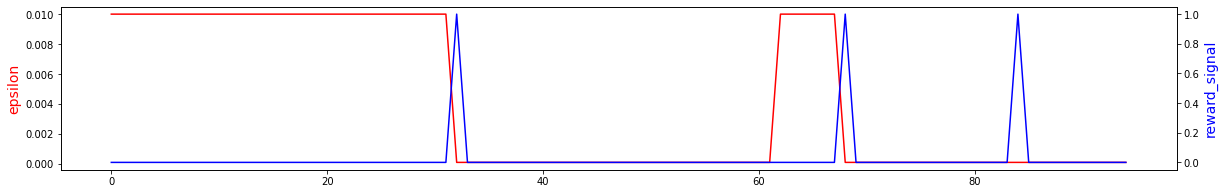

Bricks left to destroy  155.0
Lost one life after 339 timesteps
{'ale.lives': 4}


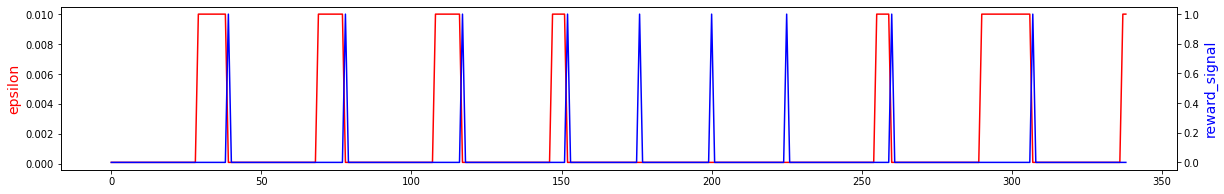

Bricks left to destroy  171.0
Lost one life after 440 timesteps
{'ale.lives': 3}


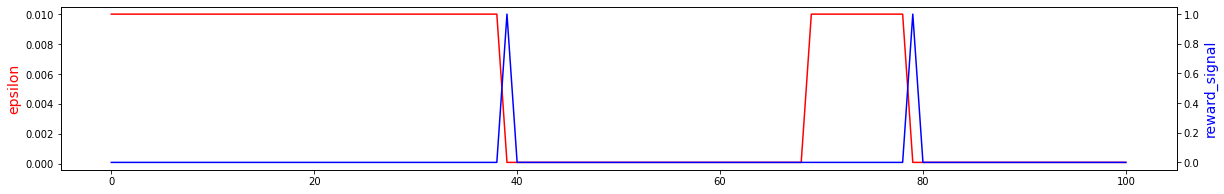

Bricks left to destroy  169.0
Lost one life after 878 timesteps
{'ale.lives': 2}


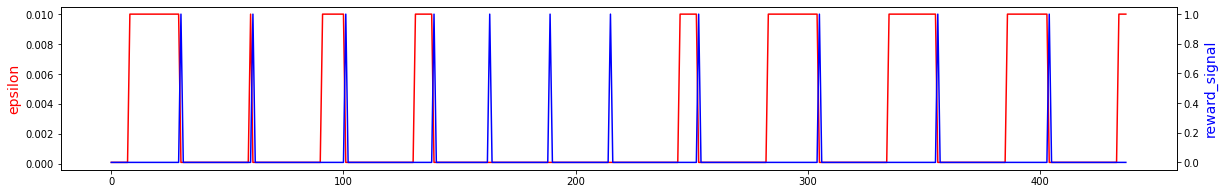

Bricks left to destroy  158.0
Lost one life after 1506 timesteps
{'ale.lives': 1}


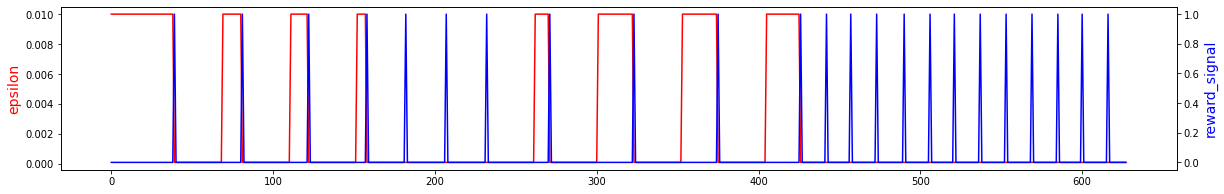

Bricks left to destroy  135.0
Lost one life after 1934 timesteps
{'ale.lives': 0}


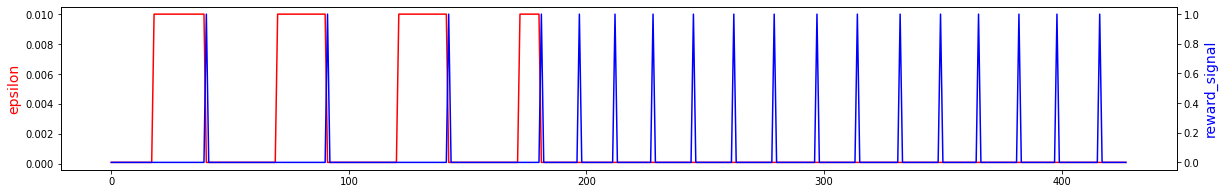

Bricks left to destroy  117.0
Lost one life after 441 timesteps
{'ale.lives': 4}


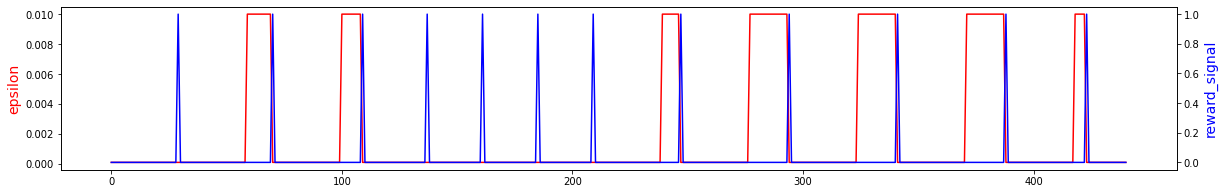

Bricks left to destroy  168.0
Lost one life after 1012 timesteps
{'ale.lives': 3}


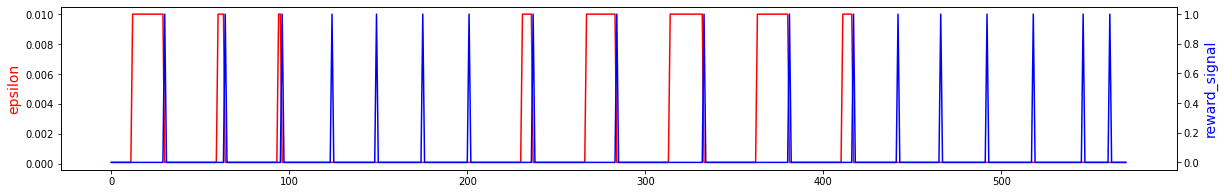

Bricks left to destroy  150.0
Lost one life after 1587 timesteps
{'ale.lives': 2}


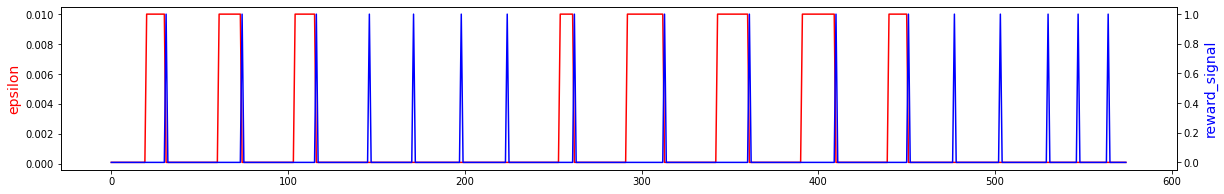

Bricks left to destroy  133.0
Lost one life after 1700 timesteps
{'ale.lives': 1}


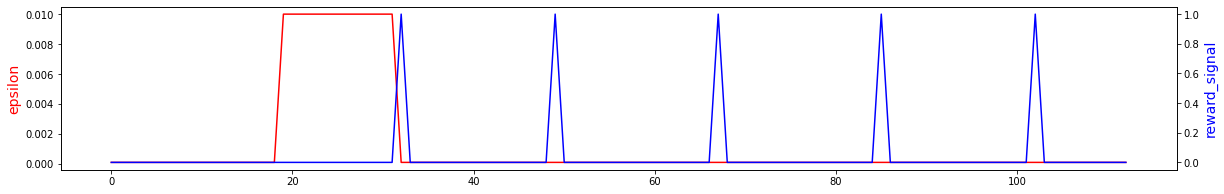

Bricks left to destroy  128.0
Lost one life after 1926 timesteps
{'ale.lives': 0}


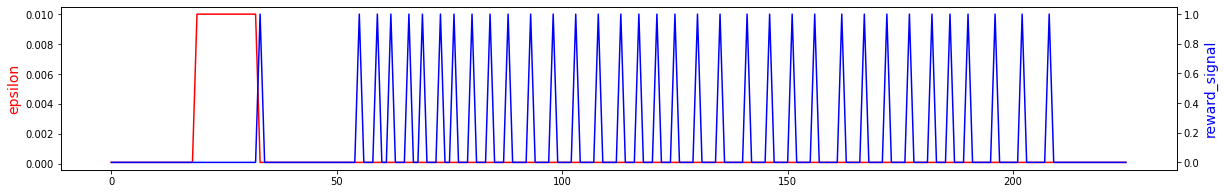

Bricks left to destroy  93.0
Lost one life after 239 timesteps
{'ale.lives': 4}


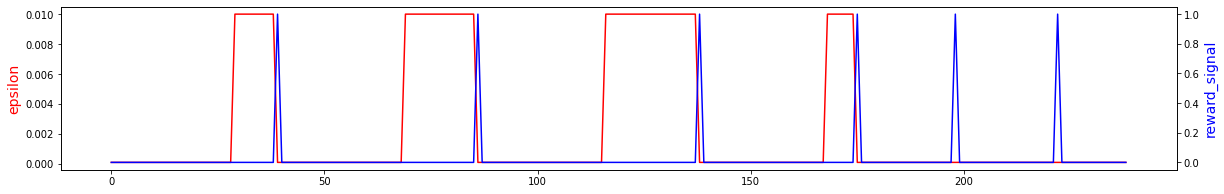

Bricks left to destroy  174.0
Lost one life after 321 timesteps
{'ale.lives': 3}


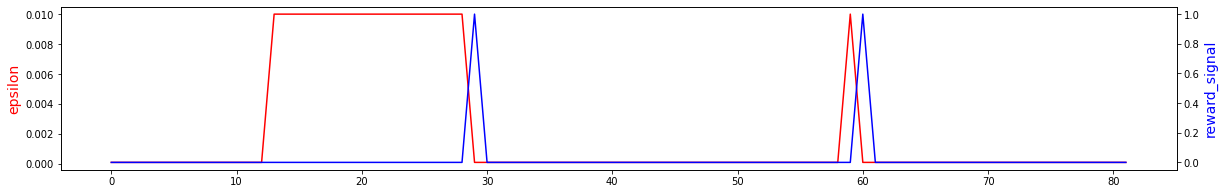

Bricks left to destroy  172.0
Lost one life after 499 timesteps
{'ale.lives': 2}


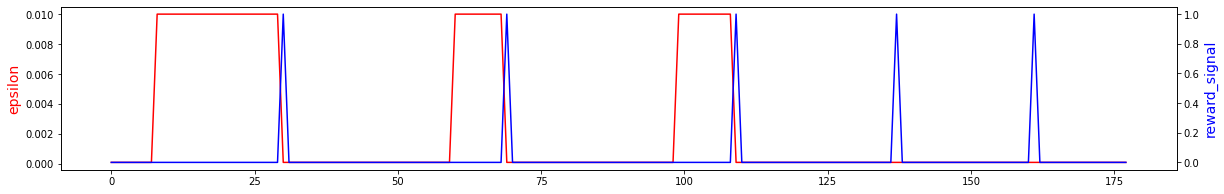

Bricks left to destroy  167.0
Lost one life after 839 timesteps
{'ale.lives': 1}


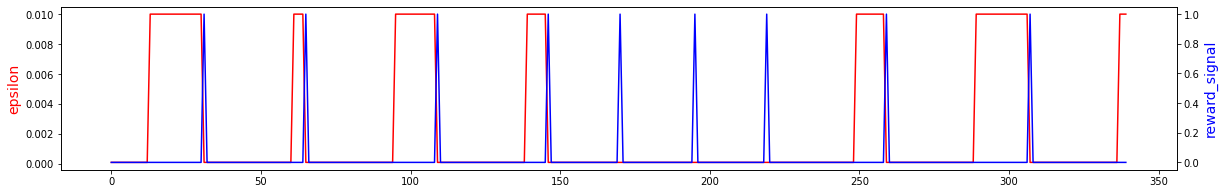

Bricks left to destroy  158.0
Lost one life after 934 timesteps
{'ale.lives': 0}


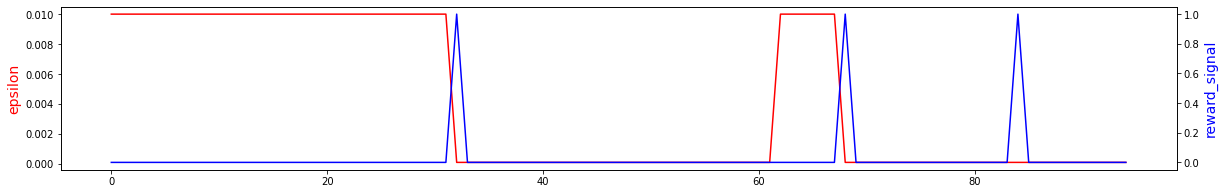

Bricks left to destroy  155.0
Lost one life after 339 timesteps
{'ale.lives': 4}


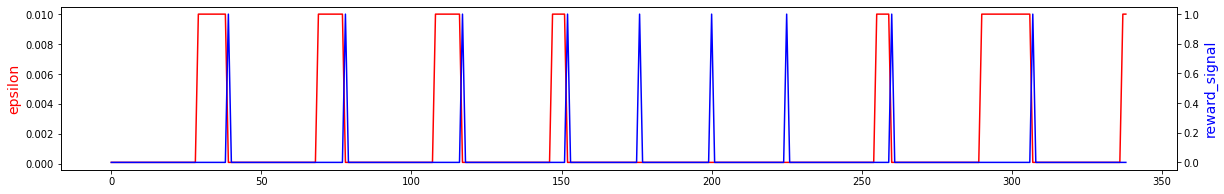

Bricks left to destroy  171.0
Lost one life after 440 timesteps
{'ale.lives': 3}


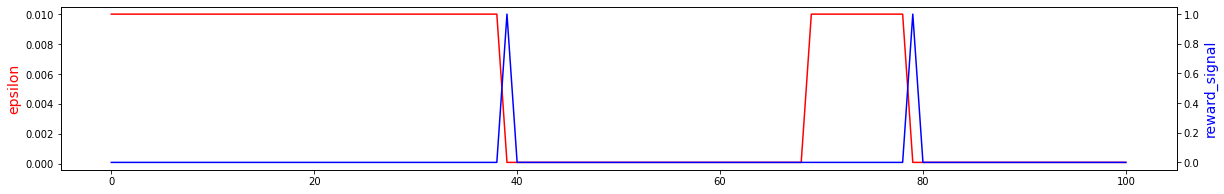

Bricks left to destroy  169.0
Lost one life after 878 timesteps
{'ale.lives': 2}


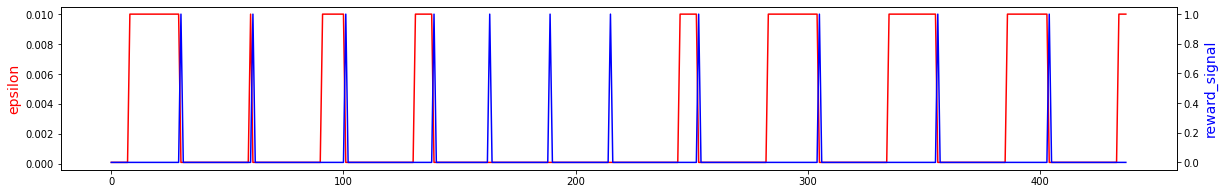

Bricks left to destroy  158.0
Lost one life after 1506 timesteps
{'ale.lives': 1}


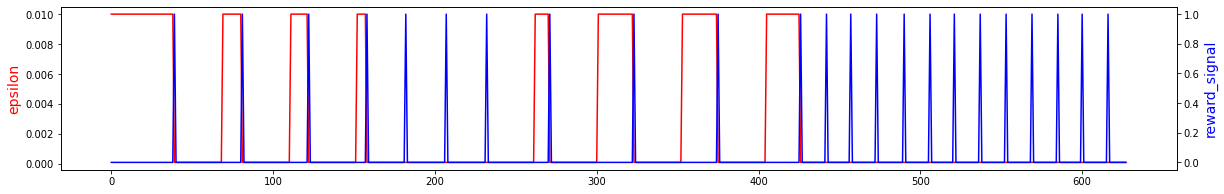

Bricks left to destroy  135.0
Lost one life after 1934 timesteps
{'ale.lives': 0}


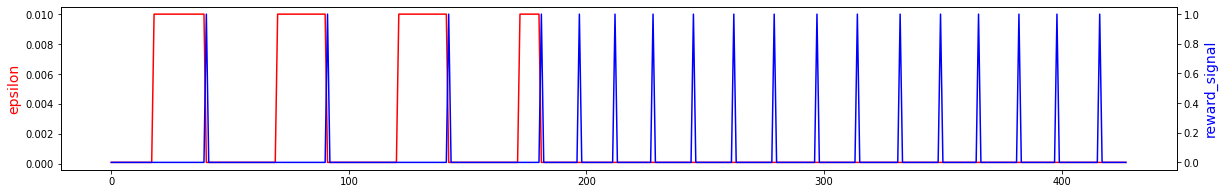

Bricks left to destroy  117.0
Lost one life after 441 timesteps
{'ale.lives': 4}


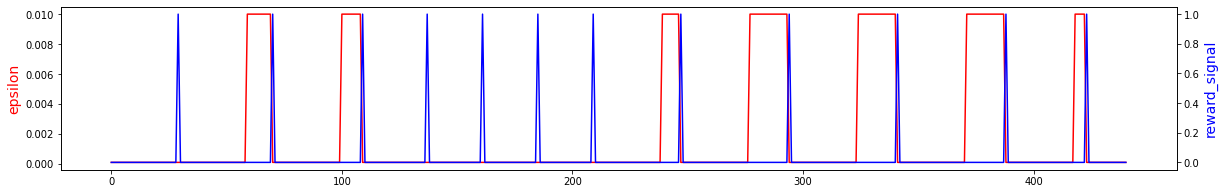

Bricks left to destroy  168.0
Lost one life after 1012 timesteps
{'ale.lives': 3}


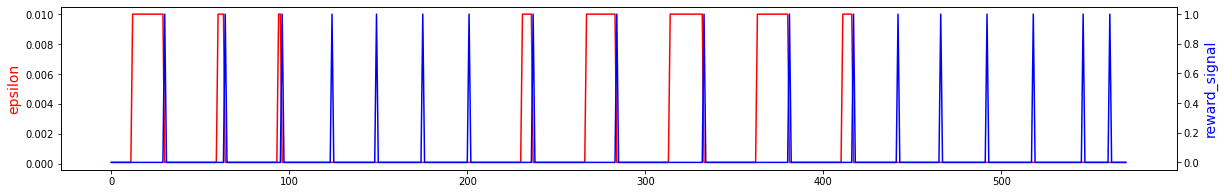

Bricks left to destroy  150.0
Lost one life after 1587 timesteps
{'ale.lives': 2}


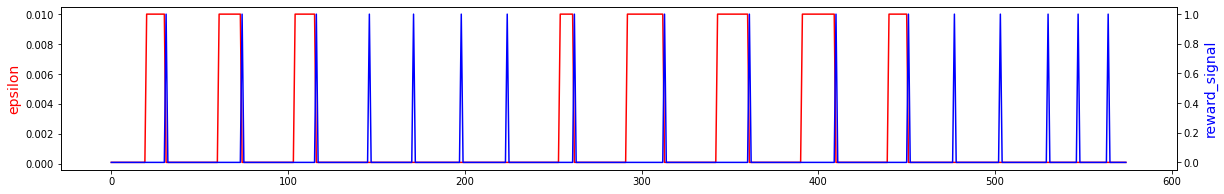

Bricks left to destroy  133.0
Lost one life after 1700 timesteps
{'ale.lives': 1}


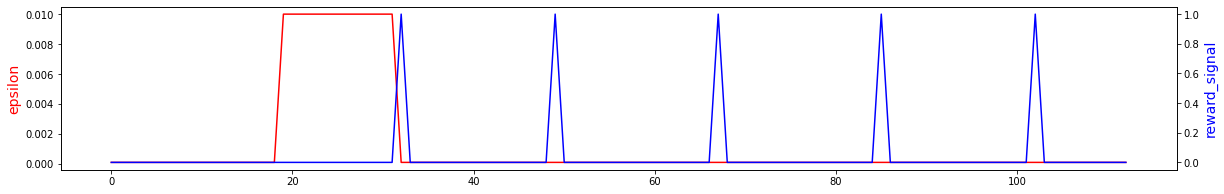

Bricks left to destroy  128.0
Lost one life after 1926 timesteps
{'ale.lives': 0}


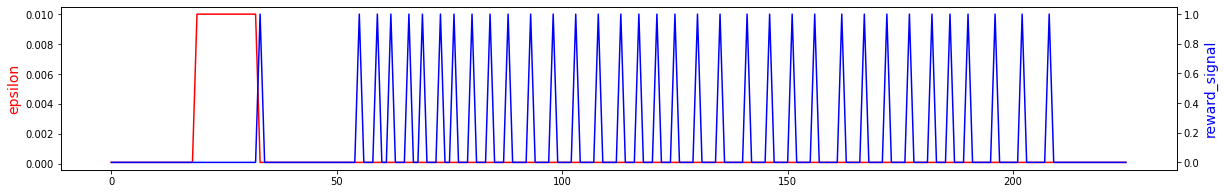

Bricks left to destroy  93.0
Lost one life after 339 timesteps
{'ale.lives': 4}


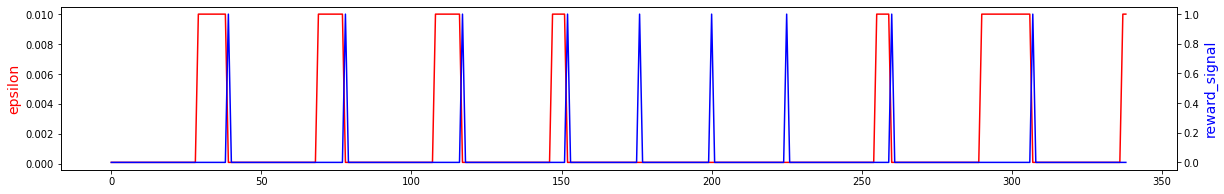

Bricks left to destroy  171.0
Lost one life after 440 timesteps
{'ale.lives': 3}


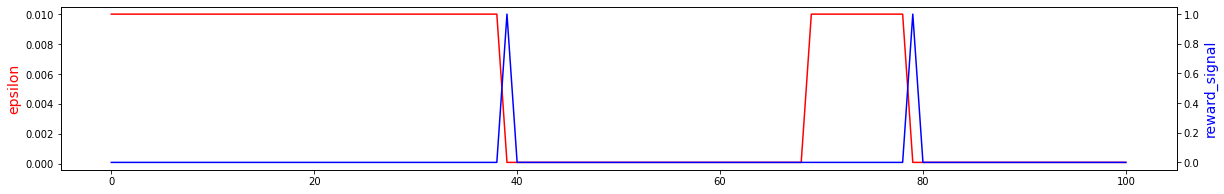

Bricks left to destroy  169.0
Lost one life after 878 timesteps
{'ale.lives': 2}


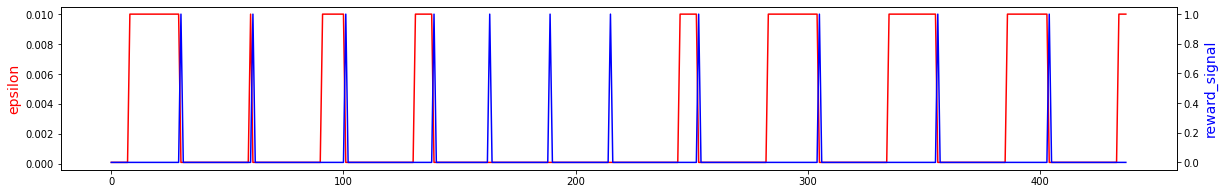

Bricks left to destroy  158.0
Lost one life after 1506 timesteps
{'ale.lives': 1}


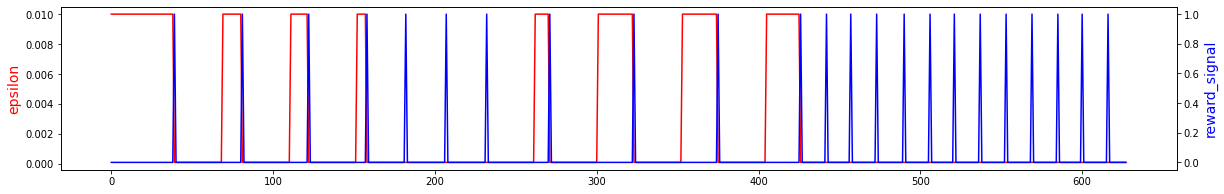

Bricks left to destroy  135.0
Lost one life after 1934 timesteps
{'ale.lives': 0}


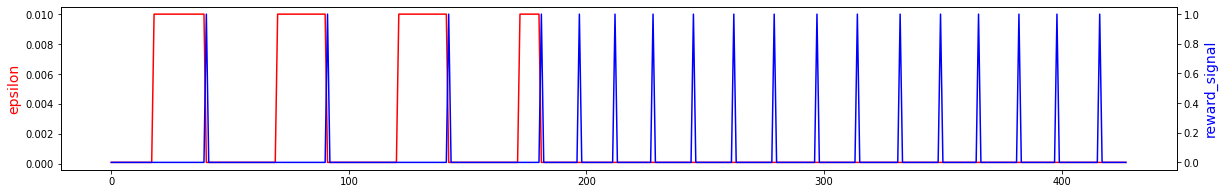

Bricks left to destroy  117.0
Lost one life after 339 timesteps
{'ale.lives': 4}


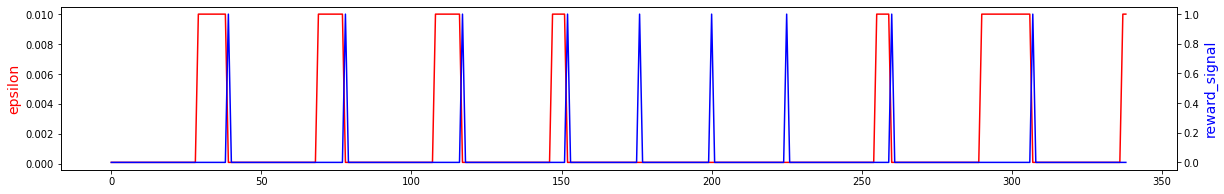

Bricks left to destroy  171.0
Lost one life after 440 timesteps
{'ale.lives': 3}


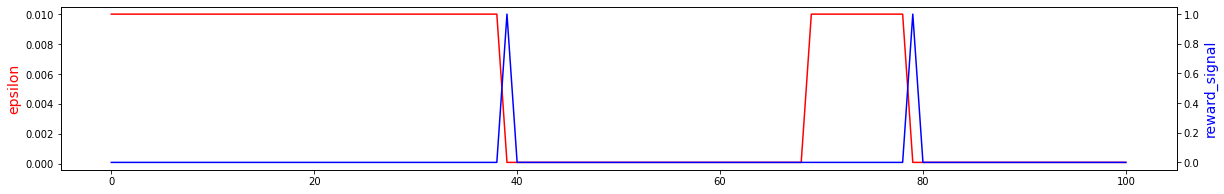

Bricks left to destroy  169.0
Lost one life after 594 timesteps
{'ale.lives': 2}


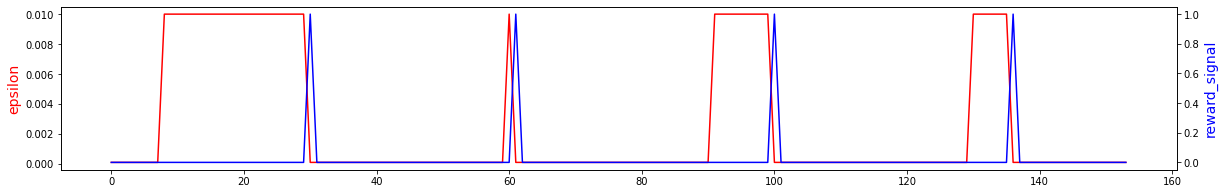

Bricks left to destroy  165.0
Lost one life after 752 timesteps
{'ale.lives': 1}


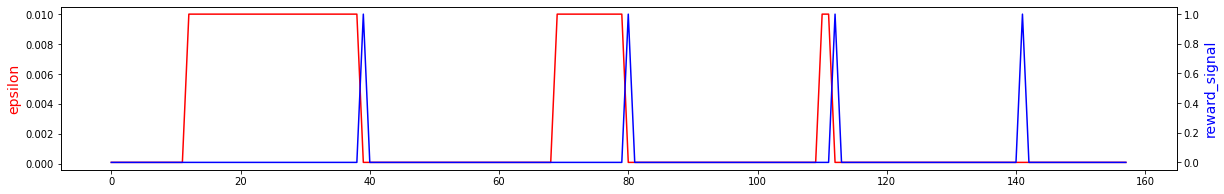

Bricks left to destroy  161.0
Lost one life after 1586 timesteps
{'ale.lives': 0}


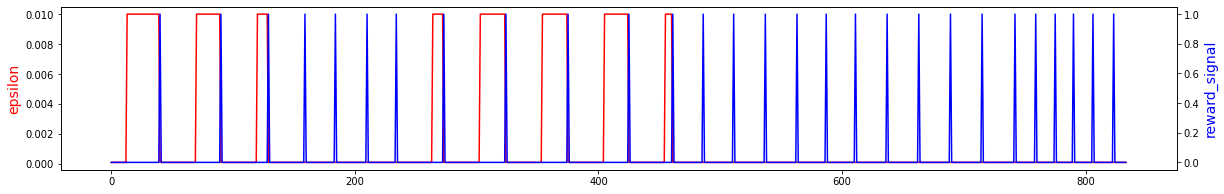

Bricks left to destroy  133.0
Lost one life after 339 timesteps
{'ale.lives': 4}


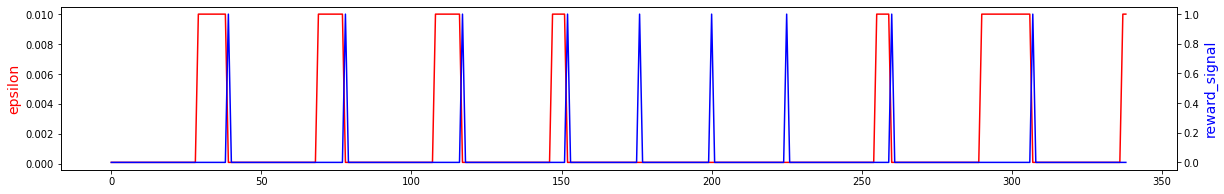

Bricks left to destroy  171.0
Lost one life after 440 timesteps
{'ale.lives': 3}


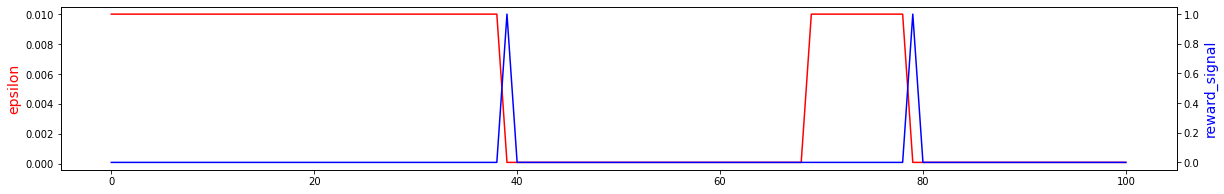

Bricks left to destroy  169.0
Lost one life after 878 timesteps
{'ale.lives': 2}


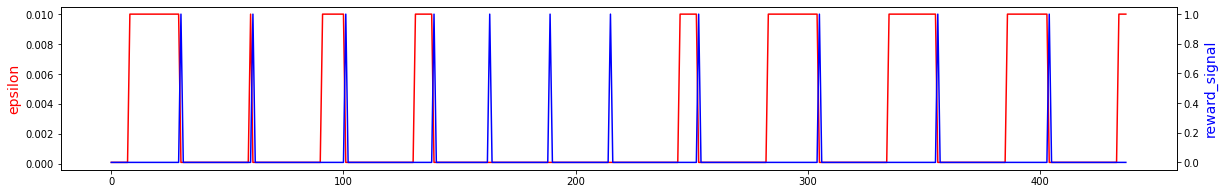

Bricks left to destroy  158.0
Lost one life after 1506 timesteps
{'ale.lives': 1}


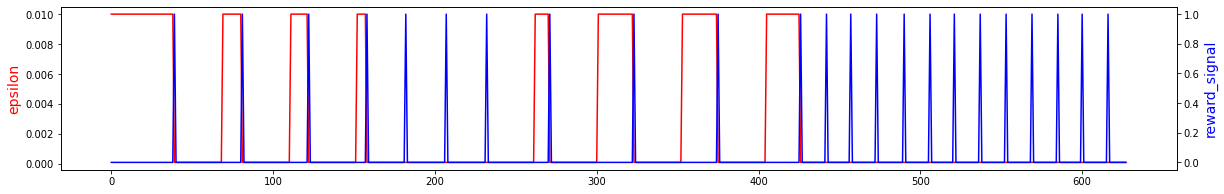

Bricks left to destroy  135.0
Lost one life after 1934 timesteps
{'ale.lives': 0}


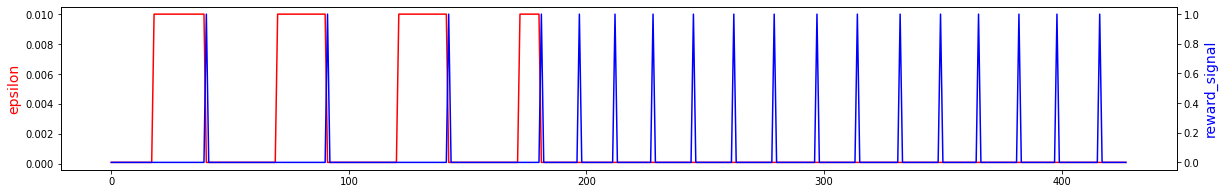

Bricks left to destroy  117.0
Lost one life after 239 timesteps
{'ale.lives': 4}


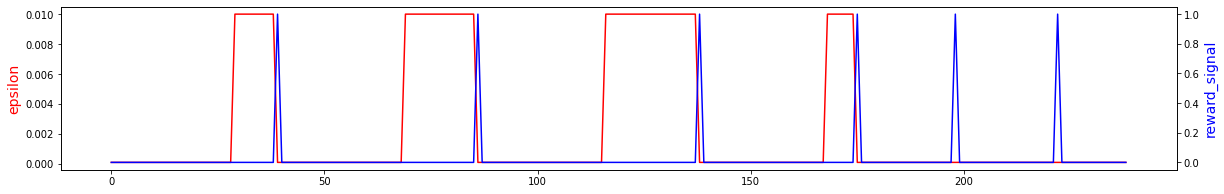

Bricks left to destroy  174.0
Lost one life after 321 timesteps
{'ale.lives': 3}


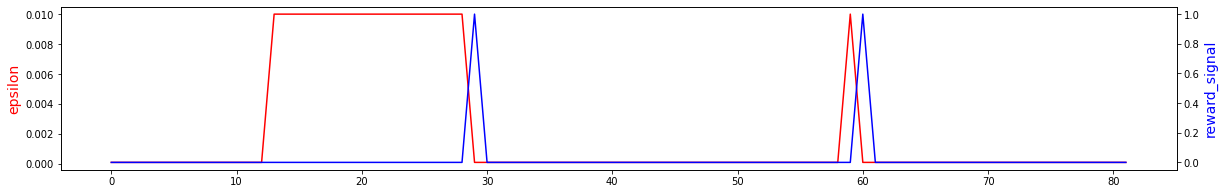

Bricks left to destroy  172.0
Lost one life after 499 timesteps
{'ale.lives': 2}


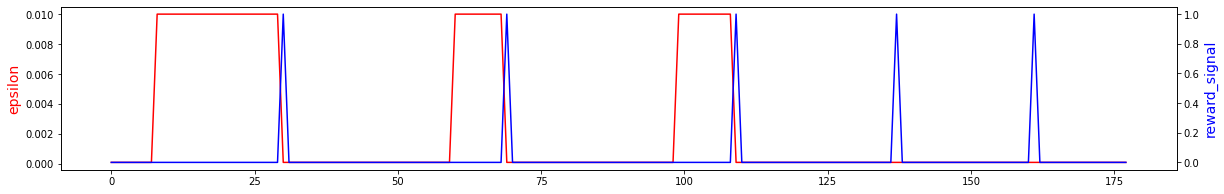

Bricks left to destroy  167.0
Lost one life after 839 timesteps
{'ale.lives': 1}


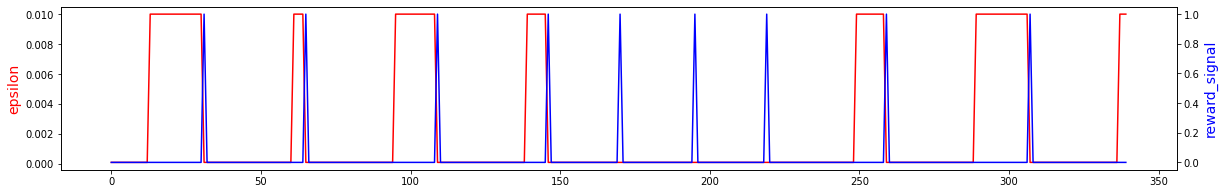

Bricks left to destroy  158.0
Lost one life after 934 timesteps
{'ale.lives': 0}


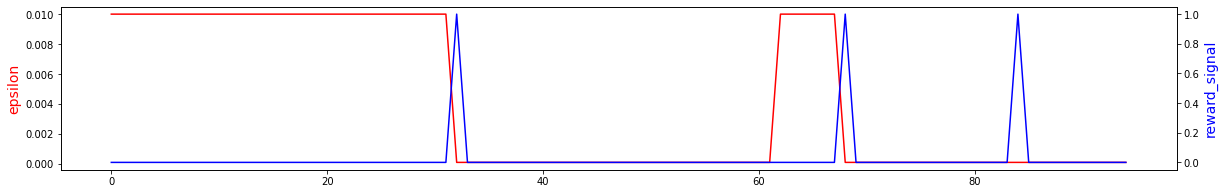

Bricks left to destroy  155.0
Lost one life after 339 timesteps
{'ale.lives': 4}


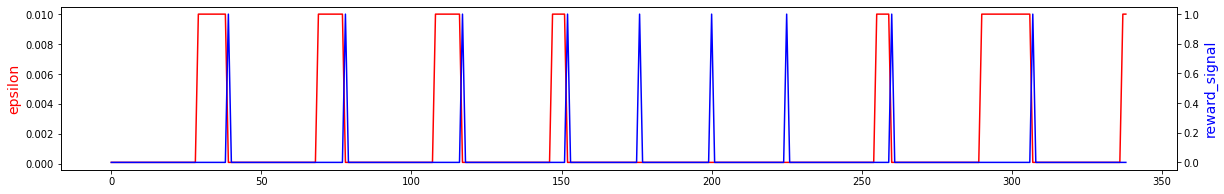

Bricks left to destroy  171.0
Lost one life after 440 timesteps
{'ale.lives': 3}


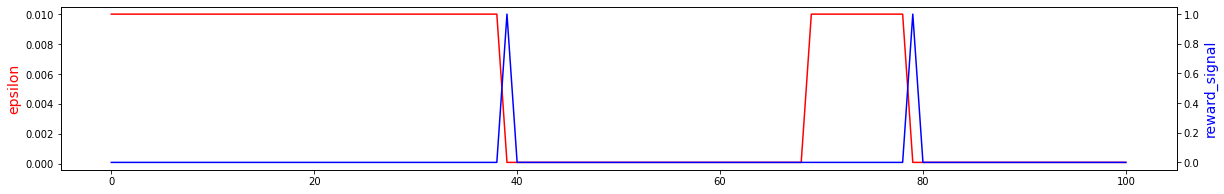

Bricks left to destroy  169.0
Lost one life after 878 timesteps
{'ale.lives': 2}


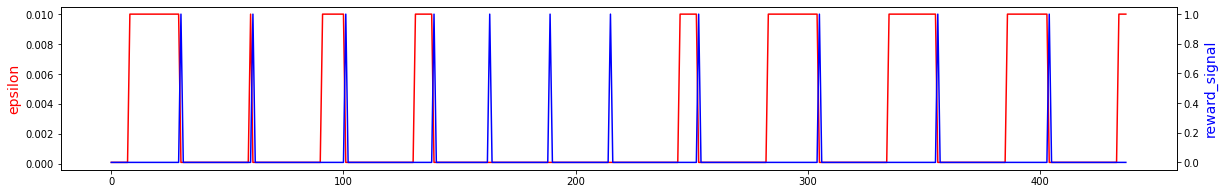

Bricks left to destroy  158.0
Lost one life after 1506 timesteps
{'ale.lives': 1}


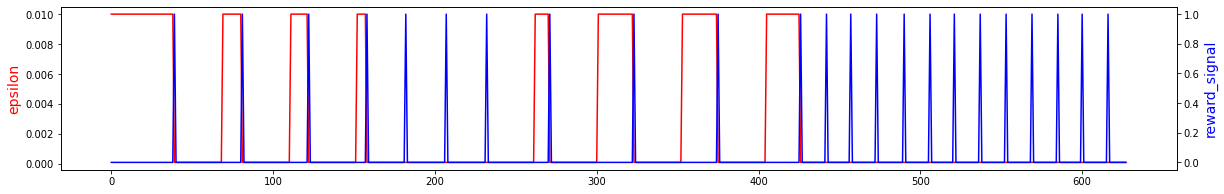

Bricks left to destroy  135.0
Lost one life after 1934 timesteps
{'ale.lives': 0}


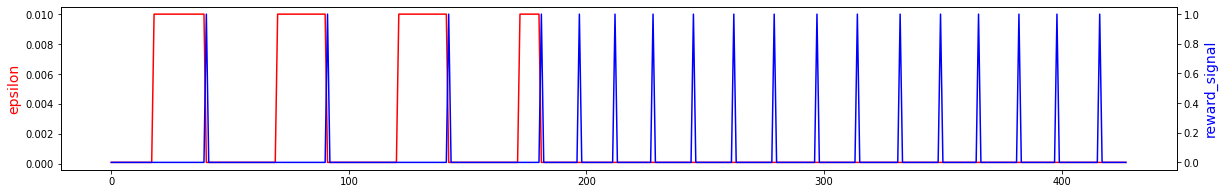

Bricks left to destroy  117.0


In [ ]:
#Playing the game 20 times to record the average rewards
average_rewards_count = []

for i in range(20):
  average_rewards_count.append(record_n_plot(model))

In [ ]:
brick_left = average_rewards_count
for i in range(len(brick_left)):
  print(f"Average Score at Game{i+1} : {(180-brick_left[i])/5}") ###(Total 180 bricks - Bricks left after 5 episodes or Rewards gain) / 5 = Average Reward for the game

Average Score at Game1 : 5.0
Average Score at Game2 : 12.6
Average Score at Game3 : 5.0
Average Score at Game4 : 5.0
Average Score at Game5 : 12.6
Average Score at Game6 : 9.2
Average Score at Game7 : 5.6
Average Score at Game8 : 9.2
Average Score at Game9 : 5.0
Average Score at Game10 : 5.0
Average Score at Game11 : 12.6
Average Score at Game12 : 17.4
Average Score at Game13 : 5.0
Average Score at Game14 : 12.6
Average Score at Game15 : 17.4
Average Score at Game16 : 12.6
Average Score at Game17 : 9.4
Average Score at Game18 : 12.6
Average Score at Game19 : 5.0
Average Score at Game20 : 12.6


In [ ]:
#!zip -r /content/sample_data_duel.zip /content/mydrive/MyDrive

  adding: content/mydrive/MyDrive/ (stored 0%)
  adding: content/mydrive/MyDrive/breakout_model_2_duel/ (stored 0%)
  adding: content/mydrive/MyDrive/breakout_model_2_duel/keras_metadata.pb (deflated 92%)
  adding: content/mydrive/MyDrive/breakout_model_2_duel/assets/ (stored 0%)
  adding: content/mydrive/MyDrive/breakout_model_2_duel/saved_model.pb (deflated 90%)
  adding: content/mydrive/MyDrive/breakout_model_2_duel/variables/ (stored 0%)
  adding: content/mydrive/MyDrive/breakout_model_2_duel/variables/variables.index (deflated 57%)
  adding: content/mydrive/MyDrive/breakout_model_2_duel/variables/variables.data-00000-of-00001 (deflated 7%)


In [ ]:
#from google.colab import files
#files.download('/content/sample_data_duel.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

References: 

1) stable-baselines.readthedocs.io. (n.d.). Welcome to Stable Baselines docs! - RL Baselines Made Easy — Stable Baselines 2.10.2 documentation. [online] Available at: https://stable-baselines.readthedocs.io/en/master/

2) Hill, A. (2022). Stable Baselines. [online] GitHub. Available at: https://github.com/hill-a/stable-baselines 

3) Farber, R. (2016). MPI and Scalable Distributed Machine Learning. [online] The Next Platform. Available at: https://www.nextplatform.com/2016/07/13/mpi-scalable-distributed-machine-learning/

4) Mnih, V., Kavukcuoglu, K., Silver, D., Graves, A., Antonoglou, I., Wierstra, D. and Riedmiller, M. (2013). Playing Atari with Deep Reinforcement Learning. [online] arXiv.org. Available at: https://arxiv.org/abs/1312.5602

5) Błażej Osiński (2018). What is reinforcement learning? The complete guide - deepsense.ai. [online] deepsense.ai. Available at: https://deepsense.ai/what-is-reinforcement-learning-the-complete-guide/

6) Team, K. (n.d.). Keras documentation: Deep Q-Learning for Atari Breakout. [online] keras.io. Available at: https://keras.io/examples/rl/deep_q_network_breakout/ 

7) Staff, P.E. (2018). Extending OpenAI Gym environments with Wrappers and Monitors [Tutorial]. [online] Packt Hub. Available at: https://hub.packtpub.com/openai-gym-environments-wrappers-and-monitors-tutorial/

8) ai.atamai.biz. (2018). Stacking multiple images for OpenAI Gym. [online] Available at: https://ai.atamai.biz/post/stackedimages/

9) omegastick.github.io. (n.d.). Easy A2C. [online] Available at: https://omegastick.github.io/2018/06/25/easy-a2c.html 

10) Ashish (2018). Understanding OpenAI Gym. [online] Medium. Available at: Understanding OpenAI Gym. OpenAI is a non-profit research company… | by Ashish | Medium

11) NancyJemimah (2020). Level up — Understanding Q learning. [online] Medium. Available at: https://medium.com/@nancyjemi/level-up-understanding-q-learning-cf739867eb1d 

12) baeldung (2020). Epsilon-Greedy Q-learning | Baeldung on Computer Science. [online] www.baeldung.com. Available at: https://www.baeldung.com/cs/epsilon-greedy-q-learning.

13) deeplizard.com. (n.d.). Replay Memory Explained - Experience for Deep Q-Network Training. [online] Available at: Replay Memory Explained - Experience for Deep Q-Network Training - deeplizard


14) 炸毛 (2021). BREAKOUT DQN. [online] 炸毛的秘密基地 | YH’s Blog. Available at: https://lzzmm.github.io/2021/11/05/breakout/

15) endtoend.ai. (n.d.). Atari Breakout Environment. [online] Available at: https://www.endtoend.ai/envs/gym/atari/breakout/

16) Amir Masoud Sefidian. (2021). Double DQN and Dueling DQN in Reinforcement Learning. [online] Available at: Double DQN and Dueling DQN in Reinforcement Learning (sefidian.com)

17) Wang, Z., Schaul, T., Hessel, M. and Lanctot, M. (n.d.). Dueling Network Architectures for Deep Reinforcement Learning Hado van Hasselt. [online] Available at: https://arxiv.org/pdf/1511.06581v3.pdf

18) Mnih, V., Kavukcuoglu, K., Silver, D., Rusu, A.A., Veness, J., Bellemare, M.G., Graves, A., Riedmiller, M., Fidjeland, A.K., Ostrovski, G. and Petersen, S., 2015. Human-level control through deep reinforcement learning. nature, 518(7540), pp.529-533.

19)PhD, W. van H. (2021). Why Discount Future Rewards In Reinforcement Learning? [online] Medium. Available at: Why Discount Future Rewards In Reinforcement Learning? | by Wouter van Heeswijk, PhD | Towards Data Science

20) Kirkpatrick, J., Pascanu, R., Rabinowitz, N., Veness, J., Desjardins, G., Rusu, A.A., Milan, K., Quan, J., Ramalho, T., Grabska-Barwinska, A. and Hassabis, D., 2017. Overcoming catastrophic forgetting in neural networks. Proceedings of the national academy of sciences, 114(13), pp.3521-3526

21) Van Hasselt, H., Guez, A. and Silver, D., 2016, March. Deep reinforcement learning with double q-learning. In Proceedings of the AAAI conference on artificial intelligence (Vol. 30, No. 1)

22) Chandra, A.L. (2021). Learning Parameters Part 5: AdaGrad, RMSProp, and Adam. [online] Medium. Available at: Learning Parameters, Part 5: AdaGrad, RMSProp, and Adam | by Akshay L Chandra | Towards Data Science

23) Ecoffet, A.L. (2017). Beat Atari with Deep Reinforcement Learning! (Part 2: DQN improvements). [online] Medium. Available at: Beat Atari with Deep Reinforcement Learning! (Part 2: DQN improvements) | by Adrien Lucas Ecoffet | Becoming Human: Artificial Intelligence Magazine

24) 炸毛 (2021). BREAKOUT DQN. [online] 炸毛的秘密基地 | YH’s Blog. Available at: https://lzzmm.github.io/2021/11/05/breakout/

25) MachineLearningMastery (2019). How to Control the Stability of Training Neural Networks With the Batch Size. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/

26) Perry, M. (2020). Training an agent to beat an Atari game with as little as 50 million steps. [online] Medium. Available at: https://medium.com/@mikepe23/training-an-agent-to-beat-an-atari-game-with-as-little-as-50-million-steps-1aa421ac6d0b